# Problem 1

## Context
Austo Motor Company is a leading car manufacturer specializing in SUV, Sedan, and Hatchback models. In its recent board meeting, concerns were raised by the members on the efficiency of the marketing campaign currently being used. The board decides to rope in an analytics professional to improve the existing campaign.

## Objective
They want to analyze the data to get a fair idea about the demand of customers which will help them in enhancing their customer experience. Suppose you are a Data Scientist at the company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

## Data Description
**age**: The age of the individual in years.<br>
**gender**: The gender of the individual, categorized as male or female.<br>
**profession**: The occupation or profession of the individual.<br>
**marital_status**: The marital status of the individual, such as married &, single<br>
**education**: The educational qualification of the individual Graduate and Post Graduate<br>
**no_of_dependents**: The number of dependents (e.g., children, elderly parents) that the individual supports financially.<br>
**personal_loan**: A binary variable indicating whether the individual has taken a personal loan "Yes" or "No"<br>
**house_loan**: A binary variable indicating whether the individual has taken a housing loan "Yes" or "No"<br>
**partner_working**: A binary variable indicating whether the individual's partner is employed "Yes" or "No"<br>
**salary**: The individual's salary or income.<br>
**partner_salary**: The salary or income of the individual's partner, if applicable.<br>
**Total_salary**: The total combined salary of the individual and their partner (if applicable).<br>
**price**: The price of a product or service.<br>
**make**: The type of automobile<br>

## Rubic

### Problem 1 - Data Overview
Import the libraries - Load the data - Check the structure of the data - Check the types of the data - Check for and treat (if needed) missing values - Check the statistical summary - Check for and treat (if needed) data irregularities - Observations and Insights - 8

#### Importing libraries...

In [1]:
# Importing all the needed libraries
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import matplotlib 
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns


#### Loading data into dataframe...

In [2]:
# Loading the data into a dataframe
df = pd.read_csv("./data/austo_automobile.csv")
df.head()

Age  Gender Profession Marital_status      Education  No_of_Dependents  \
0   53    Male   Business        Married  Post Graduate                 4   
1   53   Femal   Salaried        Married  Post Graduate                 4   
2   53  Female   Salaried        Married  Post Graduate                 3   
3   53  Female   Salaried        Married       Graduate                 2   
4   53    Male   Salaried        Married  Post Graduate                 3   

  Personal_loan House_loan Partner_working  Salary  Partner_salary  \
0            No         No             Yes   99300         70700.0   
1           Yes         No             Yes   95500         70300.0   
2            No         No             Yes   97300         60700.0   
3           Yes         No             Yes   72500         70300.0   
4            No         No             Yes   79700         60200.0   

   Total_salary  Price Make  
0        170000  61000  SUV  
1        165800  61000  SUV  
2        158000  57000  SUV  
3        142800  61000  SUV  
4        139900  57000  SUV

#### Get info on the data
1. Data has 1580 rows and 14 cols.
2. There seems to be null/blank values
3. There are 6 numeric cols and 8 object cols
4. Age is an numeric col but may be to be treated as a binned variable
5. No_of_Dependents is an numeric col but may be to be treated as a binned variable

In [3]:
# get info on the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1581 entries, 0 to 1580
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               1581 non-null   int64  
 1   Gender            1528 non-null   object 
 2   Profession        1581 non-null   object 
 3   Marital_status    1581 non-null   object 
 4   Education         1581 non-null   object 
 5   No_of_Dependents  1581 non-null   int64  
 6   Personal_loan     1581 non-null   object 
 7   House_loan        1581 non-null   object 
 8   Partner_working   1581 non-null   object 
 9   Salary            1581 non-null   int64  
 10  Partner_salary    1475 non-null   float64
 11  Total_salary      1581 non-null   int64  
 12  Price             1581 non-null   int64  
 13  Make              1581 non-null   object 
dtypes: float64(1), int64(5), object(8)
memory usage: 173.0+ KB


#### Checking for duplicated rows
1. No Duplicate rows found

In [4]:
# Check for duplicates
duplicated_rows =df[df.duplicated()]
duplicated_rows.head()

Empty DataFrame
Columns: [Age, Gender, Profession, Marital_status, Education, No_of_Dependents, Personal_loan, House_loan, Partner_working, Salary, Partner_salary, Total_salary, Price, Make]
Index: []

#### Checking for Missing Values
1. There are missing values for Gender and Partner Salary
2. Checking the value counts for Gender shows that there are values incorrectly entered e.g. Femal and Femle (instead of Female) , correction is done
3. Where Gender is missing the value **"Other"** or **"Not Available"** is put, as they may have opted out to give there gender.
4. Checking if the Marital Status can give any infomation as to the missing Partner Salary fields
5. There are 138 "Single" in Marital Status and 106 missing Partner Salary fields
    1. There are 90 missing Partner Salary for Marital Status "Married"
    2. There are 16 missing Partner Salary for Marital Status "Single"
    3. For the Marital Status "Single" the non missing value of Partner Salary is '0.0'
    4. There are 501 rows where Marital Status is "Married" and Partner Salary is '0.0'
6. Where Partner Salary is missing the value of **"0.0"** is put, as that is the value used when there is no Partner Salary in the cases tested in point **5**.

All the missing values are treated using the above steps, implemented in the python code below.


In [5]:
# Check for missing values
df.isnull().sum()

Age                   0
Gender               53
Profession            0
Marital_status        0
Education             0
No_of_Dependents      0
Personal_loan         0
House_loan            0
Partner_working       0
Salary                0
Partner_salary      106
Total_salary          0
Price                 0
Make                  0
dtype: int64

In [6]:
# Checking the value counts in Gender
df.Gender.value_counts()

Gender
Male      1199
Female     327
Femal        1
Femle        1
Name: count, dtype: int64

In [7]:
# Correcting "Femal" and "Femle" values to "Female"
df.Gender.replace(['Femal','Femle'],'Female', inplace= True)
df.Gender.value_counts()

Gender
Male      1199
Female     329
Name: count, dtype: int64

In [8]:
# Populating the Gender as "Not Available" for where it is missing
df.Gender.fillna("Not Available", inplace = True)
df.Gender.value_counts()

Gender
Male             1199
Female            329
Not Available      53
Name: count, dtype: int64

In [9]:
df.Gender.value_counts(normalize = True)

Gender
Male             0.758381
Female           0.208096
Not Available    0.033523
Name: proportion, dtype: float64

In [10]:
# Checking the value counts of Marital_status to see if any value is the same as the Missing Partner Salary (106 records)
df.Marital_status.value_counts()

Marital_status
Married    1443
Single      138
Name: count, dtype: int64

In [11]:
# Checking the count of Missing Partner Salary by Marital_status
df_PS_missing = df[df.Partner_salary.isnull()]
df_PS_missing.Marital_status.value_counts()

Marital_status
Married    90
Single     16
Name: count, dtype: int64

In [12]:
# Checking the value of Partner Salary by Marital_status is "Single" and Partner Salary is not null
df_PS_present = df[df.Partner_salary.notnull()]
df_PS_present.Marital_status.value_counts()
df_PS_present[df.Marital_status == 'Single'].Partner_salary.value_counts()

Partner_salary
0.0    122
Name: count, dtype: int64

In [13]:
# Checking if Marital_status is "Married" and  Partner Salary is '0.0'
df_PS_present[(df.Marital_status == 'Married') & (df.Partner_salary == 0.0)]

Age  Gender Profession Marital_status      Education  No_of_Dependents  \
8      52    Male   Salaried        Married  Post Graduate                 4   
9      52    Male   Salaried        Married  Post Graduate                 3   
10     52    Male   Salaried        Married  Post Graduate                 4   
11     50    Male   Salaried        Married  Post Graduate                 2   
12     50  Female   Salaried        Married       Graduate                 3   
...   ...     ...        ...            ...            ...               ...   
1571   22    Male   Business        Married       Graduate                 3   
1573   22    Male   Business        Married       Graduate                 3   
1574   22    Male   Salaried        Married       Graduate                 3   
1575   22    Male   Salaried        Married       Graduate                 3   
1580   22    Male   Salaried        Married       Graduate                 4   

     Personal_loan House_loan Partner_working  Salary  Partner_salary  \
8               No         No              No   89400             0.0   
9               No         No              No   83700             0.0   
10             Yes         No              No   81600             0.0   
11              No         No              No   81300             0.0   
12             Yes         No              No   77400             0.0   
...            ...        ...             ...     ...             ...   
1571            No         No              No   36000             0.0   
1573           Yes         No              No   36000             0.0   
1574           Yes        Yes              No   34700             0.0   
1575           Yes         No              No   34000             0.0   
1580            No         No              No   31600             0.0   

      Total_salary  Price       Make  
8            89400  61000        SUV  
9            83700  57000        SUV  
10           81600  67000        SUV  
11           81300  63000        SUV  
12           77400  62000        SUV  
...            ...    ...        ...  
1571         36000  33000  Hatchback  
1573         36000  23000  Hatchback  
1574         34700  20000      Sedan  
1575         34000  19000  Hatchback  
1580         31600  31000  Hatchback  

[501 rows x 14 columns]

In [14]:
# Populating the Partner_salary as 0.0 for where it is missing
df.Partner_salary.fillna(0.0, inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1581 entries, 0 to 1580
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               1581 non-null   int64  
 1   Gender            1581 non-null   object 
 2   Profession        1581 non-null   object 
 3   Marital_status    1581 non-null   object 
 4   Education         1581 non-null   object 
 5   No_of_Dependents  1581 non-null   int64  
 6   Personal_loan     1581 non-null   object 
 7   House_loan        1581 non-null   object 
 8   Partner_working   1581 non-null   object 
 9   Salary            1581 non-null   int64  
 10  Partner_salary    1581 non-null   float64
 11  Total_salary      1581 non-null   int64  
 12  Price             1581 non-null   int64  
 13  Make              1581 non-null   object 
dtypes: float64(1), int64(5), object(8)
memory usage: 173.0+ KB


#### Checking the Statistical Summary
1. Split the data frame into two one for object columns and other for numerical columns
2. do a describe on the two datasets
3. Categorial:
    1. **Gender**         : 3 unique values top category "Male"
    2. **Profession**     : 2 unique values top category "Salaried"
    3. **Marital_status** : 2 unique values top category "Married"
    4. **Education**      : 2 unique values top category "Post Graduate"
    5. **Make**           : 3 unique values top category "Sedan"
    6. **Personal_loan, House_loan and Partner_working** : Boolean "Yes"/"No"
4. Numerical:
    1. **Age**               : Minimum = 22    Maximum = 54     Mean = 31.9    Median = 29    std = 8.4
    2. **No_of_Dependents**  : Minimum = 0     Maximum = 4      Mean = 2.4     Median = 2     std = 0.9
    3. **Salary**            : Minimum = 30000 Maximum = 993000 Mean = 60392.2 Median = 59500 std = 14674.8
    4. **Partner_salary**    : Minimum = 0.0   Maximum = 80500  Mean = 18869.5 Median = 24900 std = 19570.6
    5. **Total_salary**      : Minimum = 30000 Maximum = 171000 Mean = 79625.9 Median = 78000 std = 25545.8
    6. **Price**             : Minimum = 18000 Maximum = 70000  Mean = 35597.7 Median = 31000 std = 13633.6
5. **Age** and **No_of_Dependents** is numeric but would make sense in Binning **Age** and using the ***"Age_Bin"*** and **No_of_Dependents** as Cagtegorical.
    1. **Age_Bin** added as a column, having a length of 4.
    2. **No_of_Dependents** no change needed, but noted that this is a field, is not continous and has discreet values
#### Check for and treat (if needed) data irregularities
6. Missing values are treated: (Please reffer to the **"Checking for Missing Values"** sections) 
    1. **Gender** had missing values which were coded **Not Available**, It also had incorrect input values which were corrected.
    2. **Partner_salary** had missing values we updated these to "0.0"
7. Also it is good to check if **Total_salary** calculation is correct i.e, **Total_salary = Salary + Partner_salary**
    1. There are 16 rows where the **Total_salary** > **Salary + Partner_salary**
    2. These records are captured to be shared with the business to investigate the issue.
    3. For these records we as the **Partner_salary** is 0.0 and the **Marital_satus** is "Married", we populate the difference of **Total_salary - Salary** into the **Partner_salary**

In [15]:
# Getting the dataframes for categorical and numerical variables
df_cat = df.loc[:, df.dtypes == object]
df_num = df.loc[:, df.dtypes != object]

In [16]:
# Statistical summary for the categorical columns.
df_cat.describe()

Gender Profession Marital_status      Education Personal_loan  \
count    1581       1581           1581           1581          1581   
unique      3          2              2              2             2   
top      Male   Salaried        Married  Post Graduate           Yes   
freq     1199        896           1443            985           792   

       House_loan Partner_working   Make  
count        1581            1581   1581  
unique          2               2      3  
top            No             Yes  Sedan  
freq         1054             868    702

In [17]:
# Statistical summary for the numerical columns.
df_num.describe()

Age  No_of_Dependents        Salary  Partner_salary  \
count  1581.000000       1581.000000   1581.000000     1581.000000   
mean     31.922201          2.457938  60392.220114    18869.512966   
std       8.425978          0.943483  14674.825044    19570.644035   
min      22.000000          0.000000  30000.000000        0.000000   
25%      25.000000          2.000000  51900.000000        0.000000   
50%      29.000000          2.000000  59500.000000    24900.000000   
75%      38.000000          3.000000  71800.000000    38000.000000   
max      54.000000          4.000000  99300.000000    80500.000000   

        Total_salary         Price  
count    1581.000000   1581.000000  
mean    79625.996205  35597.722960  
std     25545.857768  13633.636545  
min     30000.000000  18000.000000  
25%     60500.000000  25000.000000  
50%     78000.000000  31000.000000  
75%     95900.000000  47000.000000  
max    171000.000000  70000.000000

In [18]:
# Checking "Age" to find the a good number of bins to be used.
# reference : https://www.youtube.com/watch?v=KmxWKgibKUw
age_range = df.Age.max() - df.Age.min()
bins = 8
bin_len = age_range/bins 
bin_start = 0
bin_list =[]
bin_label = []
for i in range(bins+2):
    bin_start = df.Age.min() + i*(bin_len)
    bin_end = bin_start + (bin_len-1)
    bin_lab = str(int(bin_start)) + '-' + str(int(bin_end))
    bin_list.append(bin_start)
    bin_label.append(bin_lab)
bin_label.pop()

# Creating the 'Age_Bin' Column
df['Age_Bin'] = pd.cut(df.Age,bins=bin_list,labels=bin_label,right=False)
df.head()


Age  Gender Profession Marital_status      Education  No_of_Dependents  \
0   53    Male   Business        Married  Post Graduate                 4   
1   53  Female   Salaried        Married  Post Graduate                 4   
2   53  Female   Salaried        Married  Post Graduate                 3   
3   53  Female   Salaried        Married       Graduate                 2   
4   53    Male   Salaried        Married  Post Graduate                 3   

  Personal_loan House_loan Partner_working  Salary  Partner_salary  \
0            No         No             Yes   99300         70700.0   
1           Yes         No             Yes   95500         70300.0   
2            No         No             Yes   97300         60700.0   
3           Yes         No             Yes   72500         70300.0   
4            No         No             Yes   79700         60200.0   

   Total_salary  Price Make Age_Bin  
0        170000  61000  SUV   50-53  
1        165800  61000  SUV   50-53  
2        158000  57000  SUV   50-53  
3        142800  61000  SUV   50-53  
4        139900  57000  SUV   50-53

In [19]:
df.Age_Bin.value_counts()

Age_Bin
26-29    422
22-25    419
30-33    201
42-45    142
34-37    131
38-41    131
50-53     70
46-49     57
54-57      8
Name: count, dtype: int64

In [20]:
# Check the calculation of Total_salary = Salary + Partner_Salary
df[df.Total_salary != df.Salary + df.Partner_salary].shape

(16, 15)

In [21]:
# Check capture and store the error records
df_total_salary_error = df[df.Total_salary > df.Salary + df.Partner_salary].copy()
df_total_salary_error.to_csv("./data/df_total_salary_error.csv")


In [22]:
# Update the "Partner_salary" with the difference of Total_salary and Salary for the error records. 
df.loc[df_total_salary_error.index,'Partner_salary'] = df.loc[df_total_salary_error.index,'Total_salary'] - df.loc[df_total_salary_error.index,'Salary']
df.loc[df_total_salary_error.index,:]

Age  Gender Profession Marital_status      Education  No_of_Dependents  \
43     52    Male   Salaried        Married  Post Graduate                 3   
49     52  Female   Business        Married  Post Graduate                 4   
59     54    Male   Salaried        Married       Graduate                 3   
111    48  Female   Business        Married       Graduate                 3   
209    43  Female   Salaried        Married       Graduate                 4   
284    41  Female   Business        Married  Post Graduate                 2   
339    39    Male   Salaried        Married  Post Graduate                 2   
376    38    Male   Salaried        Married  Post Graduate                 2   
424    37  Female   Salaried        Married       Graduate                 2   
444    36    Male   Business        Married  Post Graduate                 2   
554    33    Male   Salaried        Married       Graduate                 2   
654    30    Male   Business        Married  Post Graduate                 4   
779    29    Male   Salaried        Married       Graduate                 3   
1345   24    Male   Salaried        Married       Graduate                 3   
1349   24    Male   Business        Married       Graduate                 3   
1546   22    Male   Business        Married       Graduate                 3   

     Personal_loan House_loan Partner_working  Salary  Partner_salary  \
43              No         No             Yes   87600           600.0   
49              No         No             Yes   90300         80100.0   
59             Yes         No             Yes   80600           400.0   
111             No         No             Yes   90300         70800.0   
209            Yes         No             Yes   53400         70500.0   
284             No         No             Yes   70500         35300.0   
339            Yes         No             Yes   76800         38600.0   
376            Yes         No             Yes   79000         38400.0   
424            Yes        Yes             Yes   62000         38700.0   
444             No         No             Yes   72300         40100.0   
554             No         No             Yes   41600         28500.0   
654            Yes        Yes             Yes   64700         28500.0   
779             No        Yes             Yes   59000         28700.0   
1345           Yes         No             Yes   34600         24200.0   
1349           Yes         No             Yes   32400         25800.0   
1546           Yes         No             Yes   32600         26700.0   

      Total_salary  Price       Make Age_Bin  
43           88200  51000        SUV   50-53  
49          170400  69000        SUV   50-53  
59           81000  51000        SUV   54-57  
111         161100  62000        SUV   46-49  
209         123900  64000        SUV   42-45  
284         105800  33000      Sedan   38-41  
339         115400  50000      Sedan   38-41  
376         117400  46000      Sedan   38-41  
424         100700  46000      Sedan   34-37  
444         112400  48000      Sedan   34-37  
554          70100  48000      Sedan   30-33  
654          93200  30000  Hatchback   30-33  
779          87700  29000  Hatchback   26-29  
1345         58800  20000  Hatchback   22-25  
1349         58200  18000      Sedan   22-25  
1546         59300  20000  Hatchback   22-25

In [23]:
df_num.describe()

Age  No_of_Dependents        Salary  Partner_salary  \
count  1581.000000       1581.000000   1581.000000     1581.000000   
mean     31.922201          2.457938  60392.220114    18869.512966   
std       8.425978          0.943483  14674.825044    19570.644035   
min      22.000000          0.000000  30000.000000        0.000000   
25%      25.000000          2.000000  51900.000000        0.000000   
50%      29.000000          2.000000  59500.000000    24900.000000   
75%      38.000000          3.000000  71800.000000    38000.000000   
max      54.000000          4.000000  99300.000000    80500.000000   

        Total_salary         Price  
count    1581.000000   1581.000000  
mean    79625.996205  35597.722960  
std     25545.857768  13633.636545  
min     30000.000000  18000.000000  
25%     60500.000000  25000.000000  
50%     78000.000000  31000.000000  
75%     95900.000000  47000.000000  
max    171000.000000  70000.000000

#### Observations and Insights
1. The data provided has an overall of **1581** observations and **14** variables
2. The data has no duplicate values.
3. The values in **Gender** variable had few data entry errors, which were corrected.
4. Not all the observations in the Gender field had values, These were updated to **"Not Available"**
5. Missing values were seen in the **Partner_salary** variable, These were updated to **"0.0"**
6. There was a calculation error seen where **Total_salary** was greater than the sum of **Salary** and **Partner_salary**, for 16 records.
    1. These records are [here](./data/df_total_salary_error.csv)
7. The records in point **"6"** were treated to populat the **Partner_salary** as a difference of **Total_salary** and **Salary**.
8. The variable **No_of_Dependants** has numerical values in it, but for this data set it makes sense to treat this as categorical.
9. The variable **Age** is numerical, but we can also derive an **Age_Bin** Categorical column.
10. The Summary statistics on the variables does not show too much, more Univariate and Bivariate Analysis is needed.

### Problem 1 - Univariate Analysis
- Explore all the variables (categorical and numerical) in the data - Check for and treat (if needed) outliers - Observations and Insights - 10

In [24]:
#Changing "No_of_Dependents" to type 'Category' from Numeric
df.No_of_Dependents = df.No_of_Dependents.astype('category')

In [25]:
#Getting all the categorial columns into one dataframe
df.info()
df_cat=pd.concat([df.loc[:, df.dtypes == object],df.loc[:, df.dtypes == 'category']],axis=1)
df_cat

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1581 entries, 0 to 1580
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Age               1581 non-null   int64   
 1   Gender            1581 non-null   object  
 2   Profession        1581 non-null   object  
 3   Marital_status    1581 non-null   object  
 4   Education         1581 non-null   object  
 5   No_of_Dependents  1581 non-null   category
 6   Personal_loan     1581 non-null   object  
 7   House_loan        1581 non-null   object  
 8   Partner_working   1581 non-null   object  
 9   Salary            1581 non-null   int64   
 10  Partner_salary    1581 non-null   float64 
 11  Total_salary      1581 non-null   int64   
 12  Price             1581 non-null   int64   
 13  Make              1581 non-null   object  
 14  Age_Bin           1581 non-null   category
dtypes: category(2), float64(1), int64(4), object(8)
memory usage: 164.4+ KB


Gender Profession Marital_status      Education Personal_loan  \
0       Male   Business        Married  Post Graduate            No   
1     Female   Salaried        Married  Post Graduate           Yes   
2     Female   Salaried        Married  Post Graduate            No   
3     Female   Salaried        Married       Graduate           Yes   
4       Male   Salaried        Married  Post Graduate            No   
...      ...        ...            ...            ...           ...   
1576    Male   Salaried         Single       Graduate            No   
1577    Male   Business        Married       Graduate            No   
1578    Male   Business         Single       Graduate            No   
1579    Male   Business        Married       Graduate           Yes   
1580    Male   Salaried        Married       Graduate            No   

     House_loan Partner_working       Make No_of_Dependents Age_Bin  
0            No             Yes        SUV                4   50-53  
1            No             Yes        SUV                4   50-53  
2            No             Yes        SUV                3   50-53  
3            No             Yes        SUV                2   50-53  
4            No             Yes        SUV                3   50-53  
...         ...             ...        ...              ...     ...  
1576        Yes              No  Hatchback                2   22-25  
1577         No              No  Hatchback                4   22-25  
1578        Yes              No  Hatchback                2   22-25  
1579        Yes              No  Hatchback                3   22-25  
1580         No              No  Hatchback                4   22-25  

[1581 rows x 10 columns]

#### Explore all the variables
##### Categorical
***Rounded, percentage distribution for 1581 observations***
1. **Gender**     : Male(76%), Female (21%) and Not Available (3%)
2. **Profession** : Salaried(57%), Business(43%)
3. **Marital_satus** : Married(91%), Single(9%)
4. **Education** : Post Grad(62%), Grad(38%)
5. **Personal_loan** : Yes(50.1%), No(49.9%)
6. **Home_loan** : No(67%), Yes(33%)
7. **Partner_working** : Yes(55%), No(45%)
8. **Make** : Sedan(44%), Hatchback(36%), SUV(18%)
9. **Age_Bin** : 26-29(27%), 22-25(26%), 30-33(13%), 42-45(9%), 34-37(8%), 38-41(8%), 50-53(4%), 46-49(4%), 54-57(1%)
10. **No_of_Dependants** : 3(35%), 2(35%), 1(15%), 4(14%), 0(1%)

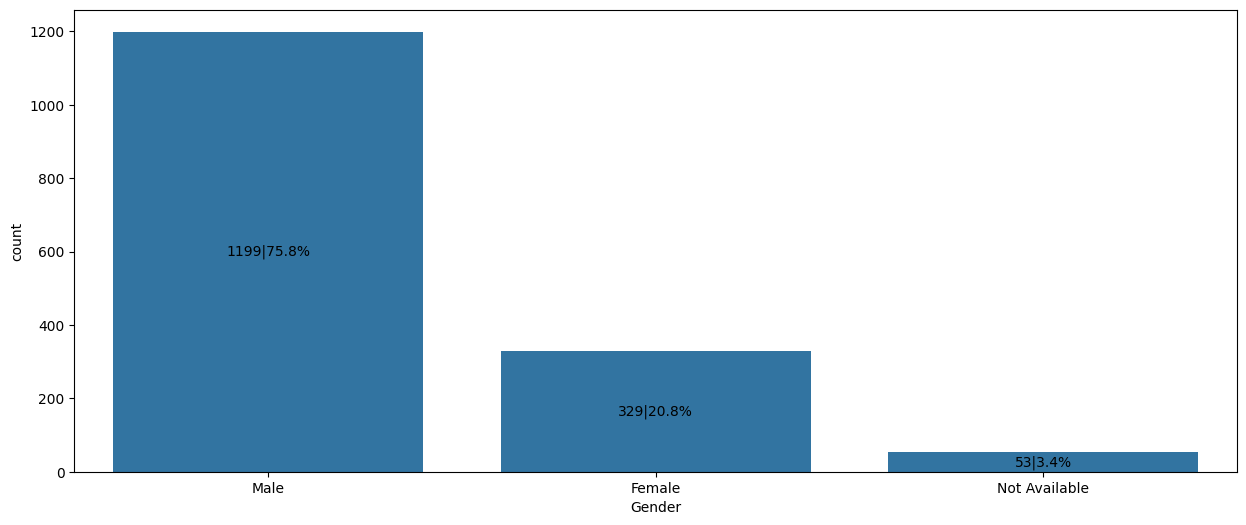

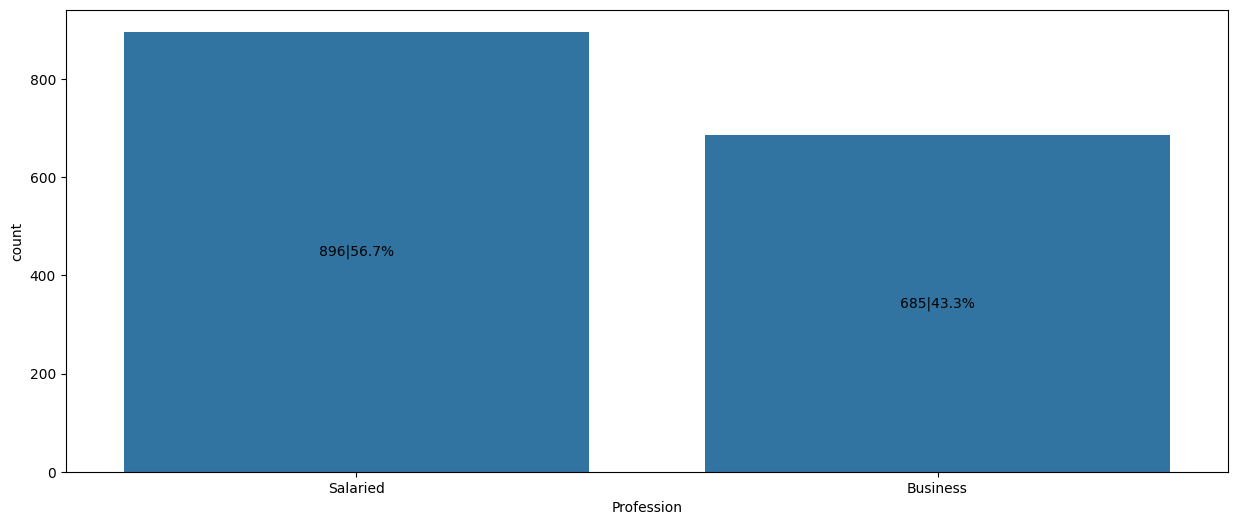

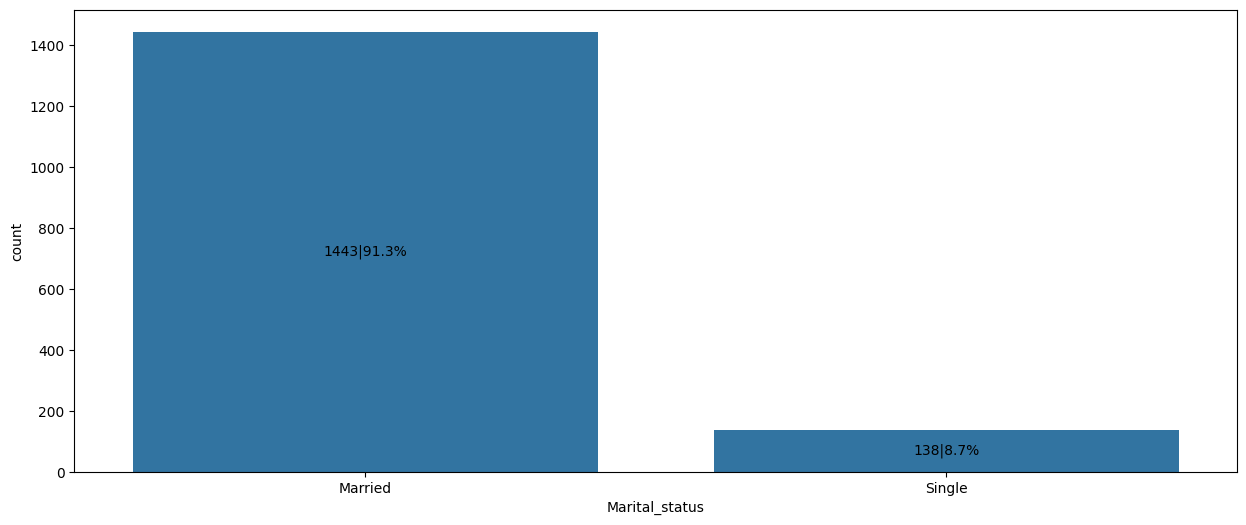

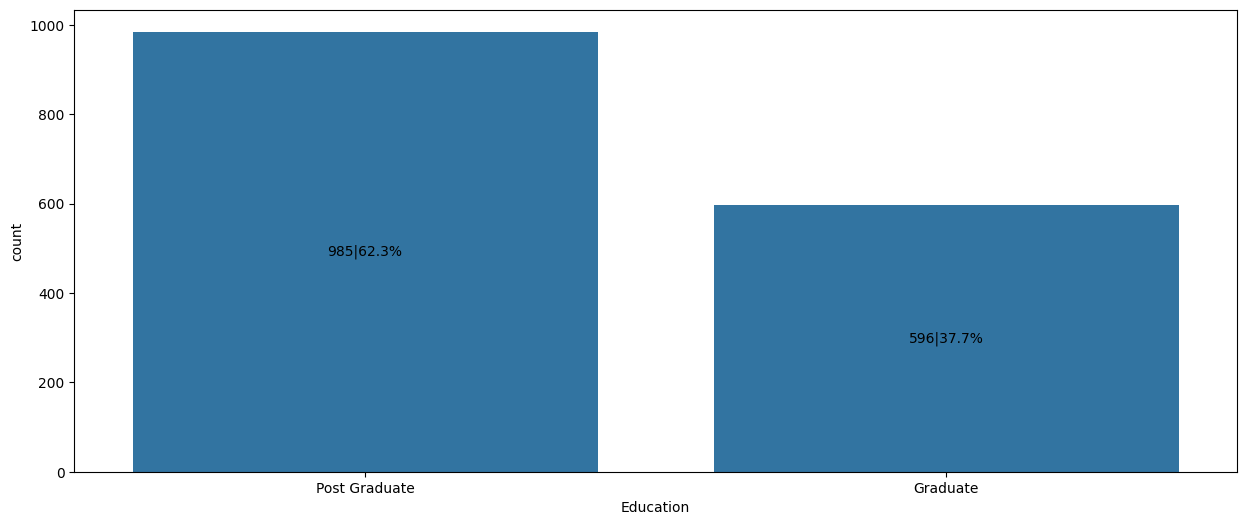

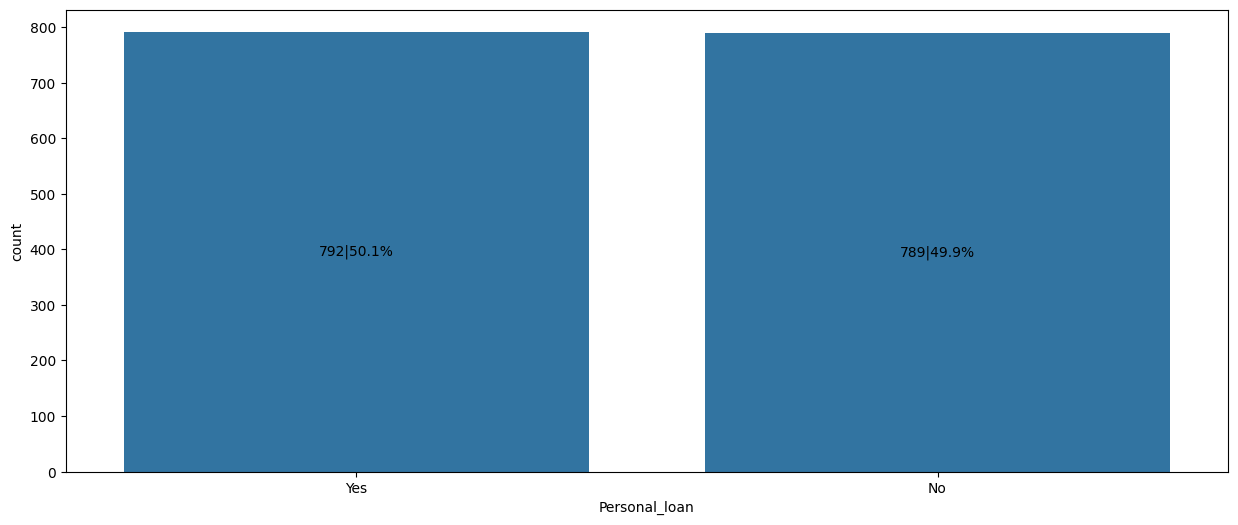

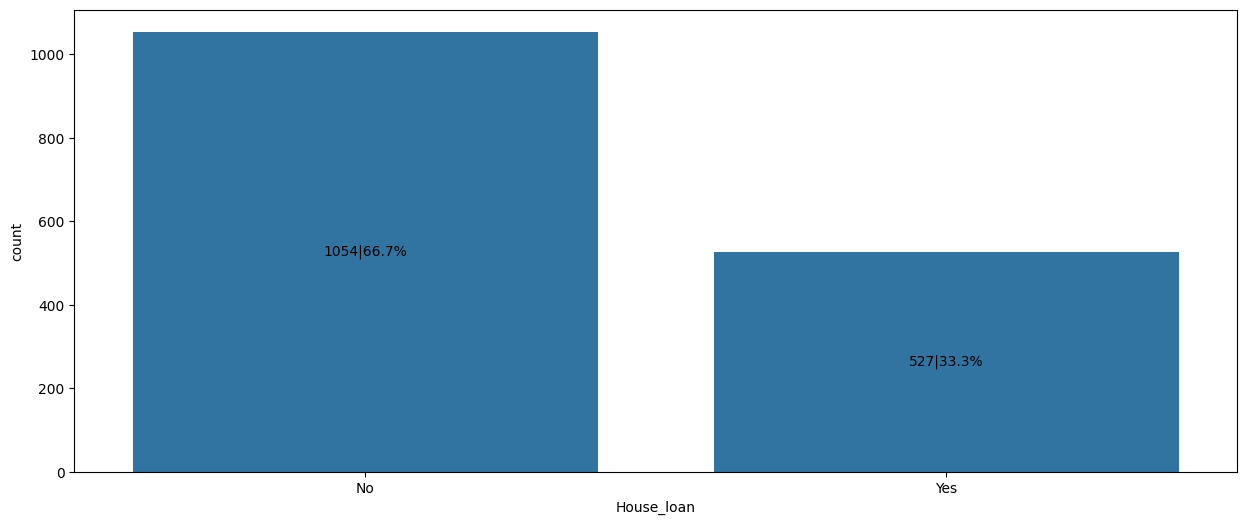

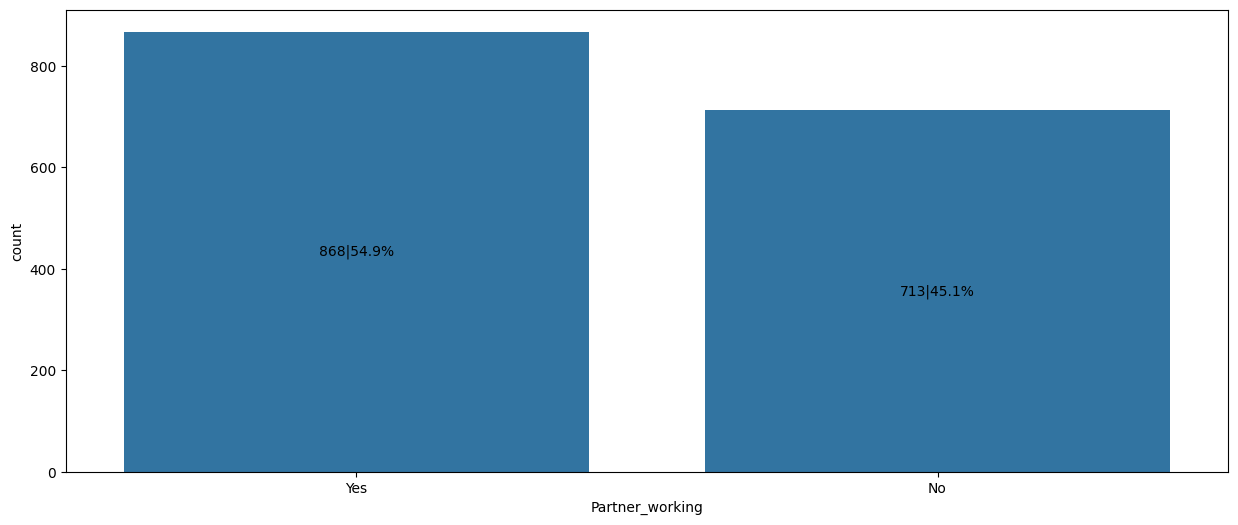

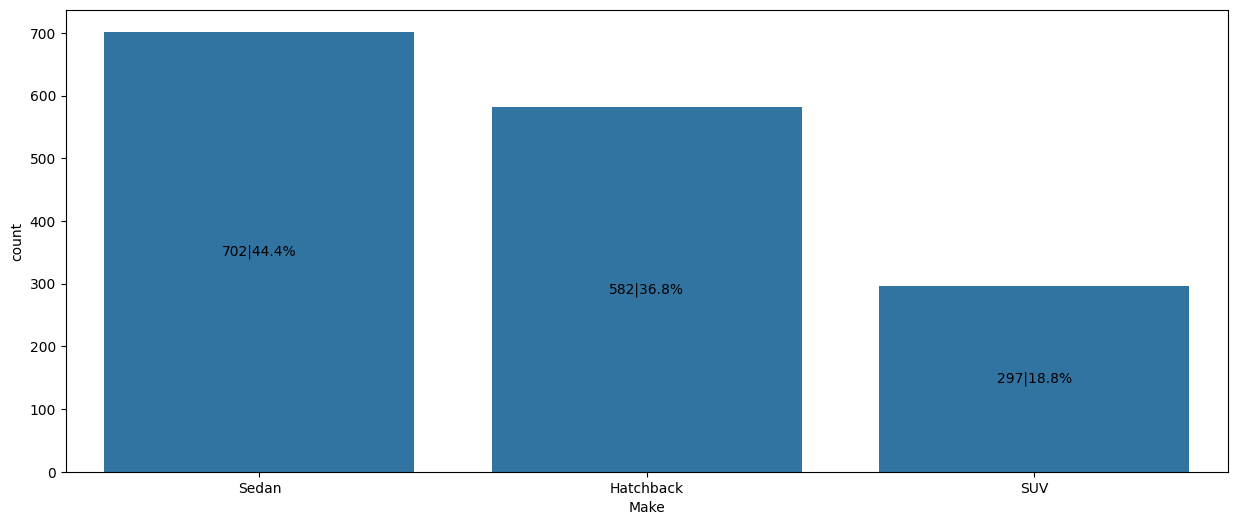

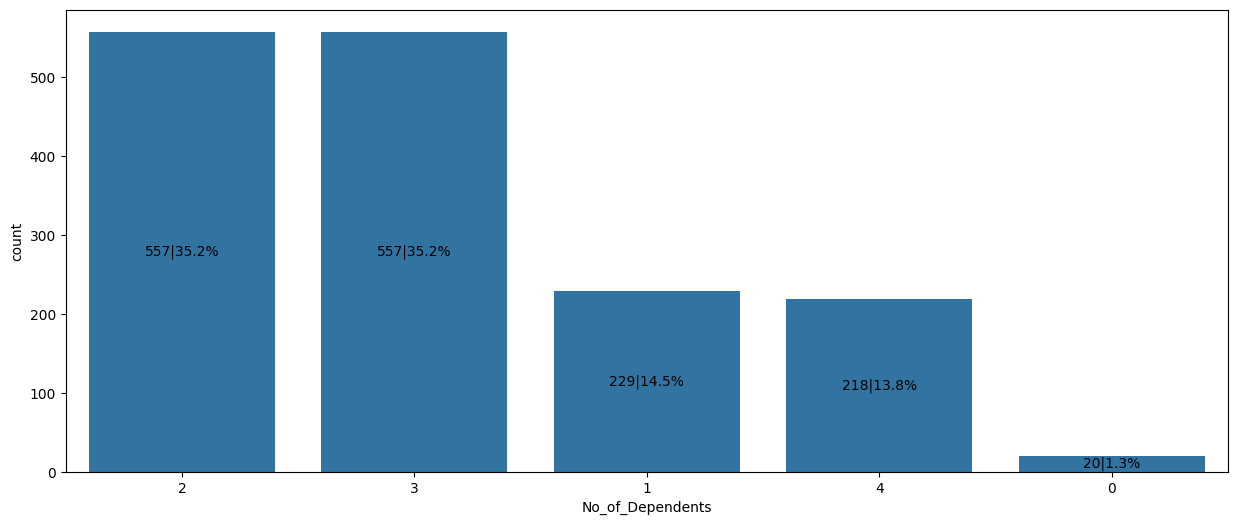

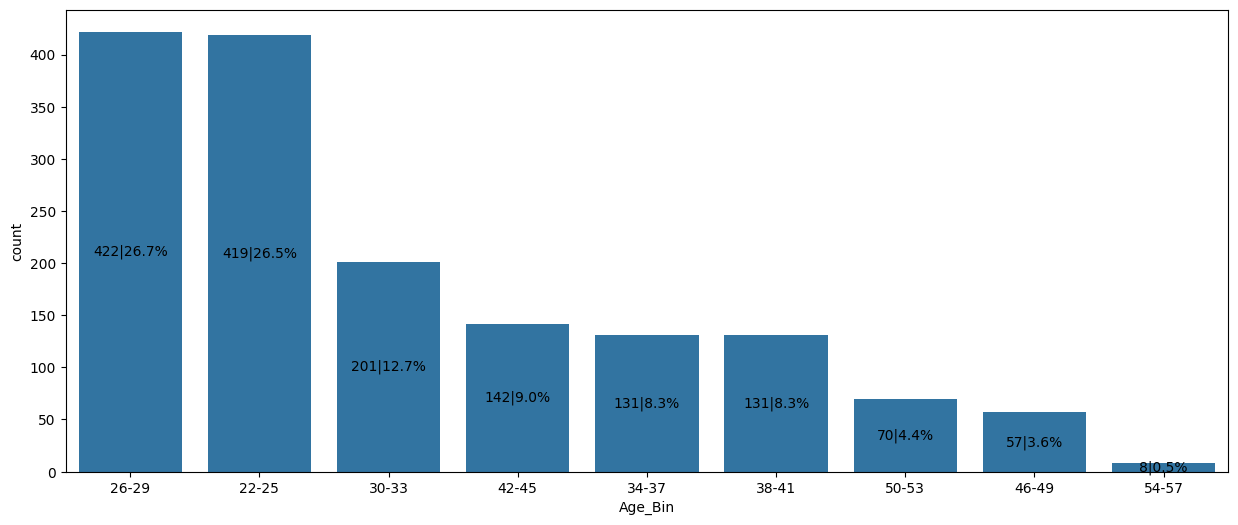

In [26]:
# Checking the count plots for all the categorical variables
# reference, add labels: "https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.bar_label.html"
for cols in df_cat.columns:
    plt.figure(figsize = (15,6))
    ax = sns.countplot(data=df_cat, x=cols, order = df_cat[cols].value_counts().index)
    abs_values = df[cols].value_counts().values
    abs_values_per = df[cols].value_counts(normalize = True).values
    abs_val_final = []
    for idx, i in enumerate(abs_values):
        abs_fin = str(i) + "|" + str(round(abs_values_per[idx]*100,1))+"%"
        abs_val_final.append(abs_fin)    
    ax.bar_label(container=ax.containers[0],labels=abs_val_final, label_type ='center')
    plt.show()

##### Numerical
***Describe info for numericals, No_of_Dependants is being considered as categorical, similar to Age_Bin***    
1. **Age**               : Minimum = 22    Maximum = 54     Mean = 31.9    Median = 29    std = 8.4
2. **Salary**            : Minimum = 30000 Maximum = 993000 Mean = 60392.2 Median = 59500 std = 14674.8
3. **Partner_salary**    : Minimum = 0.0   Maximum = 80500  Mean = 18869.5 Median = 24900 std = 19570.6
4. **Total_salary**      : Minimum = 30000 Maximum = 171000 Mean = 79625.9 Median = 78000 std = 25545.8
5. **Price**             : Minimum = 18000 Maximum = 70000  Mean = 35597.7 Median = 31000 std = 13633.6
##### Outlier Identifications
1. Looking at the Boxplots for the for the numerical variables we see that there are outliers in **"Total_salary"**.
2. We need to check this series to see which are th outlier records and treat if needed.

In [27]:
#Getting all the numerical columns into one data frame.
df_num = df.loc[:, df.dtypes != object]
#Dropping Age_Bin and No_of_Dependents as these are categorical
df_num = df_num.drop(columns=['Age_Bin','No_of_Dependents'])

In [28]:
df_num.describe()

Age        Salary  Partner_salary   Total_salary         Price
count  1581.000000   1581.000000     1581.000000    1581.000000   1581.000000
mean     31.922201  60392.220114    19233.776091   79625.996205  35597.722960
std       8.425978  14674.825044    19670.391171   25545.857768  13633.636545
min      22.000000  30000.000000        0.000000   30000.000000  18000.000000
25%      25.000000  51900.000000        0.000000   60500.000000  25000.000000
50%      29.000000  59500.000000    25100.000000   78000.000000  31000.000000
75%      38.000000  71800.000000    38100.000000   95900.000000  47000.000000
max      54.000000  99300.000000    80500.000000  171000.000000  70000.000000

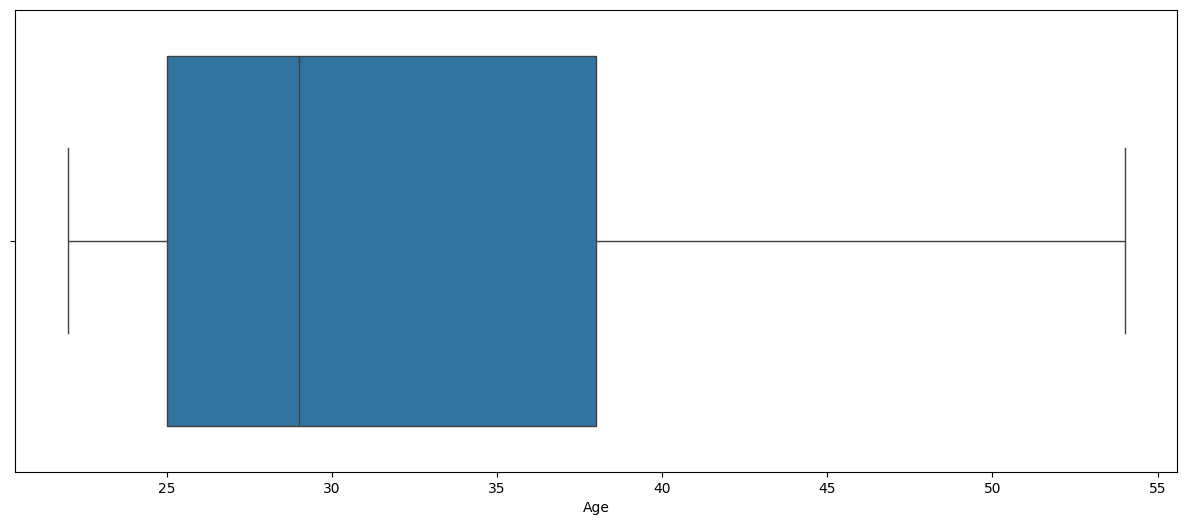

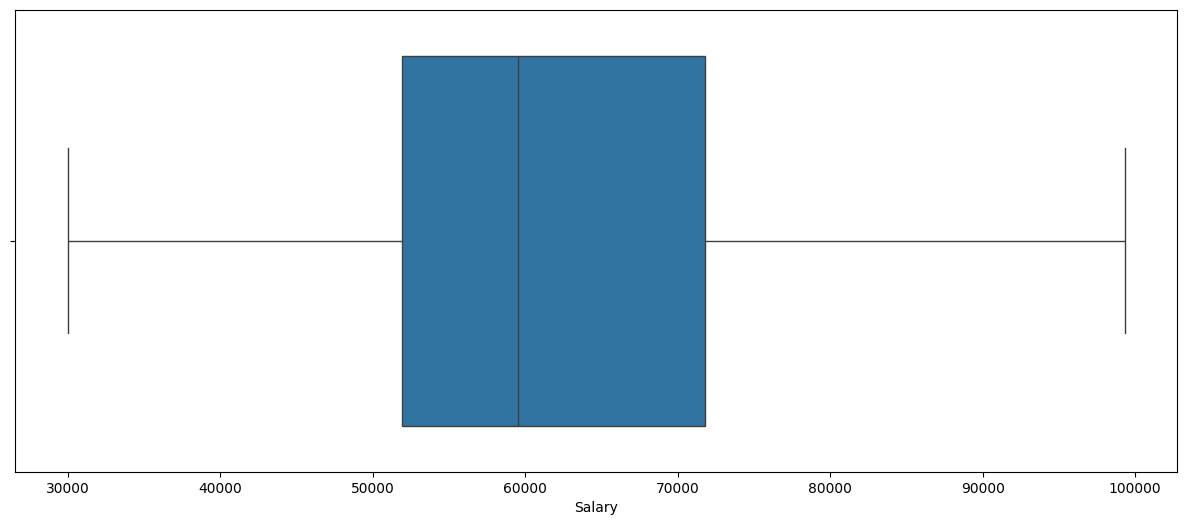

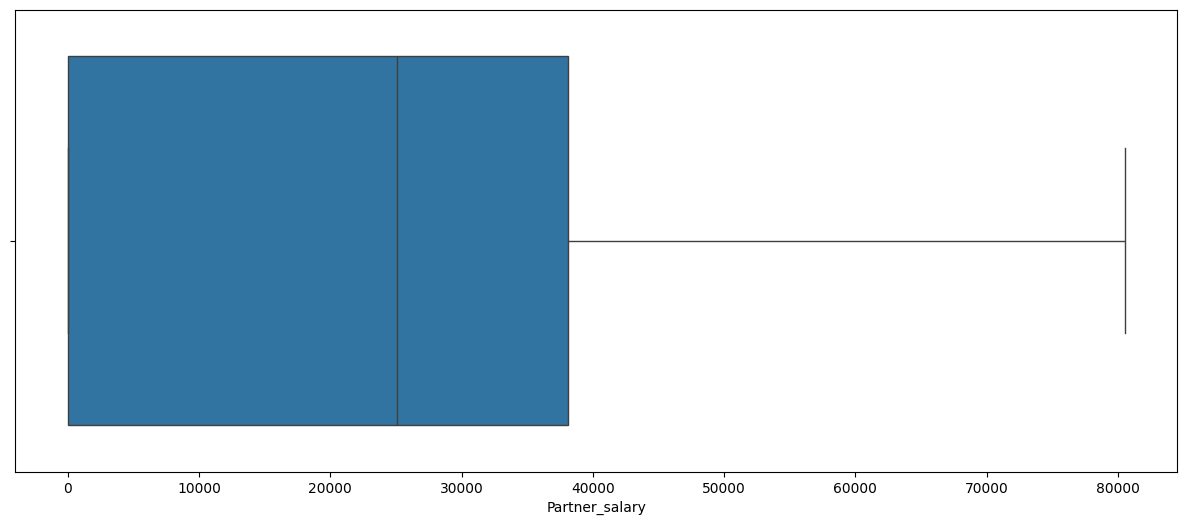

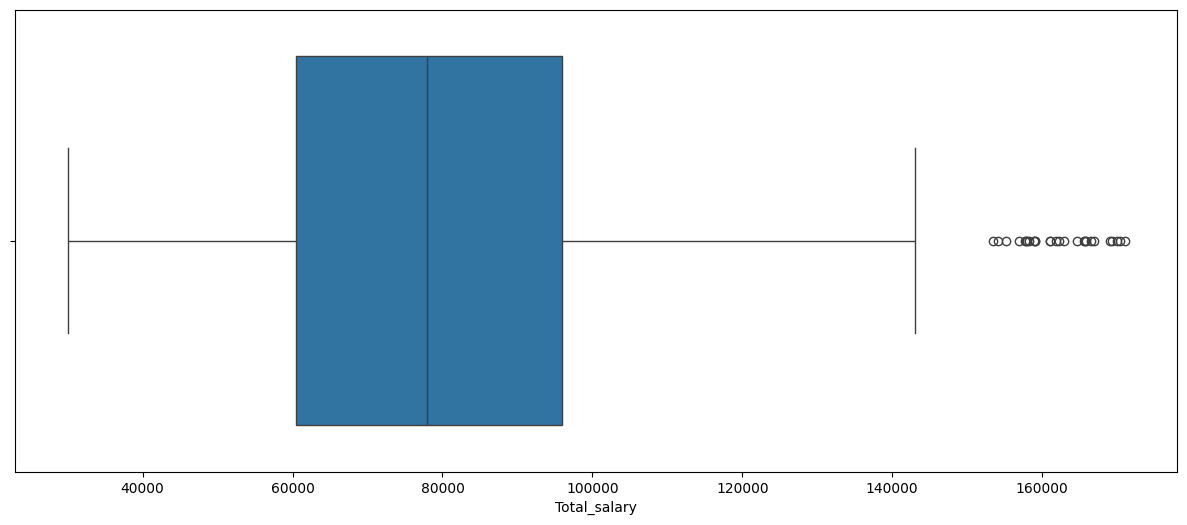

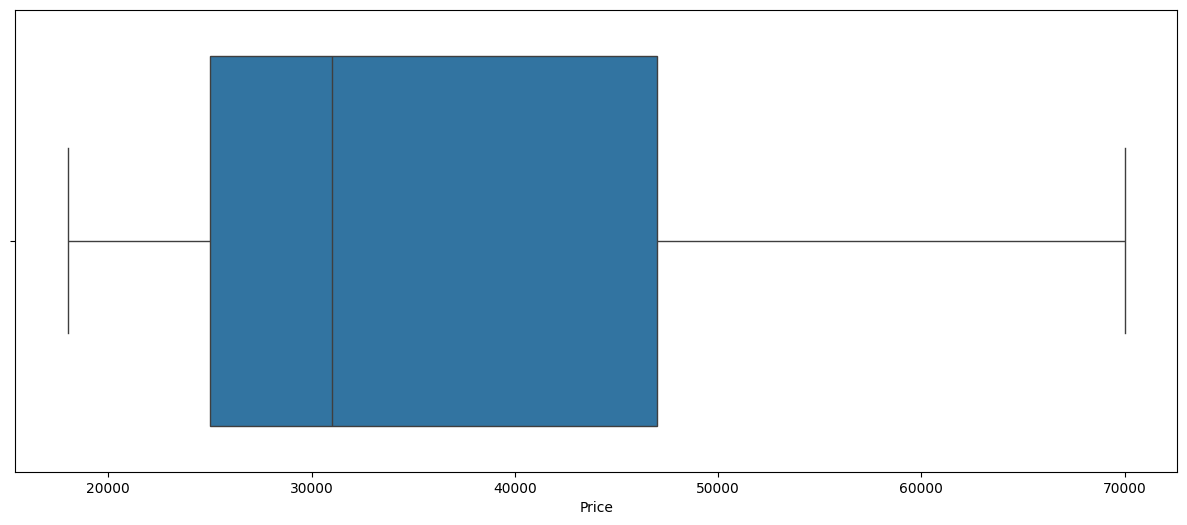

In [29]:
#Getting boxplots for all the numerical columns
for col in df_num.columns:
    plt.figure(figsize = (15,6))
    sns.boxplot(data=df_num,x=col, orient = 'h')
    plt.xlabel(col)
    plt.show()

##### Outlier Treatment
1. We use the 1.5*IQR rule to find the ouliters in **"Total_salary"**
2. **"27"** Obersavations/Rows found with value above the outlier upper limit.
3. These are stored seperately to investigate further, and can be found [here]("./data/df_tol_sal_ol.csv").
4. We update the values of the outliers in the working dataset to the outlier upper limit.


In [30]:
# Find the outlier values and get the outlier obs from the dataframe
df_num.Total_salary.describe()
IQR = df_num.Total_salary.describe()['75%'] - df_num.Total_salary.describe()['25%']
ol_lower = df_num.Total_salary.describe()['25%']-(1.5*IQR)
ol_upper = df_num.Total_salary.describe()['75%']+(1.5*IQR)
tol_sal_ol = df[(df.Total_salary>ol_upper) | (df.Total_salary<ol_lower)].sort_values(by='Total_salary')
tol_sal_ol.to_csv("./data/df_tol_sal_ol.csv")
df[(df.Total_salary>ol_upper) | (df.Total_salary<ol_lower)].sort_values(by='Total_salary').shape

(27, 15)

In [31]:
# update the outlier values to the upper limit.
df.loc[tol_sal_ol.index,'Total_salary'] = ol_upper

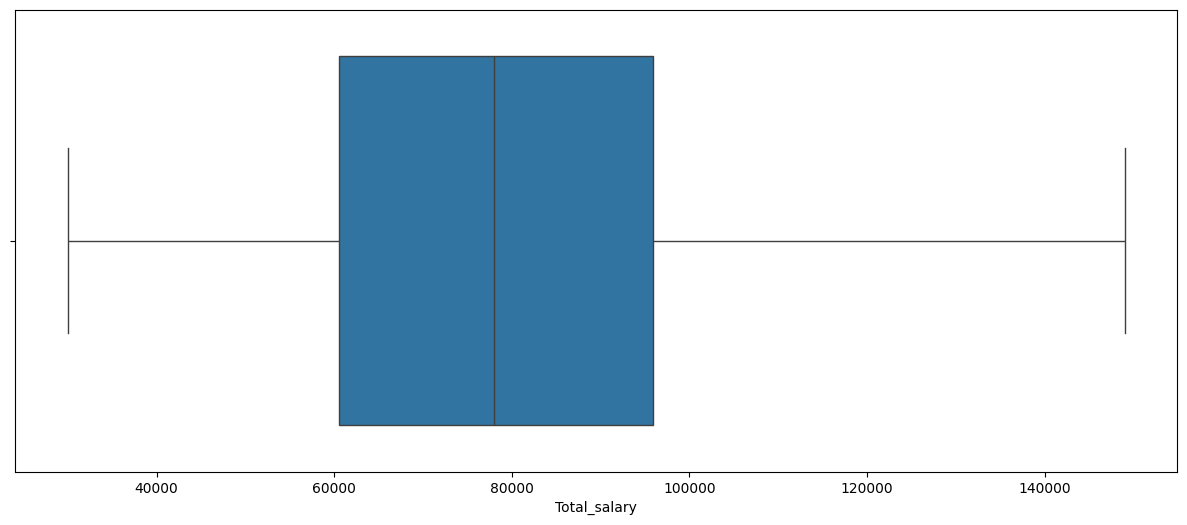

In [32]:
# Check the outlier treated "Tatol Salary" distribution using boxplot
plt.figure(figsize = (15,6))
sns.boxplot(data=df,x='Total_salary', orient = 'h')
plt.xlabel('Total_salary')
plt.show()

In [33]:
df_num = df.loc[:, df.dtypes != object]
df_num = df_num.drop(columns=['Age_Bin','No_of_Dependents'])
df_num.Total_salary.describe()

count      1581.000000
mean      79398.545225
std       24849.147996
min       30000.000000
25%       60500.000000
50%       78000.000000
75%       95900.000000
max      149000.000000
Name: Total_salary, dtype: float64

#### Observations and Insigths
1. The **Male gender** accounts for **76%** of the data,**3%** of the data does not have gender infomation.
2. **Salaried** people make up about **57%** of the data.
3. About **91%** of the data is repersented by **Married** individuals.
4. **62%** individuals have completed they **Post Graduation**.
5. About half of the obersativations have **Personal loans**.
6. **Home loans** are held by **67%** of the data.
7. **55%** of the people have partners who are working.
8. **Sedans** as a **Make** are preferred by **44%** of the people, **36%** preffered **Hatchback** and **18%** went for **SUV**
9. The **Age group** of **22 to 33 years** account for **66%** of the demand, **34 to 45 years** account for **25%**, the rest **8%** is older than **45 years**.
10. **75%** of the indiviuals are **38 years or below**, with **54 years** being the maximum age in the dataset.
11. **70%** of the individuals have **2 or 3 dependants**, **16%** have **1 or No dependants**, **14%** have **4 dependants**.
12. The **Total Salary** of **75%** is **95900 or below**, and half of the total income is **78000 or below**
13. There are **27** high earning observations for which the  **Total Salary** ranges from **153500 to 171000**, records stored [here](./data/df_tol_sal_ol.csv)
    1. All of these have a demand for SUV **Make**.
    2. Have a **Education** of **Post Grad**.
    3. Have no **Home loan**.
    4. Are **Married**.
    5. We adjust and cap the **Total Salary** for these records to **149000(1.5*IQR)**
    
14.  **75%** of the individuals opted for vehicles priced at **47000 or lower**, half of vehicles opted for are priced at **31000 or lower**.

### Problem 1 - Bivariate Analysis
Explore the relationship between all numerical variables - Explore the correlation between all numerical variables - Explore the relationship between categorical vs numerical variables - 8

#### Explore the relationship between all numerical variables
1. To check for relationship between all the numerical variables we plot a pair plot.
    1. This helps to check the scatter of numerical variables against all the other numerical variables
    2. It also gives the distribution of the variable as a histogram
2. We observe that:
    1. **Age**:
        1. Seems to have a good relationship with **Salary**, **Total_salary** and **Price**, all the three variables increase with **Age**.
        2. The distribution of **Age** seems to be right skewed and not normally distributed.
    2. **Salary**:
        1. Has a good relationship with **Age** and **Total_salary** (Total_salary is not a suprise as Total_salary is a calucation derived as Salary + Partner_salary)
        2. The distribution of **Salary** seems to multi-nodal right skewed with less skewness than **Age**.
    3. **Partner_salary**:
        1. This does not seem to have a good relationship with any of the other variable except **Total_salary** (Total_salary is not a suprise as Total_salary is a calucation derived as Salary + Partner_salary)
        2. The distribution of **Partner_salary** is far from normal.
    4. **Total_salary**
        1. Has a relation with all the other variables, strong with **Salary** and **Partner_salary** as it is derived from these two variables, relationship with **Age** and **Price** exists but there is a high variance seen here.
        2. The distribution of **Total_salary** seems to have the least skewness, it is more closer to a normal distribution than any of the other variables.
    5. **Price**
        1. Has a relation with all the other variables, more strongly with **Age**, **Salary**  and **Total_salary**.
        2. The distribution of **Price** seems to be bi-nodal right skewed with a skewness which is close to **Age** distribution.

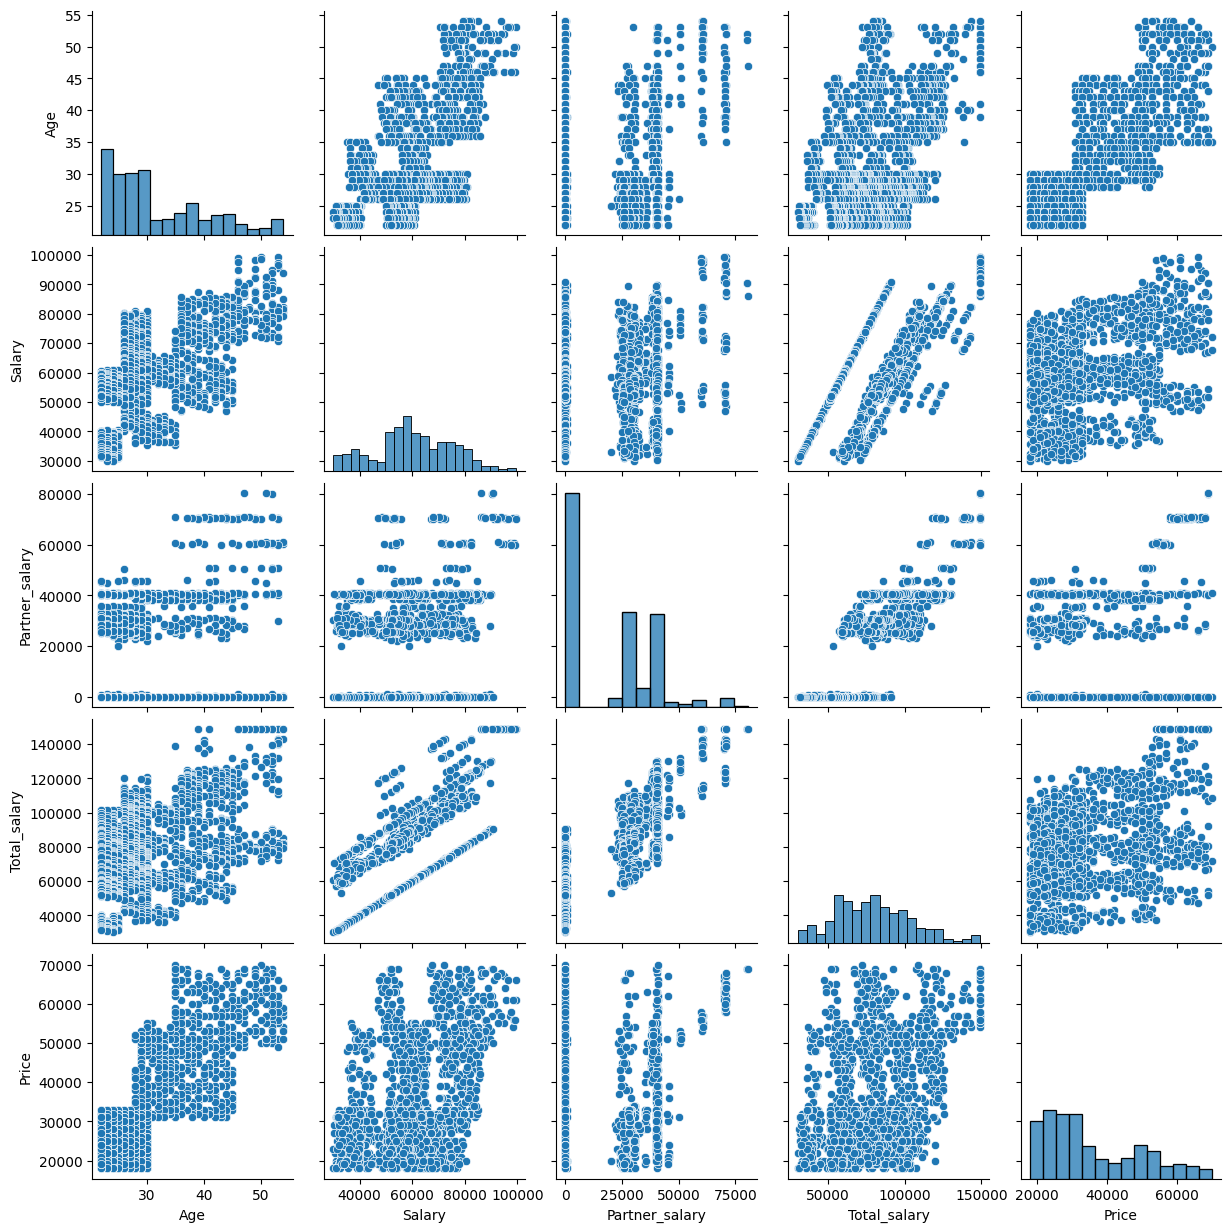

In [34]:
# Plot out the pairplot for the numerical variables
sns.pairplot(df_num)
plt.show()

#### Explore the correlation between all numerical variables
1. To check the correlation between all the numerical variables we plot a heatmap, of the corr of the numerical values
2. We observe that:
    1. **Age** is highly correlated with **Price**, followed by **Salary**, and sligthly by **Total_salary**
    2. **Salary** is highly correlated with **Total_salary**, followed by **Age** and sligthly by **Price**
    3. **Partner_salary** is highly correlated with **Total_salary**, it does not seem to affect or affected by any other variable.
    4. **Total_salary** is highly correlated with **Partner_salary**, followed by **Salary**, sligthly by **Age** followed by **Price**
    5. **Price** is highly correlated with **Age**, sligthly by **Salary** followed by **Total_Salary**
3. From point **"2"**, we can deduce that **Age** and **Price** are higly correlated to each other, followed by **Age** and **Salary**.
4. **Total_salary**, **Partner_salary** can be set aside for now as there have a weaker correlation with **Age** and **Price**.
4. We may want to focus on **Age**,**Salary** and **Price** numerical variables in the next steps of our analysis.

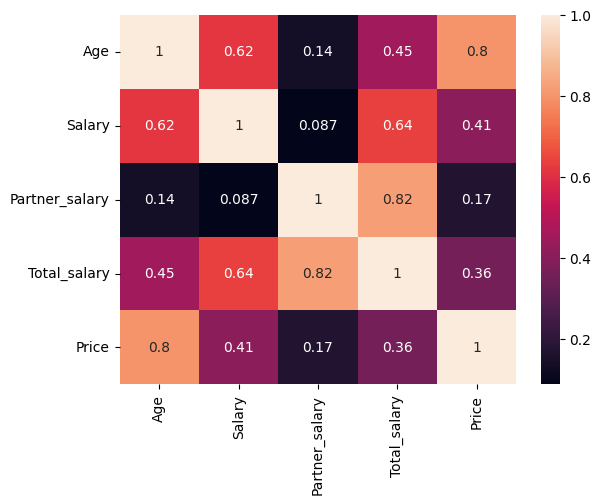

In [35]:
# Plot out the heatmap for the numerical variables
sns.heatmap(df_num.corr(),annot  = True)
plt.show()

#### Explore the relationship between categorical vs numerical variables
1. We have 10 Categorical Variables: **'Gender', 'Profession', 'Marital_status', 'Education', 'Personal_loan',
       'House_loan', 'Partner_working', 'Make', 'Age_Bin' and 'No_of_Dependents'**
2. We have 3 Numerical Variables we would like to focus on:  **Age, Salary and Price**, (As Total_salary and Partner_salary are not correlated strongly, setting them aside for now.)
3. We would plot the boxplot for each numerical variable as a split of the categorical variables.
4. **Observations**
    1. **Gender**:
        1. **Age**: 
            1. The ***median age*** of Females is greater than the Males by ***11 years*** 
            2. Also the IQR of Females is higher compaired to the Males, with ***34 and 45 years** compared to ***25 and 32 years***
            3. This would seem to suggest that purchasing of vehicles for Females happen later in life as compared to Males.
            4. There exists Outliers in the Male and "Not Available" Dataset
        2. **Salary**: 
            1. The ***median salary*** of Females is greater that the Males by ***6K***
            2. The IQR of Females salary is somewhat higher to the Males, with ***56.2K to 78K** compared to ***51.2K to 69.35K**
            3. This would seem to suggest Females may have slighty more income to spend than Males
            4. Also the Minimum Income for Females is slighty Higher.
            5. There exists Outliers in the Male Dataset
        3. **Price**:
            1. The ***median price*** of vehicles purchased by Females is greater that the Males by ***20K***
            2. The IQR of purchase amount by Females is much higher than by Males, with ***38K to 55K*** compared to ***24K to 37.5K***
            3. This would seem to suggest that Females have an appetite to purchase costlier vehicles.
            4. There exists Outliers in the Male and "Not Available" Dataset.
    2. **Profession**:
        1. **Age**: 
            1. The ***median age*** of Salaried Individuals is slightly greater than the Individuals in Business by ***2 years*** 
            2. Also the IQR of Salaried is slightly higher compaired to Business, with ***26 and 39 years** compared to ***25 and 35 years***
            3. This would seem to suggest that purchasing of vehicles for Salaried Individuals happen silgthly later in life as compared to Individuals in Business.
            4. There exists Outliers in the Business Dataset
        2. **Salary**: 
            1. The ***median salary*** of Salaried Individuals is almost the same as Business Individuals as the difference is only ***500***
            2. The IQR of Salaried Individuals is almost the same as Business Individuals, with ***52.175K to 72.8K** compared to ***51.4K to 70.1K**
            3. This would seem to suggest there is not much difference in the income and spend capabilities when we compare Salaried Individuals to Business Individuals
            5. There exists Outliers in the Business Dataset
        3. **Price**:
            1. The ***median price*** of vehicles purchased by Salaried Individuals is almost the same as as Business Individuals as the difference is only ***3K***
            2. The IQR of purchase amount by Salaried Individuals is higher than Business Individuals, with ***26K to 50K*** compared to ***23K to 41K***
            3. This would seem to suggest that Salaried Individuals have an appetite to purchase costlier vehicles.
            4. There exists Outliers in the Business Dataset
    3. **Marital_status**:
        1. **Age**: 
            1. The Age distribution for Married and Single Indivuduals does not have any major differences between them.
            2. They both have a median around 28-29 years, with an IQR between 25-38 years
            3. This would suggest that the age of purchasing of vehicles does not depend too much on ***Marital_status***
        2. **Salary**: 
            1. The ***median salary*** of Single Individuals is almost the same as Married Individuals as the difference is only ***1.6K***
            2. The IQR of Single Individuals is almost the same as Married Individuals, with ***52.15K to 72.975K** compared to ***51.9K to 71.7K**
            3. This would seem to suggest there is not much difference in the income and spend capabilities when we compare Single Individuals to Married Individuals
        3. **Price**:
            1. The ***median price*** of vehicles purchased by Married Individuals is only sligthly more than Single Individuals, difference is only ***2K***
            2. The IQR of purchase amount by Married Individuals is sligthly higher than Single Individuals, with ***25K to 47K*** compared to ***24K to 41.75K***
            3. This would seem to suggest that Married Individuals have an appetite to purchase sligthly costlier vehicles.
    4. **Education**:
        1. **Age**: 
            1. The Age distribution for Graduate and Post Graduate Indivuduals does not have any major differences between them.
            2. They both have a median around 29 years, with an IQR between 25-38 years
            3. This would suggest that the age of purchasing of vehicles does not depend too much on ***Education***
        2. **Salary**: 
            1. The ***median salary*** of Post Graduate Individuals is much higher than Graduate Individuals, the difference is ***18.25K***
            2. The IQR of Post Graduate Individuals is much higher than Graduate Individuals, with ***58.7K to 75.3K** compared to ***38.375K to 56.1K**
            3. This would seem to suggest that Post Graduate Individuals have a much higher income and spend capability when compared to Graduate Individuals
            4. There exist outliers in the Graduate Dataset.
        3. **Price**:
            1. The ***median price*** of vehicles purchased by Post Graduate Individuals and Graduate Individuals is the same:***31K***
            2. The IQR of purchase amount by Graduate Individuals is broader and higher than Post Graduate Individuals, with ***24K to 48.250K*** compared to ***25K to 45K***
            3. This would seem to suggest that Graduate Individuals have an sligthly bigger appetite than Post Graduate Individuals to purchase costlier vehicles.
    5. **Personal_loan**:
        1. **Age**: 
            1. The ***median age*** for Individuals who have a Personal loan vs who do not is the same ***29 Years***
            2. The IQR for Individuals who do not a Personal loan and who have a Personal loan is very close, with ***25 to 39*** and ***25 to 37***
            3. This would suggest that the age of purchasing of vehicles does not depend too much on wether the individual has a Personal loan or not.
        2. **Salary**: 
            1. The ***median salary*** for Individuals who have a Personal loan vs who do not is very close, with the difference between the median of on ***2K***
            2. The IQR of for Individuals who have a Personal loan vs who do not is also mostly the same, with ***51.975K to 69.950K** compared to ***51.9K to 73K**
            3. This would seem to suggest the income and spend capability is almost the same for Individuals who have a Personal loan vs who do not.
            4. There exist outliers in the Dataset for Individuals who have a Personal loan.
        3. **Price**:
            1. The ***median price*** of vehicles purchased by Individuals who have a Personal loan vs who do not is almost same, with the difference of ***1K***
            2. The IQR of purchase amount by Individuals who have a Personal loan vs who do not overlap closely, with ***24K to 45K*** compared to ***25K to 49K***
            3. This would seem to suggest that Individuals who do not have a Personal loan have a slightly higher appetite to purchase costlier vehicles but not by much.
    6. **House_loan**:
        1. **Age**: 
            1. The ***median age*** for Individuals who have a House loan vs who do not is ***28 and 30 Years*** respectively.
            2. The IQR for Individuals who do not a House loan and who have a House loan is very defferent, with ***25 to 40*** and ***25 to 32***
            3. This would suggest Individuals who do not a House loan may be inclined to purchase a vehicle at older ages than Individuals with a House loan.
            4. There exist outliers in there data set for Individuals who have a House loan.
        2. **Salary**: 
            1. The ***median salary*** for Individuals who have a House loan vs who do not is very close, with the difference between the median of on ***2K***
            2. The IQR of for Individuals who have a House loan vs who do not is overlaps each other, with ***51.15K to 66.65K** compared to ***52.1K to 73.275K**
            3. This would seem to suggest the income and spend capability for Individuals who do not have a House loan is slightly higher than Individuals who have a house loan.
        3. **Price**:
            1. The ***median price*** of vehicles purchased by Individuals who have a House loan vs who do not is almost same, with the difference of ***2K***
            2. The IQR of purchase amount by Individuals who have a House loan vs who do not overlap, with the one with out a House loan having a broader range , with ***24K to 36K*** compared to ***25K to 51K***
            3. This would seem to suggest that Individuals who do not have a House loan have a higher appetite to purchase costlier vehicles to Individuals with House loan.
    7. **Partner_working**:
        1. **Age**: 
            1. The Age distribution for Individuals with Working partners vs with out does not have any major differences between them.
            2. They both have a median around 29 years, with an IQR between 25-38 years
            3. This would suggest that the age of purchasing of vehicles does not depend too much on ***Partner_working***
        2. **Salary**: 
            1. The Salary distribution for Individuals with Working partners vs with out does not have any major differences between them.
            2. They both have a median around ***59K and 60K** and IQR around ***51.4K-72K and 52.4K-72K***
            3. This would suggest that the income and spend capability does not depend too much on ***Partner_working***
        3. **Price**:
            1. The Price distribution for Individuals with Working partners vs with out does not have any major differences between them.
            2. They both have a median of ***31K** and IQR around ***24K-46K and 25K-48K***
            3. This would suggest that the appetite to purchase costlier vehicles does not depend on ***Partner_working***
    8. **Make**:
        1. **Age**: 
            1. The Age distribution for Individuals preferring Hatchback or Sedan or SUV is very different.
                1. Median age for Hatchback is ***26 year***, for Sedan it is ***30 years*** and for SUV it is ***45 years***
                2. The IQR for Hatchback is ***24-28 years***, for Sedan it is ***27-37 years*** and for SUV it is ***39-50 years***
            3. This would suggest that younger individuals prefer Hatchback, middle aged individuals perfer Sedan's and older individuals perfer SUV's.
        2. **Salary**: 
            1. The Salary distribution for Individuals preferring Hatchback or Sedan or SUV have differences between them, Individuals preferring Hatchback or Sedan have slightly closer salary distribution than Individual preferring SUV.
                1. Median salary for Hatchback is ***56.1K***, for Sedan it is ***59.8K*** and for SUV it is ***74K***
                2. The IQR for Hatchback is ***45.425K-64.775K***, for Sedan it is ***52.7K-68.6K*** and for SUV it is ***61.6K-82.2K***
            3. This would suggest that the income and spend capability Individuals perfering SUV is greater than Individuals perfering Sedans, both of which are greater than Individuals perfering Hatchbacks.
        3. **Price**:
            1. The Price distribution for Individuals preferring Hatchback or Sedan or SUV have big differences between them.
                1.  Median Price for Hatchback is ***27K***, for Sedan it is ***33K*** and for SUV it is ***57K***
                2. The IQR for Hatchback is ***23K-30K***, for Sedan it is ***24K-44K*** and for SUV it is ***52K-63K***
            2. There are Outlier in the data set for SUV.
            3. This would suggest that there is an appetite to purchase vehicles of different makes at different price points.
                1. The price points of Hatchbacks do not overlap with SUV for the most part.
                2. Sedan price points overlap with both Hatchbacks and SUV.
                    1. Greater than 50 Percentile Sedan overlaps with the complete Hatchbacks pricing
                    2. Less than 50 Percentile of the Sedan pricing overlaps with Less than 25 Percentile of the SUV pricing
    9. **No_of_Dependants**:
        1. **Age**: 
            1. The Age distribution for Individuals with # of dependants ranging from 0 to 4.
                1. The Age distribution for Individuals with # of dependants 0,3 and 4 are quite similar. median is ***27 to 28 years*** IQR is ***24-25 years to 30-31.5 years***
                2. The Age distribution for Individuals with # of dependants 1 and 2 are quite different from the others.
                    1.  Age distribution for Individuals with 1 dependant, ***median: 36 years, IQR: 31-41 years***
                    2. Age distribution for Individuals with 2 dependant, ***median: 30 years, IQR: 26-38 years***
            2. There are Outliers in the Age distribution for Individuals with # of dependants 0,3 and 4.
            3. This would suggest that:
                1. Individuals with 0,3 and 4 dependants purchase vehicles earlier in life.
                2. Individuals with 1 and 2 dependants purchase vehicles later in life.
                3. Individuals with bigger families or no family purchase vehicles earlier in life.
        2. **Salary**: 
            1. The Salary distribution for Individuals with # of dependants ranging from 0 to 4.
                1. The Salary distribution for Individuals with # of dependants 2,3 and 4 are quite similar. median is ***58.4 to 59.7K*** IQR is ***51-52.275K to 70.6-71.8K***
                2. The Salary distribution for Individuals with # of dependants 0 and 1 are higher from the others.
                    1. Salary distribution for Individuals with 0 dependant, ***median: 64.95K, IQR: 39.325K-69.775K***
                    2. Salary distribution for Individuals with 1 dependant, ***median: 61.5K, IQR: 56K-73.7K***
            2. There are Outliers in the Salary distribution for Individuals with 4 # of dependants.
            3. This would suggest that:
                1. % of Individuals with 1 dependant may have the higher income and spend capabilities compared to the others.
                2. The Salary distribution spread for the Individuals with 0 dependants is the highest.                
        3. **Price**:
            1. The Price distribution for Individuals with # of dependants ranging from 0 to 4 are quite different.
                1. 75% Individuals with 0,3,4 dependants mostly purchase vehicles with price points below 35K, with at least 50% Individuals purchasing between 21K and 35K
                2. 75% Individuals with 1 dependant mostly purchase vehicles price points below 49K, with at least 50% Individuals purchasing between 35K and 49K
                3. 75% Individuals with 2 dependant mostly purchase vehicles price points below 46K, with at least 50% Individuals purchasing between 26K and 49K
            2. There are Outliers in the Price distribution for Individuals with 0,3,4 # of dependants.
            3. This would suggest that:
                1. Individuals with 1,2 dependant may have an appetite of more expensive vehicles, Than Individuals with 0,3,4 dependants.
    10. **Age_Bin**:
        1. **Salary**: 
            1. The Salary distribution for Individuals within the Age Bins.
                1. For the most part we see that the median Salary increases with the increase in the Age bins
            2. There are Outliers in the Salary distribution for Individuals in the Age Bin of 54-57.
            3. This would suggest that the income and spend capability would increase with the increase in age.               
        2. **Price**:
            1. The Price distribution for Individuals within the Age Bins.
                1. For the most part we see that the median Price increase with the increase in the Age bins
            2. There are Outliers in the Price distribution for Individuals in the Age Bin of 26-29.
            3. This would suggest that the appetite of more expensive vehicles increases with age.


#### Observations and Insigths
***Please find all the supporting information for these observations in the plots below and the "Observations" Captured above***
1. Distribution of ***Age,Salary and Price*** by **Genders** is very different and we may want to Analyze the data by **"Gender"** seperately go forward.
2. ***Salaried Individuals*** have a sligthly bigger appetite for more expensive vehicles and purchase vehicles ***1 to 3 years later*** as compared to ***Business Individuals***
3. **Married** Individual may purchase slightly costlier vehicles than **Single** Individuals.
4. ***Post Graduate Individuals*** have a much higher income and spend capability than ***Graduate Individuals***, yet ***Graduate Individuals*** have an sligthly bigger appetite than ***Post Graduate Individuals*** to purchase more expensive vehicles.
5. ***Individuals who do not have a Personal loan*** have a slightly higher appetite to purchase costlier vehicles but not by much.
6. ***income and spend capability*** of Individuals ***with out a House loan** is slightly higher than Individuals **with a House loan***, Individuals ***with out a House loan** higher appetite to purchase costlier vehicles than Individuals **with a House loan***.
7. ***Younger individuals prefer Hatchback, middle aged individuals perfer Sedan's and older individuals perfer SUV's***, the perference of ***Make** seems to be tied closely to the ***income and spend capability*** of an individual. 
    1. We see Sedan's in the Hatchback's price range and vice versa, Also SUV's in Sedan's price range and vice versa, This would indicate Individuals have a perference of Make, We may need to Analyze the data by **"Make"** seperately go forward.
8. Individuals with ***bigger families or no family*** purchase vehicles earlier in life, higher % of Individuals ***with 1 dependant*** have a higher income and spend capabilities compared to the others **with no or more than 1 dependant**, Individuals **with 1 or 2 dependant** may have an appetite of more expensive vehicles, Than Individuals with ***0,3,4 dependants***.
9. ***Income and spend capability*** increases with age, ***appetite of more expensive vehicles*** increases with age.

In [36]:
# Drop the columns not need in the numerical variables data frame.
df_num_filtered = df_num.drop(columns=['Total_salary','Partner_salary'])

               min  max  median       mean   25%   75%
Gender                                                
Female          54   54    39.0  39.525836  34.0  45.0
Male            54   54    28.0  29.952460  25.0  32.0
Not Available   53   53    27.0  29.283019  24.0  30.0


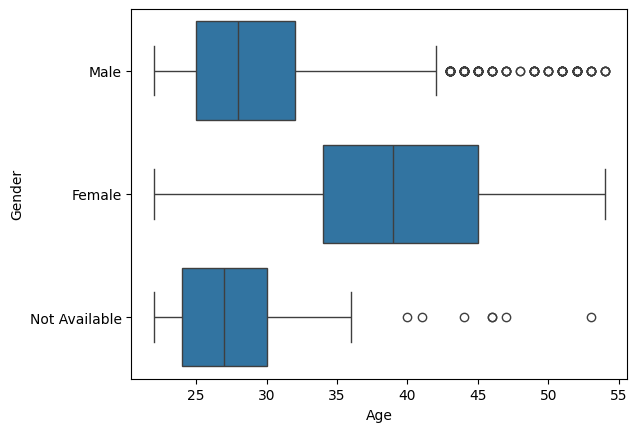

                 min    max   median          mean      25%      75%
Gender                                                              
Female         99300  99300  64600.0  66194.528875  56200.0  78000.0
Male           99300  99300  58500.0  58878.065054  51200.0  69350.0
Not Available  87900  87900  59600.0  58628.301887  49000.0  68600.0


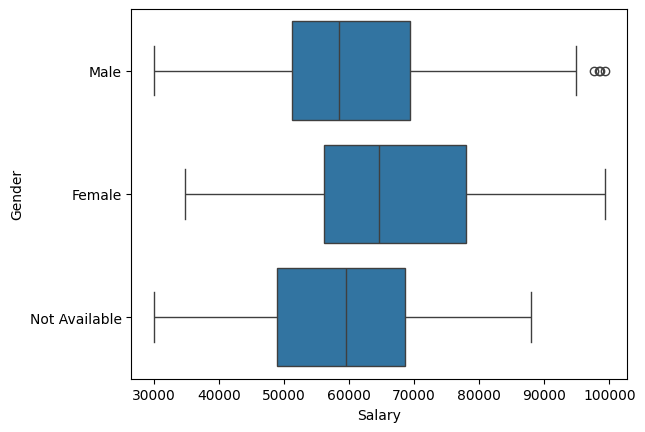

                 min    max   median          mean      25%      75%
Gender                                                              
Female         69000  69000  49000.0  47705.167173  38000.0  55000.0
Male           70000  70000  29000.0  32817.347790  24000.0  37500.0
Not Available  50000  50000  18000.0  23339.622642  18000.0  19000.0


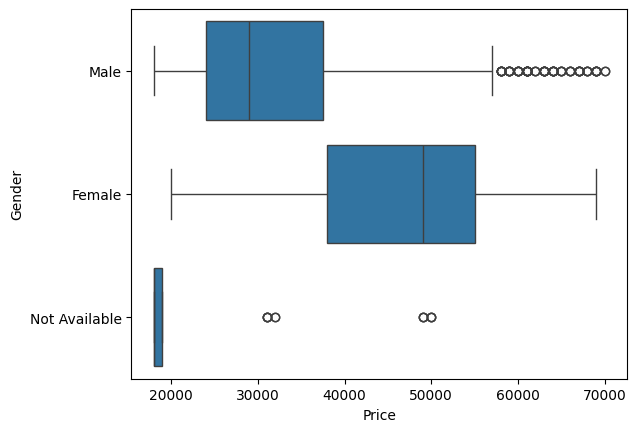

            min  max  median       mean   25%   75%
Profession                                         
Business     54   54    28.0  30.563504  25.0  35.0
Salaried     54   54    30.0  32.960938  26.0  39.0


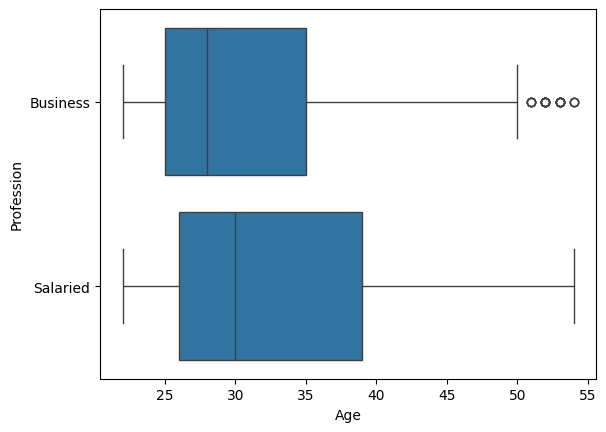

              min    max   median          mean      25%      75%
Profession                                                       
Business    99300  99300  59300.0  59578.978102  51400.0  70100.0
Salaried    99300  99300  59800.0  61013.950893  52175.0  72800.0


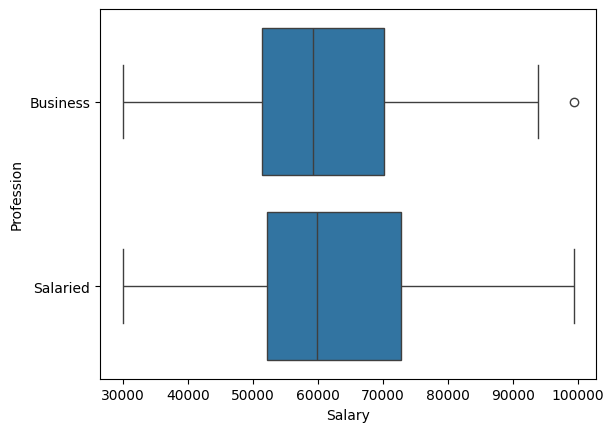

              min    max   median          mean      25%      75%
Profession                                                       
Business    70000  70000  30000.0  33353.284672  23000.0  41000.0
Salaried    70000  70000  33000.0  37313.616071  26000.0  50000.0


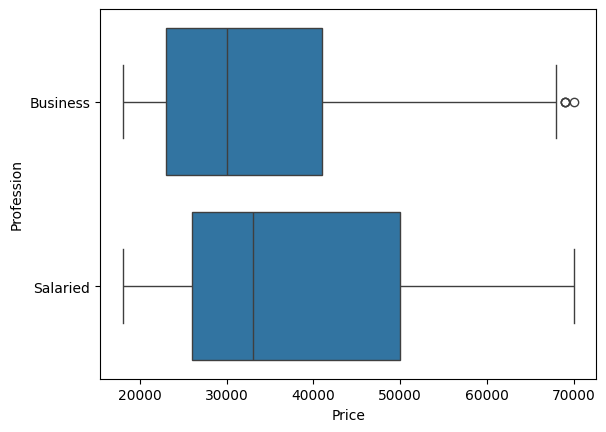

                min  max  median       mean   25%   75%
Marital_status                                         
Married          54   54    29.0  31.995842  25.0  38.0
Single           52   52    28.0  31.152174  25.0  38.0


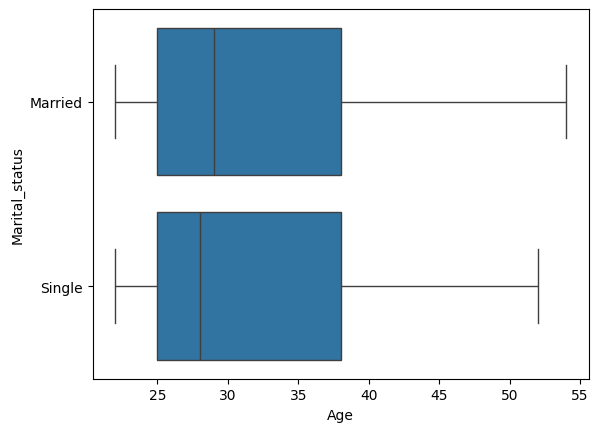

                  min    max   median          mean      25%      75%
Marital_status                                                       
Married         99300  99300  59300.0  60412.404712  51900.0  71700.0
Single          89900  89900  60900.0  60181.159420  52150.0  72975.0


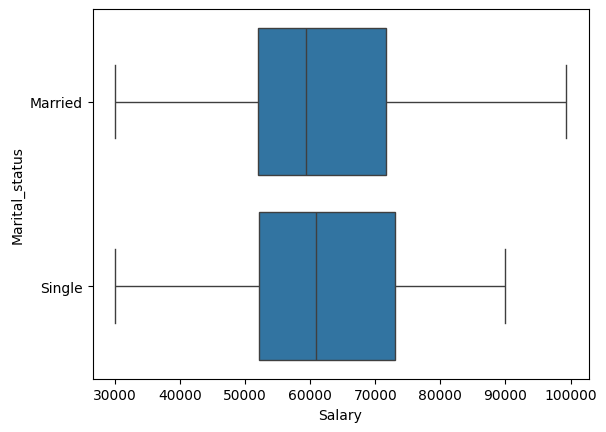

                  min    max   median         mean      25%      75%
Marital_status                                                      
Married         70000  70000  32000.0  35800.41580  25000.0  47000.0
Single          68000  68000  30000.0  33478.26087  24000.0  41750.0


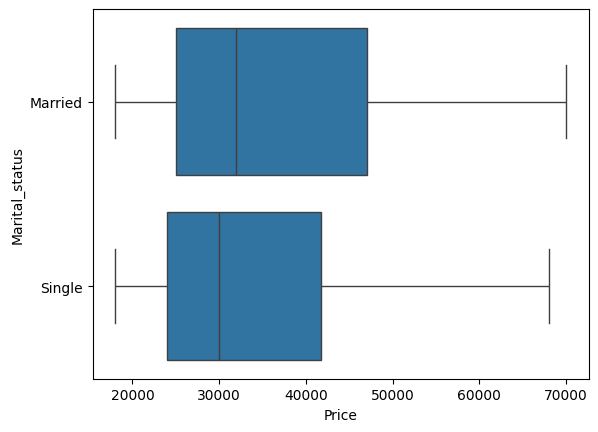

               min  max  median       mean   25%   75%
Education                                             
Graduate        54   54    29.0  31.843960  25.0  38.0
Post Graduate   54   54    29.0  31.969543  25.0  38.0


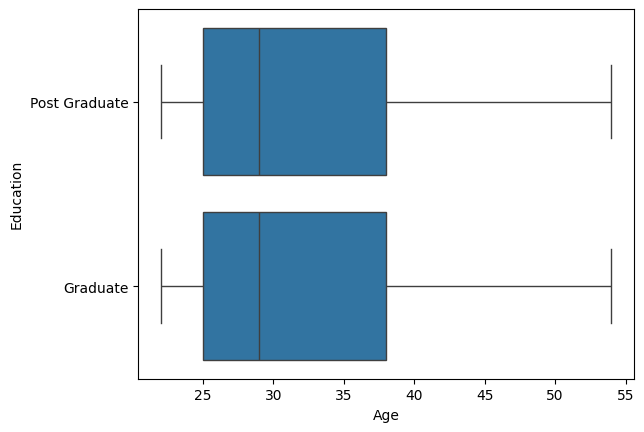

                 min    max   median          mean      25%      75%
Education                                                           
Graduate       92300  92300  47550.0  48506.040268  38375.0  56100.0
Post Graduate  99300  99300  65800.0  67584.263959  58700.0  75300.0


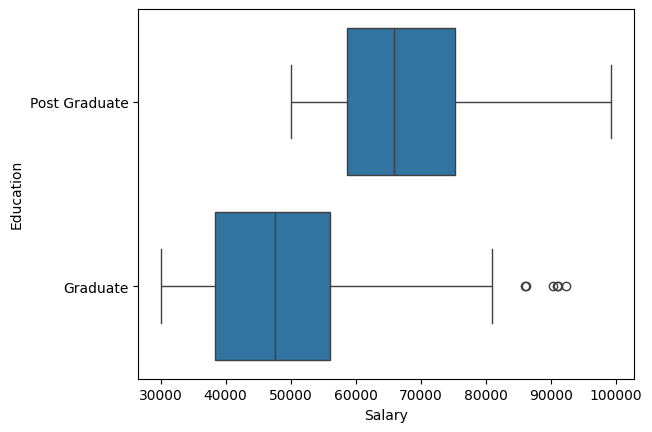

                 min    max   median          mean      25%      75%
Education                                                           
Graduate       70000  70000  31000.0  35907.718121  24000.0  48250.0
Post Graduate  70000  70000  31000.0  35410.152284  25000.0  45000.0


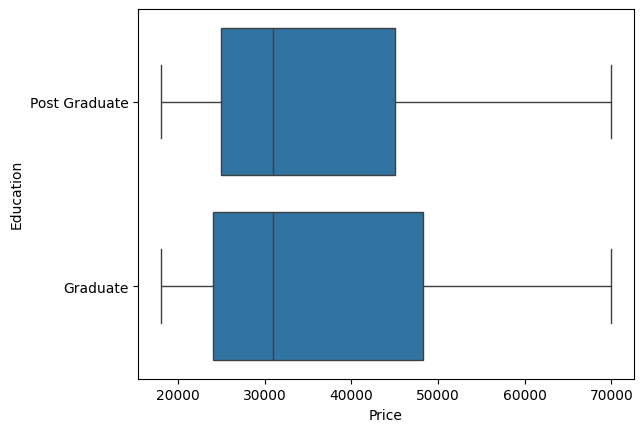

               min  max  median       mean   25%   75%
Personal_loan                                         
No              54   54    29.0  32.518378  25.0  39.0
Yes             54   54    29.0  31.328283  25.0  37.0


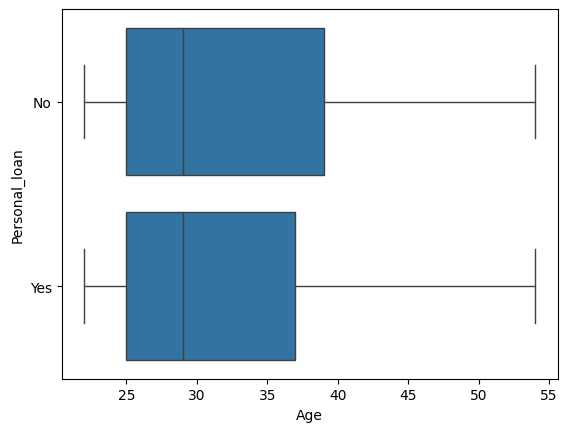

                 min    max   median          mean      25%      75%
Personal_loan                                                       
No             99300  99300  60900.0  61248.288973  51900.0  73000.0
Yes            99300  99300  58900.0  59539.393939  51975.0  69950.0


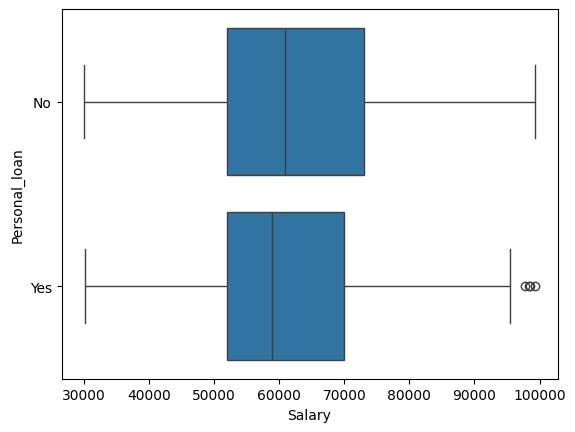

                 min    max   median          mean      25%      75%
Personal_loan                                                       
No             70000  70000  32000.0  36742.712294  25000.0  49000.0
Yes            70000  70000  31000.0  34457.070707  24000.0  45000.0


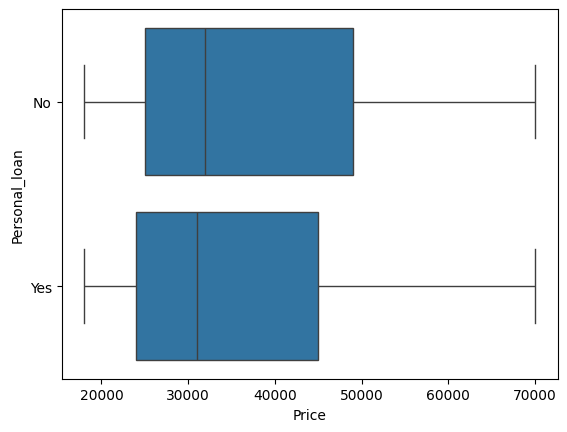

            min  max  median       mean   25%   75%
House_loan                                         
No           54   54    30.0  33.068311  25.0  40.0
Yes          45   45    28.0  29.629981  25.0  32.0


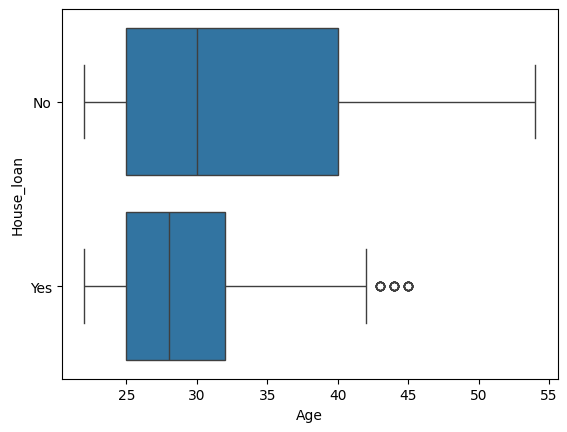

              min    max   median          mean      25%      75%
House_loan                                                       
No          99300  99300  60400.0  61590.037951  52100.0  73275.0
Yes         85900  85900  58400.0  57996.584440  51150.0  66650.0


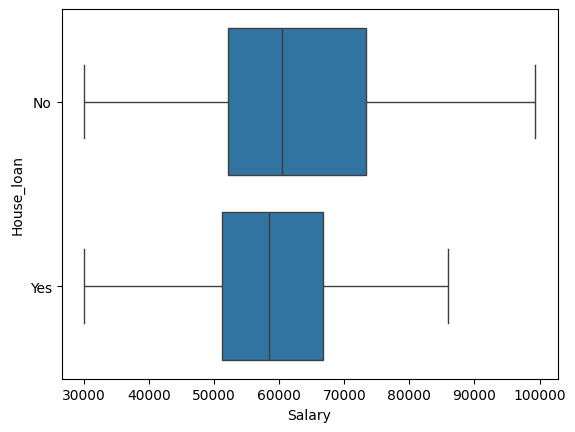

              min    max   median          mean      25%      75%
House_loan                                                       
No          70000  70000  32000.0  37707.779886  25000.0  51000.0
Yes         55000  55000  30000.0  31377.609108  24000.0  36000.0


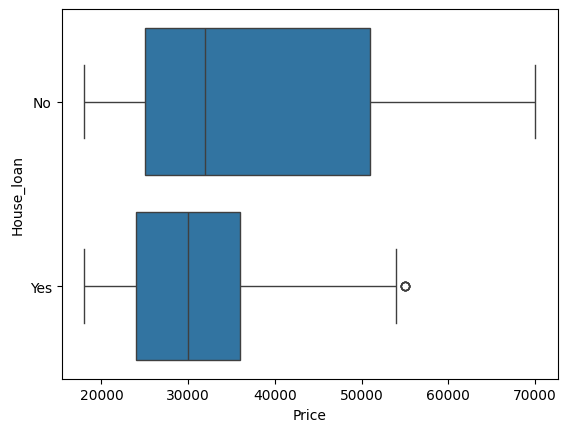

                 min  max  median      mean   25%   75%
Partner_working                                        
No                54   54    29.0  32.13885  25.0  38.0
Yes               54   54    29.0  31.74424  25.0  38.0


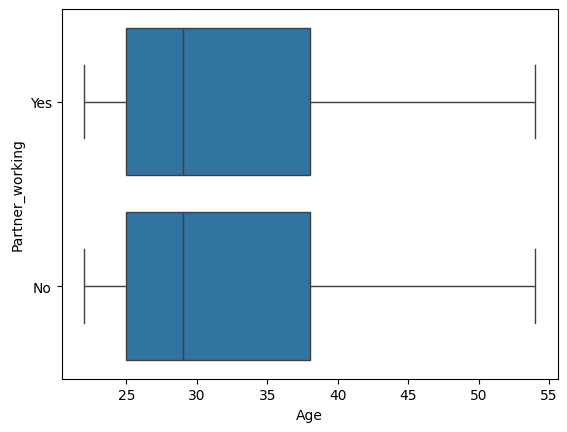

                   min    max   median          mean      25%      75%
Partner_working                                                       
No               90700  90700  60100.0  60527.208976  52400.0  71800.0
Yes              99300  99300  59050.0  60281.336406  51375.0  71925.0


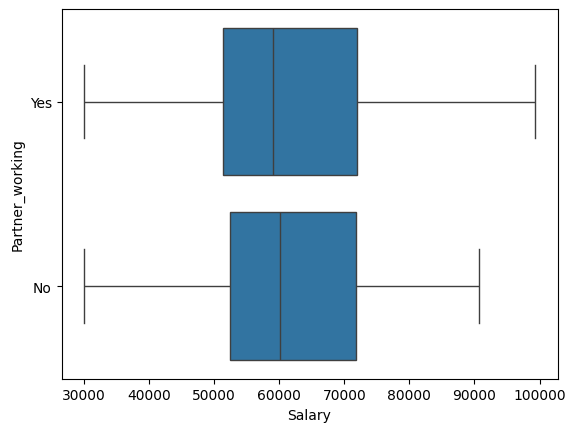

                   min    max   median          mean      25%      75%
Partner_working                                                       
No               70000  70000  31000.0  36000.000000  25000.0  48000.0
Yes              70000  70000  31000.0  35267.281106  24000.0  46000.0


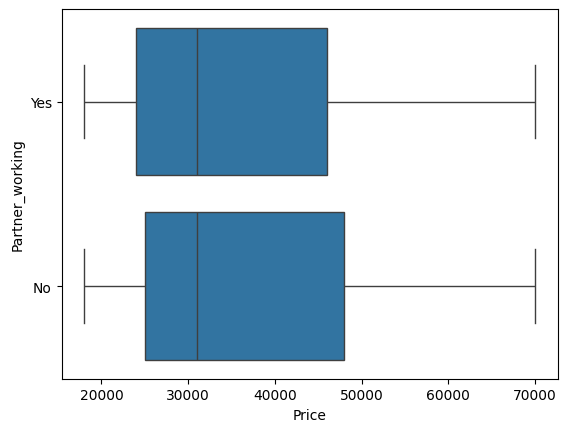

           min  max  median       mean   25%   75%
Make                                              
Hatchback   30   30    26.0  25.726804  24.0  28.0
SUV         54   54    45.0  43.989899  39.0  50.0
Sedan       45   45    30.0  31.952991  27.0  37.0


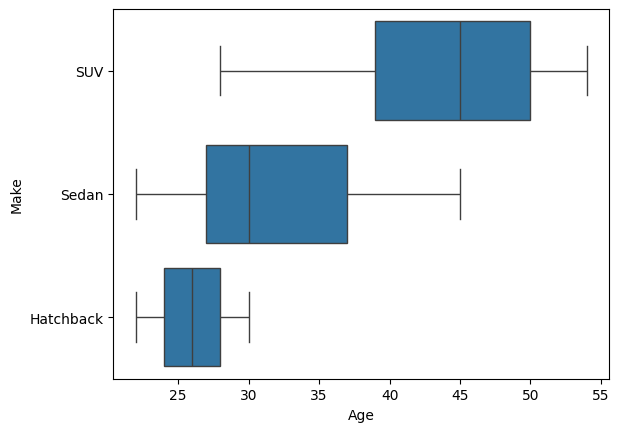

             min    max   median          mean      25%      75%
Make                                                            
Hatchback  80900  80900  56100.0  55083.505155  45425.0  64775.0
SUV        99300  99300  74000.0  72266.666667  61600.0  82200.0
Sedan      85800  85800  59800.0  59769.658120  52700.0  68600.0


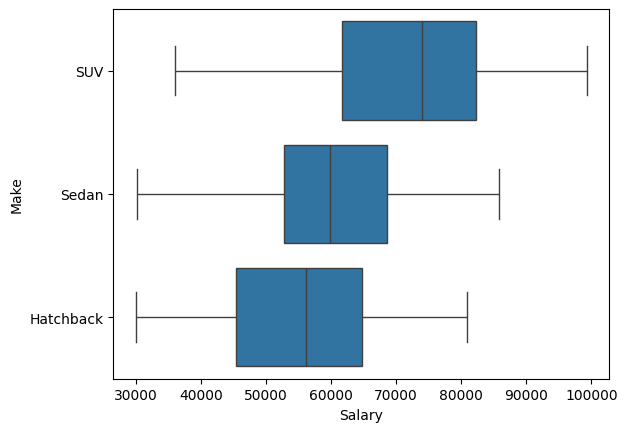

             min    max   median          mean      25%      75%
Make                                                            
Hatchback  33000  33000  27000.0  26474.226804  23000.0  30000.0
SUV        70000  70000  57000.0  55824.915825  51000.0  63000.0
Sedan      55000  55000  33000.0  34603.988604  24000.0  44000.0


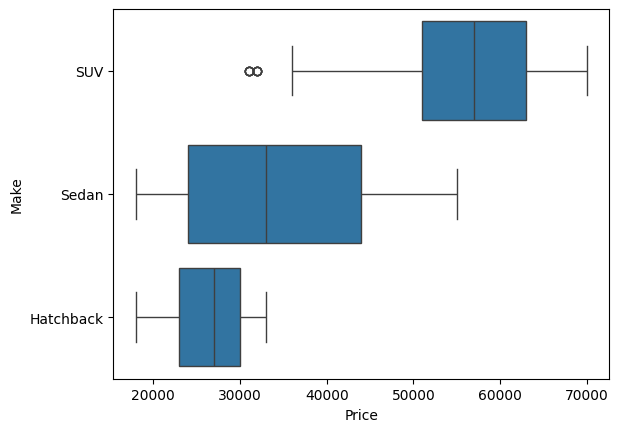

                  min  max  median       mean   25%   75%
No_of_Dependents                                         
0                  51   51    27.0  30.250000  24.0  31.5
1                  53   53    36.0  36.017467  31.0  41.0
2                  54   54    30.0  32.511670  26.0  38.0
3                  54   54    27.0  30.208259  24.0  30.0
4                  53   53    28.0  30.646789  25.0  30.0


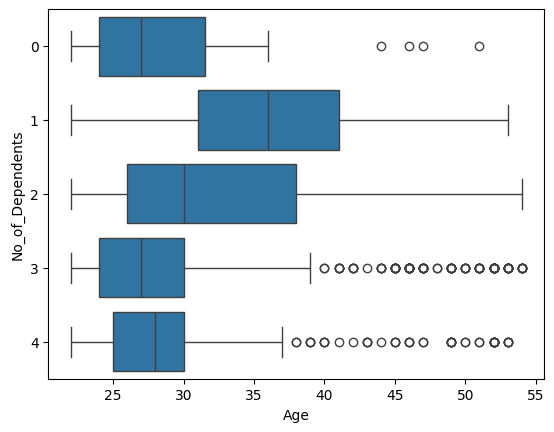

                    min    max   median          mean      25%      75%
No_of_Dependents                                                       
0                 86900  86900  64950.0  59555.000000  39325.0  69775.0
1                 87100  87100  61500.0  61996.506550  56000.0  73700.0
2                 98300  98300  59700.0  60513.644524  51800.0  71800.0
3                 98900  98900  58400.0  59537.701975  51000.0  71700.0
4                 99300  99300  58600.0  60656.880734  52275.0  70625.0


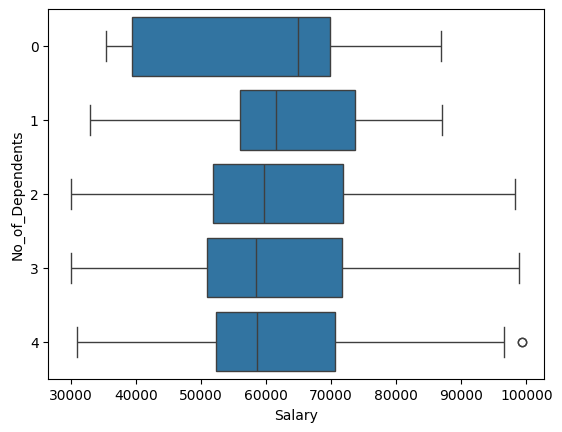

                    min    max   median          mean      25%      75%
No_of_Dependents                                                       
0                 55000  55000  22500.0  28900.000000  21750.0  29500.0
1                 69000  69000  43000.0  42393.013100  35000.0  49000.0
2                 69000  69000  33000.0  36615.798923  26000.0  46000.0
3                 69000  69000  25000.0  31098.743268  22000.0  32000.0
4                 70000  70000  31000.0  37967.889908  29000.0  33000.0


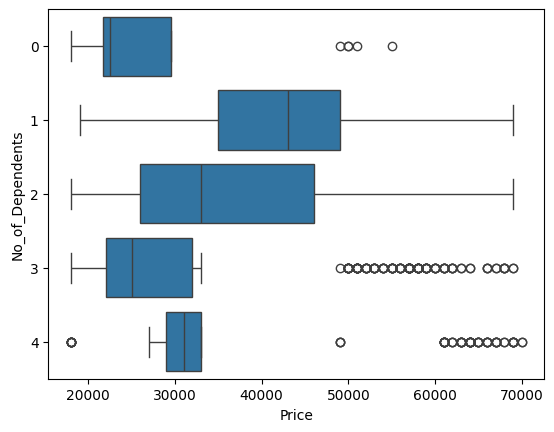

         min  max  median       mean   25%   75%
Age_Bin                                         
22-25     25   25    24.0  23.587112  23.0  25.0
26-29     29   29    28.0  27.575829  27.0  29.0
30-33     33   33    30.0  30.895522  30.0  32.0
34-37     37   37    36.0  35.557252  35.0  36.0
38-41     41   41    39.0  39.312977  38.0  40.0
42-45     45   45    44.0  43.521127  43.0  44.0
46-49     49   49    47.0  47.228070  46.0  49.0
50-53     53   53    52.0  51.814286  51.0  53.0
54-57     54   54    54.0  54.000000  54.0  54.0


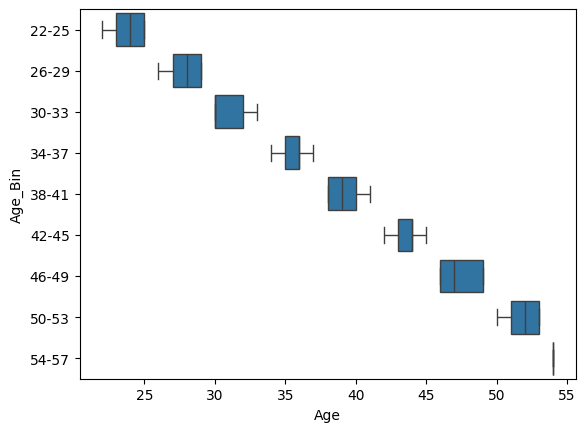

           min    max   median          mean      25%      75%
Age_Bin                                                       
22-25    60900  60900  52100.0  47594.510740  36500.0  56400.0
26-29    80900  80900  63500.0  61814.928910  54825.0  69375.0
30-33    80900  80900  59200.0  56346.766169  43800.0  64900.0
34-37    85800  85800  62000.0  62796.183206  56150.0  70500.0
38-41    87500  87500  70700.0  68065.648855  58350.0  76150.0
42-45    85900  85900  72700.0  68663.380282  56275.0  78075.0
46-49    98900  98900  82200.0  83533.333333  78000.0  87900.0
50-53    99300  99300  80950.0  82925.714286  77425.0  89475.0
54-57    93900  93900  82200.0  83387.500000  81350.0  83000.0


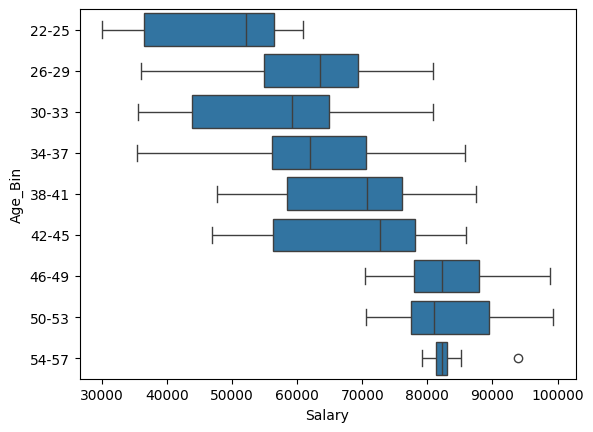

           min    max   median          mean      25%      75%
Age_Bin                                                       
22-25    33000  33000  25000.0  25544.152745  22000.0  29000.0
26-29    53000  53000  26500.0  27210.900474  22000.0  31000.0
30-33    55000  55000  33000.0  35587.064677  28000.0  45000.0
34-37    70000  70000  47000.0  47007.633588  38000.0  53500.0
38-41    68000  68000  47000.0  47526.717557  39000.0  54500.0
42-45    69000  69000  46500.0  46753.521127  39000.0  53000.0
46-49    69000  69000  58000.0  58824.561404  53000.0  64000.0
50-53    70000  70000  58500.0  58785.714286  55000.0  62750.0
54-57    64000  64000  55500.0  56250.000000  53750.0  58250.0


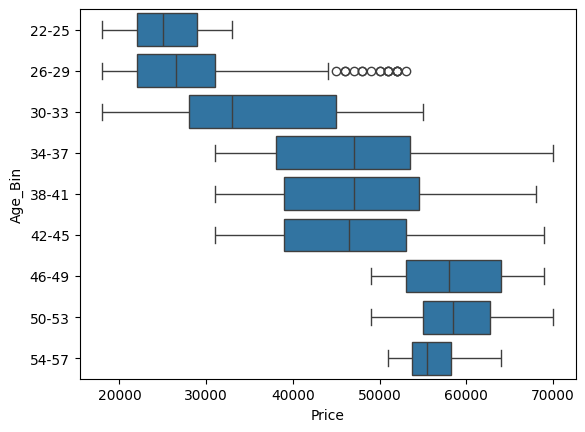

In [37]:
# Plot the box plots of numerical variables, split by categorical variables
# Also print out the min, max, median, mean 25%, 75%
for col in df_cat.columns:
    for var in df_num_filtered.columns:
        print(pd.concat([df.groupby(col)[var].max().reset_index().rename(columns={var: 'min'}).set_index(keys=col),
                         df.groupby(col)[var].max().reset_index().rename(columns={var: 'max'}).set_index(keys=col),
                         df.groupby(col)[var].median().reset_index().rename(columns={var: 'median'}).set_index(keys=col),
                         df.groupby(col)[var].mean().reset_index().rename(columns={var: 'mean'}).set_index(keys=col),
                         df.groupby(col)[var].quantile(0.25).reset_index().rename(columns={var: '25%'}).set_index(keys=col),
                         df.groupby(col)[var].quantile(0.75).reset_index().rename(columns={var: '75%'}).set_index(keys=col),],axis=1))
        sns.boxplot(data=df, x=var, y=col)
        plt.show()

### Problem 1 - Key Questions Explore the data to answer the following key questions:

#### 1. Do men tend to prefer SUVs more compared to women?
##### (Refer: Figure1 below)**No**: Only 10% of Males purchased SUVs and 53% of Female purchased SUVs, The Data Suggests Females prefer SUVs compared to Men.

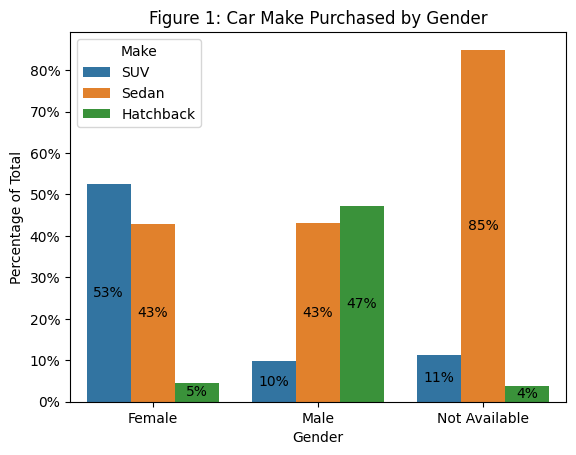

In [38]:
df_temp = df.groupby('Gender')['Make'].value_counts(normalize = True).reset_index()
df_temp.proportion = df_temp.proportion*100
ax = sns.barplot(df_temp,y='proportion',x='Gender',hue = 'Make')
ax.set_title('Figure 1: Car Make Purchased by Gender')
ax.set_ylabel('Percentage of Total')
fmt = '%.0f%%'
xticks = mtick.FormatStrFormatter(fmt)
ax.yaxis.set_major_formatter(xticks)
ax.bar_label(container=ax.containers[0],fmt=fmt,label_type ='center')
ax.bar_label(container=ax.containers[1],fmt=fmt,label_type ='center')
ax.bar_label(container=ax.containers[2],fmt=fmt,label_type ='center')
plt.show()

#### 2. What is the likelihood of a salaried person buying a Sedan?
##### (Refer: Figure 2 below)**44%**: Out of 100 salaried individuals 44 are likely to purchase a Sedan, 33 are likely purchase a Hatchback and the rest 22 a SUV

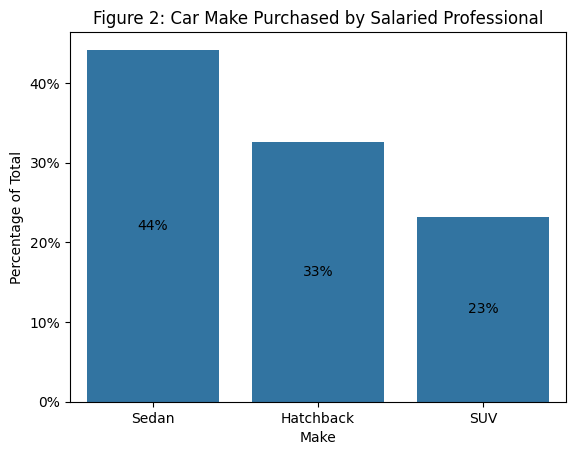

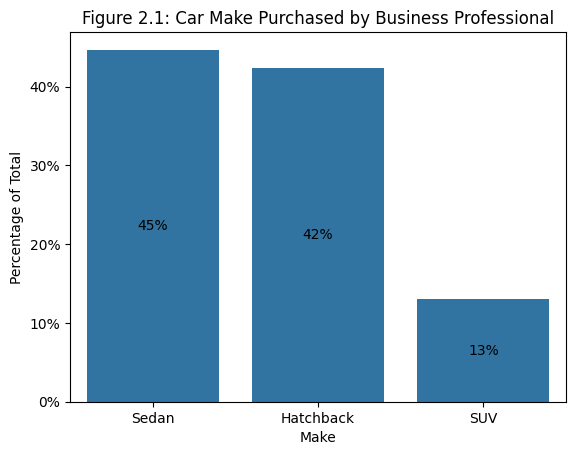

In [39]:
df_temp =  df[df.Profession=='Salaried']['Make'].value_counts(normalize = True).reset_index()
df_temp.proportion = df_temp.proportion*100
ax = sns.barplot(df_temp,y='proportion',x='Make')
ax.set_title('Figure 2: Car Make Purchased by Salaried Professional')
ax.set_ylabel('Percentage of Total')
fmt = '%.0f%%'
xticks = mtick.FormatStrFormatter(fmt)
ax.yaxis.set_major_formatter(xticks)
ax.bar_label(container=ax.containers[0],fmt=fmt,label_type ='center')
plt.show()

df_temp =  df[df.Profession=='Business']['Make'].value_counts(normalize = True).reset_index()
df_temp.proportion = df_temp.proportion*100
ax = sns.barplot(df_temp,y='proportion',x='Make')
ax.set_title('Figure 2.1: Car Make Purchased by Business Professional')
ax.set_ylabel('Percentage of Total')
fmt = '%.0f%%'
xticks = mtick.FormatStrFormatter(fmt)
ax.yaxis.set_major_formatter(xticks)
ax.bar_label(container=ax.containers[0],fmt=fmt,label_type ='center')
plt.show()


#### 3. What evidence or data supports Sheldon Cooper's claim that a salaried male is an easier target for a SUV sale over a Sedan sale?
##### ***There is no evidence to support the claim***, we do have evidence to support that salaried male is an easier target for a Sedan sale over SUV sale.
##### 1. Males are more likely to purchase Sendan's than SUV's. (Refer Figure 1, above)
##### 2. Salaried Individual are more likely to purchase Sendan's than SUV's. (Refer Figure 2, above)
##### 3. Salaried Male Individuals are more likely to purchase Sendan's than SUV's (Refer Figure 3, below)


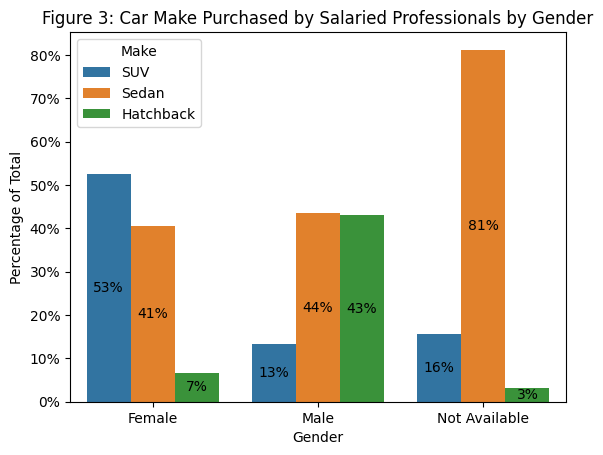

In [40]:
df_salaried = df[df.Profession == 'Salaried']
df_temp = df_salaried.groupby('Gender')['Make'].value_counts(normalize = True).reset_index()
df_temp.proportion = df_temp.proportion*100
ax = sns.barplot(df_temp,y='proportion',x='Gender',hue = 'Make')
ax.set_title('Figure 3: Car Make Purchased by Salaried Professionals by Gender')
ax.set_ylabel('Percentage of Total')
fmt = '%.0f%%'
xticks = mtick.FormatStrFormatter(fmt)
ax.yaxis.set_major_formatter(xticks)
ax.bar_label(container=ax.containers[0],fmt=fmt,label_type ='center')
ax.bar_label(container=ax.containers[1],fmt=fmt,label_type ='center')
ax.bar_label(container=ax.containers[2],fmt=fmt,label_type ='center')
plt.show()

#### 4. How does the the amount spent on purchasing automobiles vary by gender?
##### The amount spent on purchasing automobiles varies ***Greatly*** between the genders. For the most part ***Females*** spend higher amounts on purchasing automobiles than ***Males***.(Refer to Figure 4 and supporting table.)
##### 1. The median value spent by ***Females*** is very much higher than ***Males***: 49K compared to 29K respectively.
##### 2. 50% ***Females*** purchase automobiles in the price range of 38K to 55K, In comparison 50% ***Males*** purchase automobiles in the price range of 24K to 37.5K.
##### 3. 75% of the ***Males** purchase automobiles at a lower price than what 75% of the ***Females** spend on purchasing automobiles.
##### 4. On an average ***Females***  spend around 15K more on on purchasing automobiles than ***Males***

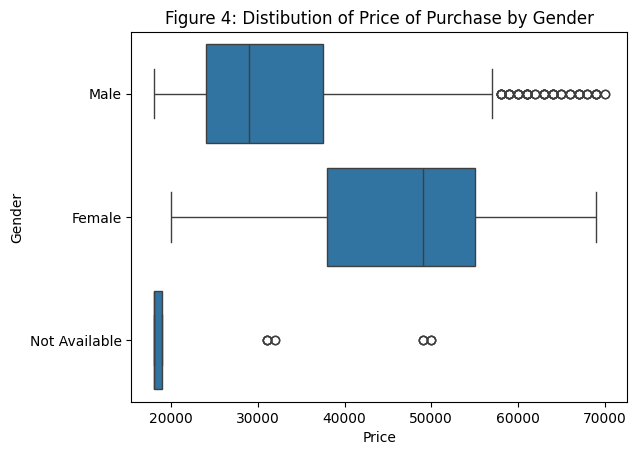

count          mean           std      min      25%      50%  \
Gender                                                                         
Female          329.0  47705.167173  11244.836378  20000.0  38000.0  49000.0   
Male           1199.0  32817.347790  12299.239195  18000.0  24000.0  29000.0   
Not Available    53.0  23339.622642  10308.591257  18000.0  18000.0  18000.0   

                   75%      max  
Gender                           
Female         55000.0  69000.0  
Male           37500.0  70000.0  
Not Available  19000.0  50000.0

In [41]:
df_gender_price = df.loc[:,['Gender','Price']]
ax = sns.boxplot(data=df_gender_price,x='Price',y='Gender')
ax.set_title('Figure 4: Distibution of Price of Purchase by Gender')
plt.show()
df_gender_price.groupby('Gender')['Price'].describe()

#### 5. How much money was spent on purchasing automobiles by individuals who took a personal loan?
##### There is ***not much difference*** in the ***spend for purchasing automobiles*** by individuals who ***took a personal loan vs who did not***.
##### 1. Individuals who ***took a personal loan*** spent 28.99 mill vs who ***did not take a personal loan*** spent 27.29 mill, 52% vs 48% of the total spend respectively.(Refer to Figure 5)
##### 2. The distribution of price/spend between these two groups are very close and simliar.(Refer to Figure 6 and supporting table)
##### 3. 50% Individuals who ***took a personal loan*** spent around 42% to 72% of they salary on purchasing automobiles, 50% individuals who ***did not take a personal loan*** spent around 44% to 74% of they salary on purchasing automobiles, This tells us that immaterial of wether an individual takes a personal loan or not they spend close to same % of they salary to purchase automobiles.(Refer to Figure 7 and supporting table)

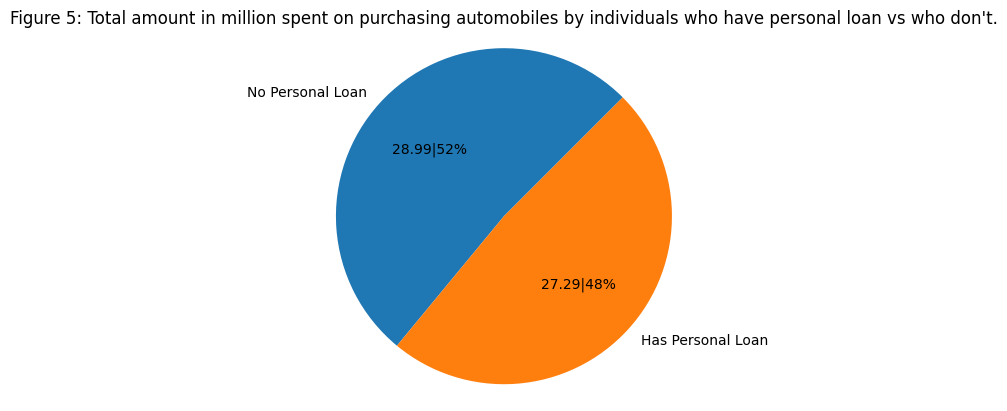

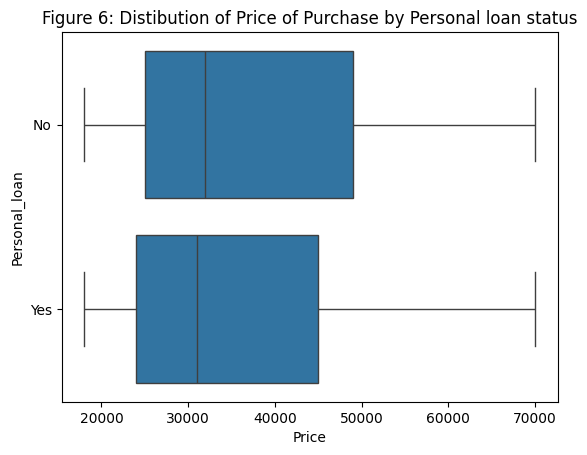

count          mean           std      min      25%      50%  \
Personal_loan                                                                 
No             789.0  36742.712294  14534.344526  18000.0  25000.0  32000.0   
Yes            792.0  34457.070707  12578.780338  18000.0  24000.0  31000.0   

                   75%      max  
Personal_loan                    
No             49000.0  70000.0  
Yes            45000.0  70000.0

In [42]:
# reference :https://stackoverflow.com/questions/41088236/how-to-have-actual-values-in-matplotlib-pie-chart-displayed
df_prsnl_ln_price_sum = df.groupby('Personal_loan')['Price'].sum().reset_index()
total = df_prsnl_ln_price_sum['Price'].sum()
df_prsnl_ln_price_sum['propotion'] =  round((df_prsnl_ln_price_sum['Price']/total)*100)
df_prsnl_ln_price_sum.set_index('Personal_loan',inplace = True)
new_index = ['No Personal Loan', 'Has Personal Loan']
df_prsnl_ln_price_sum['new_index'] = new_index
df_prsnl_ln_price_sum.set_index('new_index', inplace = True)
def absolute_value(val):
    return str(round(val,2))
p, tx, autotexts = plt.pie(df_prsnl_ln_price_sum['Price'],labels = df_prsnl_ln_price_sum.index,autopct=" " ,startangle=45)
for idx, val in enumerate(autotexts):
    abs_val = round(df_prsnl_ln_price_sum['Price'][idx]/1000000,2)
    prop_val = round(df_prsnl_ln_price_sum['propotion'][idx])
    abs_val_fin = str(abs_val)+"|"+str(prop_val)+"%"
    val.set_text("{}".format(abs_val_fin))
plt.axis('equal')
plt.title("Figure 5: Total amount in million spent on purchasing automobiles by individuals who have personal loan vs who don't.")
plt.show()

df_pl_price = df.loc[:,['Personal_loan','Price']]
ax = sns.boxplot(data=df_pl_price,x='Price',y='Personal_loan')
ax.set_title('Figure 6: Distibution of Price of Purchase by Personal loan status')
plt.show()
df_pl_price.groupby('Personal_loan')['Price'].describe()


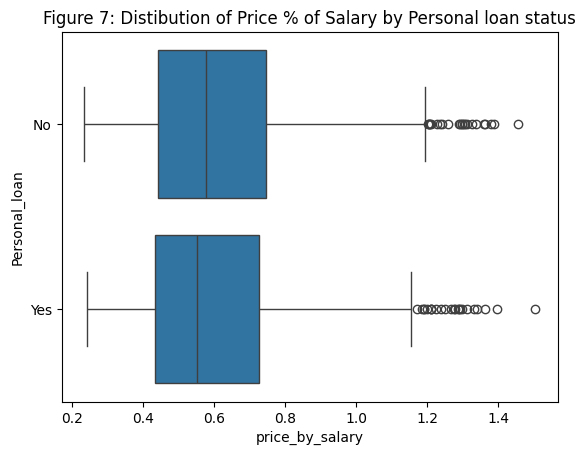

count      mean       std       min       25%       50%  \
Personal_loan                                                            
No             789.0  0.616308  0.232774  0.234070  0.442308  0.576923   
Yes            792.0  0.597657  0.224442  0.242588  0.433071  0.552199   

                    75%       max  
Personal_loan                      
No             0.744921  1.455526  
Yes            0.724811  1.502732

In [43]:
df_prsnl_ln_price_salary = df[['Personal_loan','Price','Salary']].copy()
df_prsnl_ln_price_salary['price_by_salary'] = df_prsnl_ln_price_salary['Price']/df_prsnl_ln_price_salary['Salary']

df_pl_price_by_sal = df_prsnl_ln_price_salary.loc[:,['Personal_loan','price_by_salary']]
ax = sns.boxplot(data=df_pl_price_by_sal,x='price_by_salary',y='Personal_loan')
ax.set_title('Figure 7: Distibution of Price % of Salary by Personal loan status')
plt.show()
df_pl_price_by_sal.groupby('Personal_loan')['price_by_salary'].describe()

####  6. How does having a working partner influence the purchase of higher-priced cars?
##### 1. ***14%*** of the individuals ***who have a working partner*** buy ***higher-priced cars*** vs ***16%** of individuals who **do not** have a working partner.(Refer to Figure 8)
##### 2. This would seen to suggest that having a working partner may lead to a drop in the perference of ***higher-priced cars*** sligthly.

In [44]:
# Checking "Price" to find and get a bin for low,mid and High Price.
price_range = df.Price.max() - df.Price.min()
bins = 3
bin_len = round(price_range/bins)
low_price_tup = (df.Price.min(),df.Price.min()+bin_len-1)
mid_price_tup = (df.Price.min()+bin_len,df.Price.min()+(bin_len*2)-1)
High_price_tup = (df.Price.min()+(bin_len*2), df.Price.min()+(bin_len*10))

def get_price_bin(val):
    if val <= low_price_tup[1]:
        return "Low"
    if val >= mid_price_tup[0] and val <= mid_price_tup[1]:
        return "Mid"
    if val >= High_price_tup[0]:
        return "High"
    return "Error"
df['Price_Bin'] = df['Price'].apply(get_price_bin)

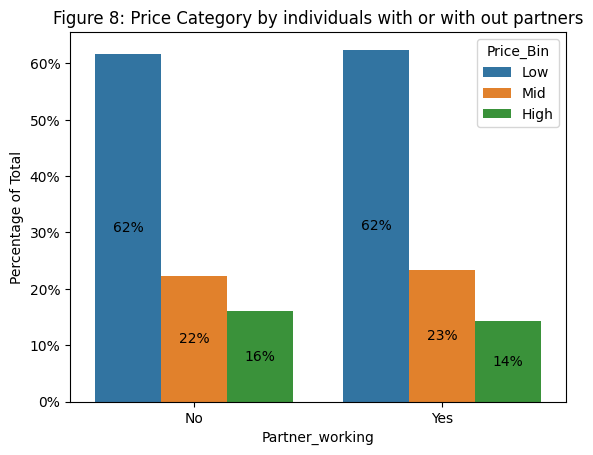

 Price Category defined as: Low Price: between (18000, 35332), Mid Price: between (35333, 52665), Hig Price: between (52666, 191330)


In [45]:

df_temp = df[['Partner_working','Price_Bin']].groupby('Partner_working')['Price_Bin'].value_counts(normalize=True).reset_index()
df_temp.proportion = df_temp.proportion*100
ax = sns.barplot(df_temp,y='proportion',x='Partner_working',hue = 'Price_Bin')
ax.set_title('Figure 8: Price Category by individuals with or with out partners')
ax.set_ylabel('Percentage of Total')
fmt = '%.0f%%'
xticks = mtick.FormatStrFormatter(fmt)
ax.yaxis.set_major_formatter(xticks)
ax.bar_label(container=ax.containers[0],fmt=fmt,label_type ='center')
ax.bar_label(container=ax.containers[1],fmt=fmt,label_type ='center')
ax.bar_label(container=ax.containers[2],fmt=fmt,label_type ='center')
plt.show()

print(f' Price Category defined as: Low Price: between {low_price_tup}, Mid Price: between {mid_price_tup}, Hig Price: between {High_price_tup}')

#### Problem 1 - Actionable Insights & Recommendations
- Actionable Insights - Business Recommendations - 6

##### Actionable Insights - Business Recommendations
1. The Purchase behaviour between ***Females*** and ***Males*** certainly stands out.(Refer to Figure G1,G2,G3 and G4)
    1. ***Females*** seem to prefer SUV followed by Sedan and Hatchback, ***Males*** prefer Hatchback followed by Sedan and SUV.
    2. 50% ***Females*** purchase automobiles in the price range of 38K to 55K, In comparison 50% ***Males*** purchase automobiles in the price range of 24K to 37.5K.
    3. 75% of the ***Males** purchase automobiles at a lower price than what 75% of the ***Females** spend on purchasing automobiles.
    4. On an average ***Females*** spend around 15K more on on purchasing automobiles than ***Males***
        1. 82% ***Females*** perferred price points in the Mid-low range, where as 73% ***Males*** perferred price points in the low range.
    5. **Recommendations**: 
        1. Marketing campaing targeted to ***Gender**, should be looked into.
        2. 76% of the customer base are ***Men***,***73%*** perferred low range price points, ***43% of Men*** prefer Sedans, marketing campaings for ***Men targeting low-range price point Sedans*** should be looked into.
        3. 82% ***Females*** perferred price points in the Mid-High range, ***96% of Women*** prefer SUV's and Sedans with over 50% perfering SUV's, marketing campaings for ***Women targeting Mid-High range price point SUVs and Sedans*** should be looked into.
        3. Look into features of cars by ***Make*** and ***Model***, Purchased by different genders to check if some features are perffered by one over the other. 

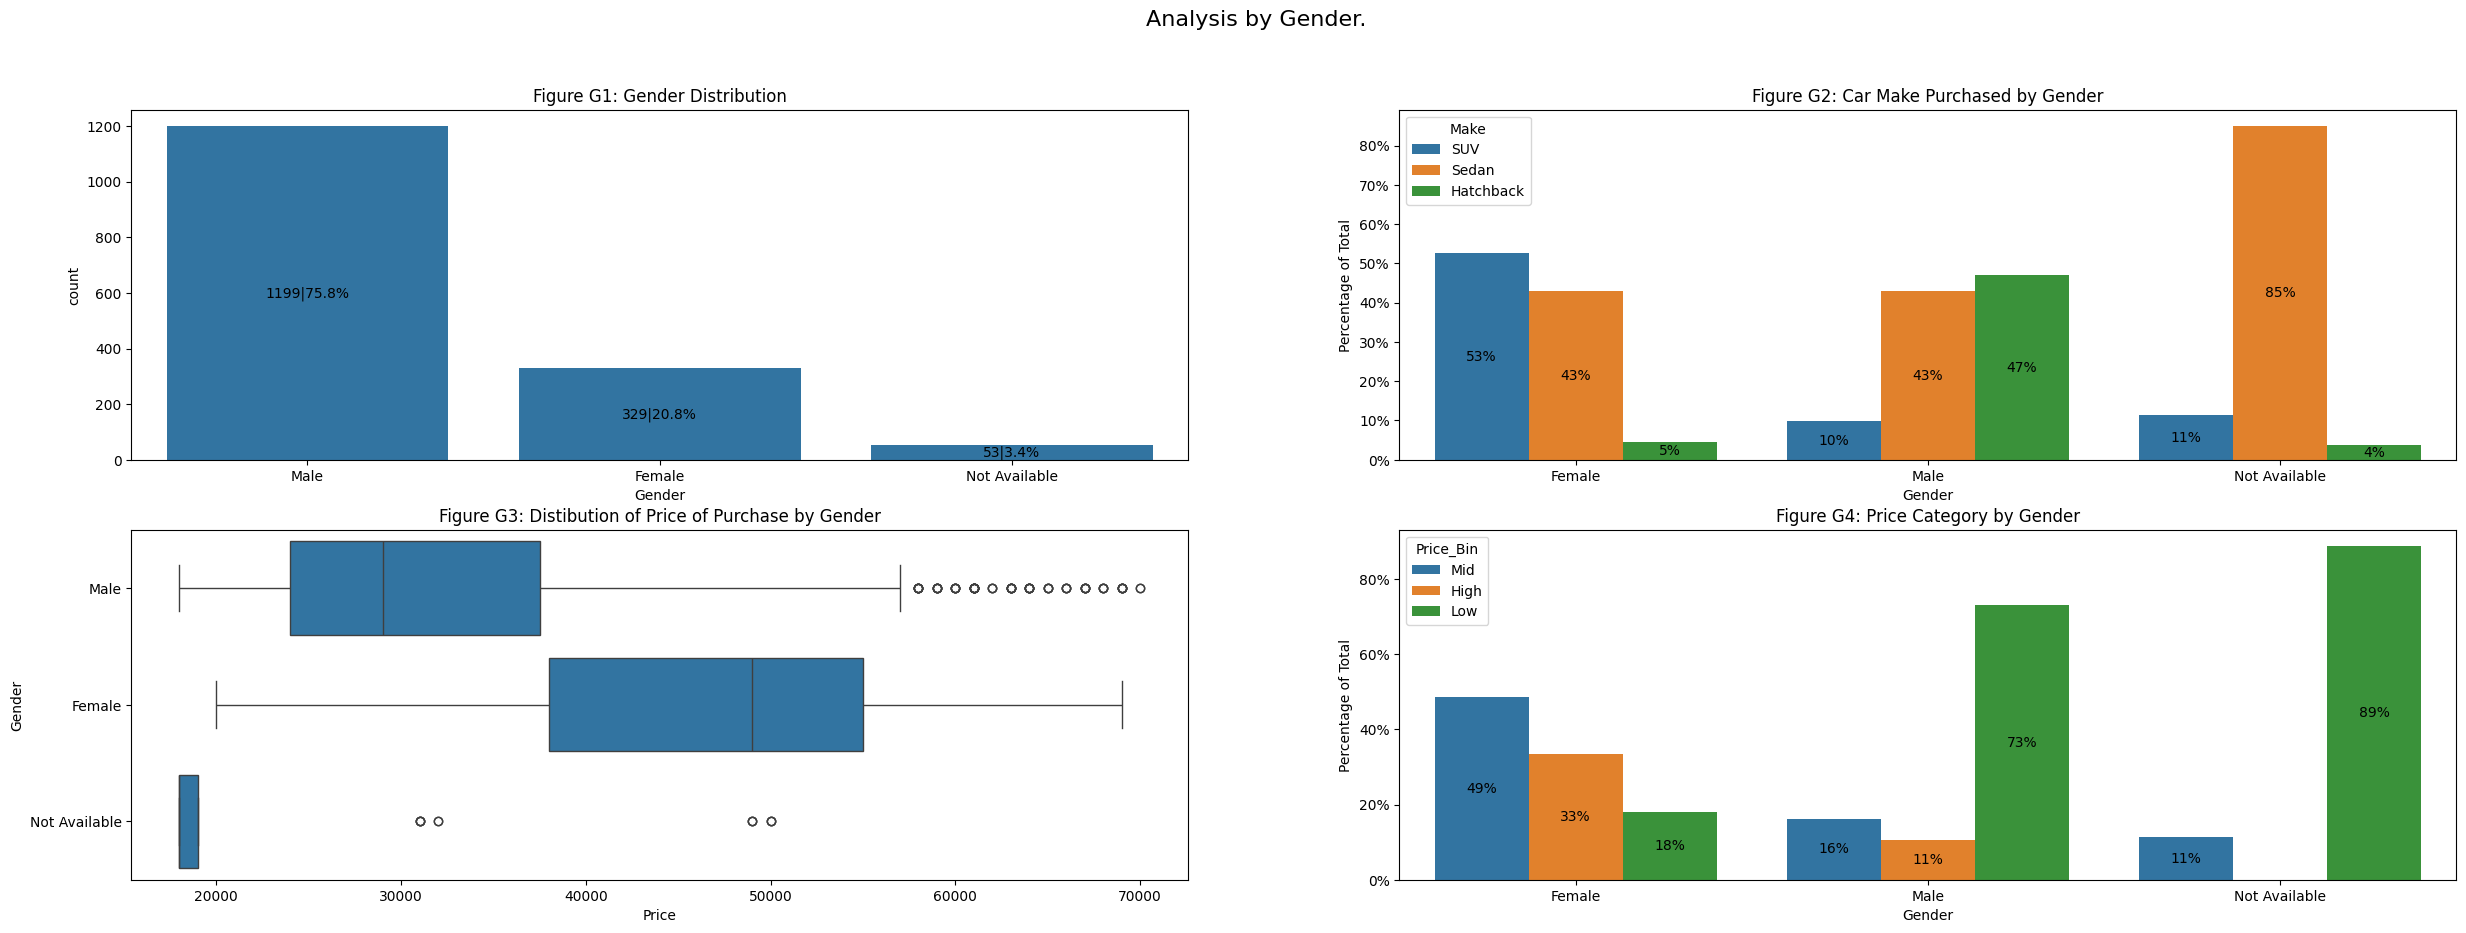

In [46]:
#reference : https://www.youtube.com/watch?v=4DnWYK88-E4, subplots
plt.figure(figsize=(30,10))
plt.subplot(2,2,1)
ax1= sns.countplot(data=df_cat, x='Gender', order = df_cat['Gender'].value_counts().index)
abs_values = df['Gender'].value_counts().values
abs_values_per = df['Gender'].value_counts(normalize = True).values
abs_val_final = []
for idx, i in enumerate(abs_values):
    abs_fin = str(i) + "|" + str(round(abs_values_per[idx]*100,1))+"%"
    abs_val_final.append(abs_fin)    
ax1.bar_label(container=ax1.containers[0],labels=abs_val_final, label_type ='center')
ax1.set_title('Figure G1: Gender Distribution')

plt.subplot(2,2,2)
df_temp = df.groupby('Gender')['Make'].value_counts(normalize = True).reset_index()
df_temp.proportion = df_temp.proportion*100
ax2 = sns.barplot(df_temp,y='proportion',x='Gender',hue = 'Make')
ax2.set_title('Figure G2: Car Make Purchased by Gender')
ax2.set_ylabel('Percentage of Total')
fmt = '%.0f%%'
xticks = mtick.FormatStrFormatter(fmt)
ax2.yaxis.set_major_formatter(xticks)
ax2.bar_label(container=ax2.containers[0],fmt=fmt,label_type ='center')
ax2.bar_label(container=ax2.containers[1],fmt=fmt,label_type ='center')
ax2.bar_label(container=ax2.containers[2],fmt=fmt,label_type ='center')

plt.subplot(2,2,3)
df_gender_price = df.loc[:,['Gender','Price']]
ax3 = sns.boxplot(data=df_gender_price,x='Price',y='Gender')
ax3.set_title('Figure G3: Distibution of Price of Purchase by Gender')

plt.subplot(2,2,4)
df_temp = df[['Gender','Price_Bin']].groupby('Gender')['Price_Bin'].value_counts(normalize=True).reset_index()
df_temp.proportion = df_temp.proportion*100
ax = sns.barplot(df_temp,y='proportion',x='Gender',hue = 'Price_Bin')
ax.set_title('Figure G4: Price Category by Gender')
ax.set_ylabel('Percentage of Total')
fmt = '%.0f%%'
xticks = mtick.FormatStrFormatter(fmt)
ax.yaxis.set_major_formatter(xticks)
ax.bar_label(container=ax.containers[0],fmt=fmt,label_type ='center')
ax.bar_label(container=ax.containers[1],fmt=fmt,label_type ='center')
ax.bar_label(container=ax.containers[2],fmt=fmt,label_type ='center')
plt.suptitle('Analysis by Gender.',fontsize=16)
plt.show()

2. The Purchase behaviour between ***Different Age groups*** also stands out.
    1. Since we have established that ***Gender*** is an important factor we look at Age groups behaviour which are gender specific.
        1. The Analysis of ***Age Groups*** for ***Women*** give us the following insigths. (Refer to Figure W1,W2,W3 and W4)
            1. Nearly 70% of the Female Population is in the Age group of ***30-45 years***, Majority of these perfer Sedans with the ***42-45 years*** group perfering SUVs.
            2. The age groups above ***45 years***, all perfer SUV's. The youngest age group of ***22-25 years*** all perfer Hatchbacks. ***26-37 years*** lean heavily towards Sedans and ***26-37 years*** show a almost equal perference to Sedans and SUVs with no perference for Hatchbacks.
            3. From a price point stand point, The youngest age group of ***22-25 years*** all prefer price points on the lower range, age group of ***30-45 years*** prefer Mid-High range prices 70-80% of the time, age group of ***46 and above** prefer High range prices about most of the time 77% or greater to be specific, and in the case of age groups above ***54 years***   High range prices are perfered 100% of the time.
        2. **Recommendations**: 
            1. Marketing campaing targeted to ***Women of different age groups***, should be looked into.
            2. Campaings for ***Hatchbacks with Lower Price range*** should be targeted towards ***Women between the age groups of 22-25 years***.
            3. Campaings for ***Sedans and SUVs with Mid-High Price range*** should be targeted towards ***Women between the age groups of 26-45 years***
            3. Campaings for ***SUVs with High Price range*** should be targeted towards ***Women of age groups of 46 or older years***
        1. The Analysis of ***Age Groups*** for ***Men*** give us the following insigths. (Refer to Figure M1,M2,M3 and M4)
            1. Nearly 70% of the Male Population is in the Age group of ***30-45 years***, Majority of these perfer Sedans with the ***34-45 years*** group perfering SUVs about 25% of the time and the younger age group ***30-33 years*** perfering Hatchbacks about 33% of the time.
            2. The age groups above ***45 years***, all perfer SUV's. The younger age group of ***22-29 years*** perfer Hatchbacks most of the time and Sedans the rest of the time, They do not show interest in SUVs for the most part.
            3. From a price point stand point, The younger age group of ***22-29 years*** all prefer price points on the lower range for the most part, age group of ***34-45 years*** prefer Mid-High range prices 80% of the time, age group of ***46 and above** prefer High range prices.
        2. **Recommendations**: 
            1. Marketing campaing targeted to ***Men of different age groups***, should be looked into.
            2. Campaings for ***Hatchbacks with Lower Price range*** should be targeted towards ***Men between the age groups of 22-33 years***.
            3. Campaings for ***Sedans and SUVs with Mid-High Price range*** should be targeted towards ***Men between the age groups of 34-45 years***
            3. Campaings for ***SUVs with High Price range*** should be targeted towards ***Men of age groups of 46 or older years***


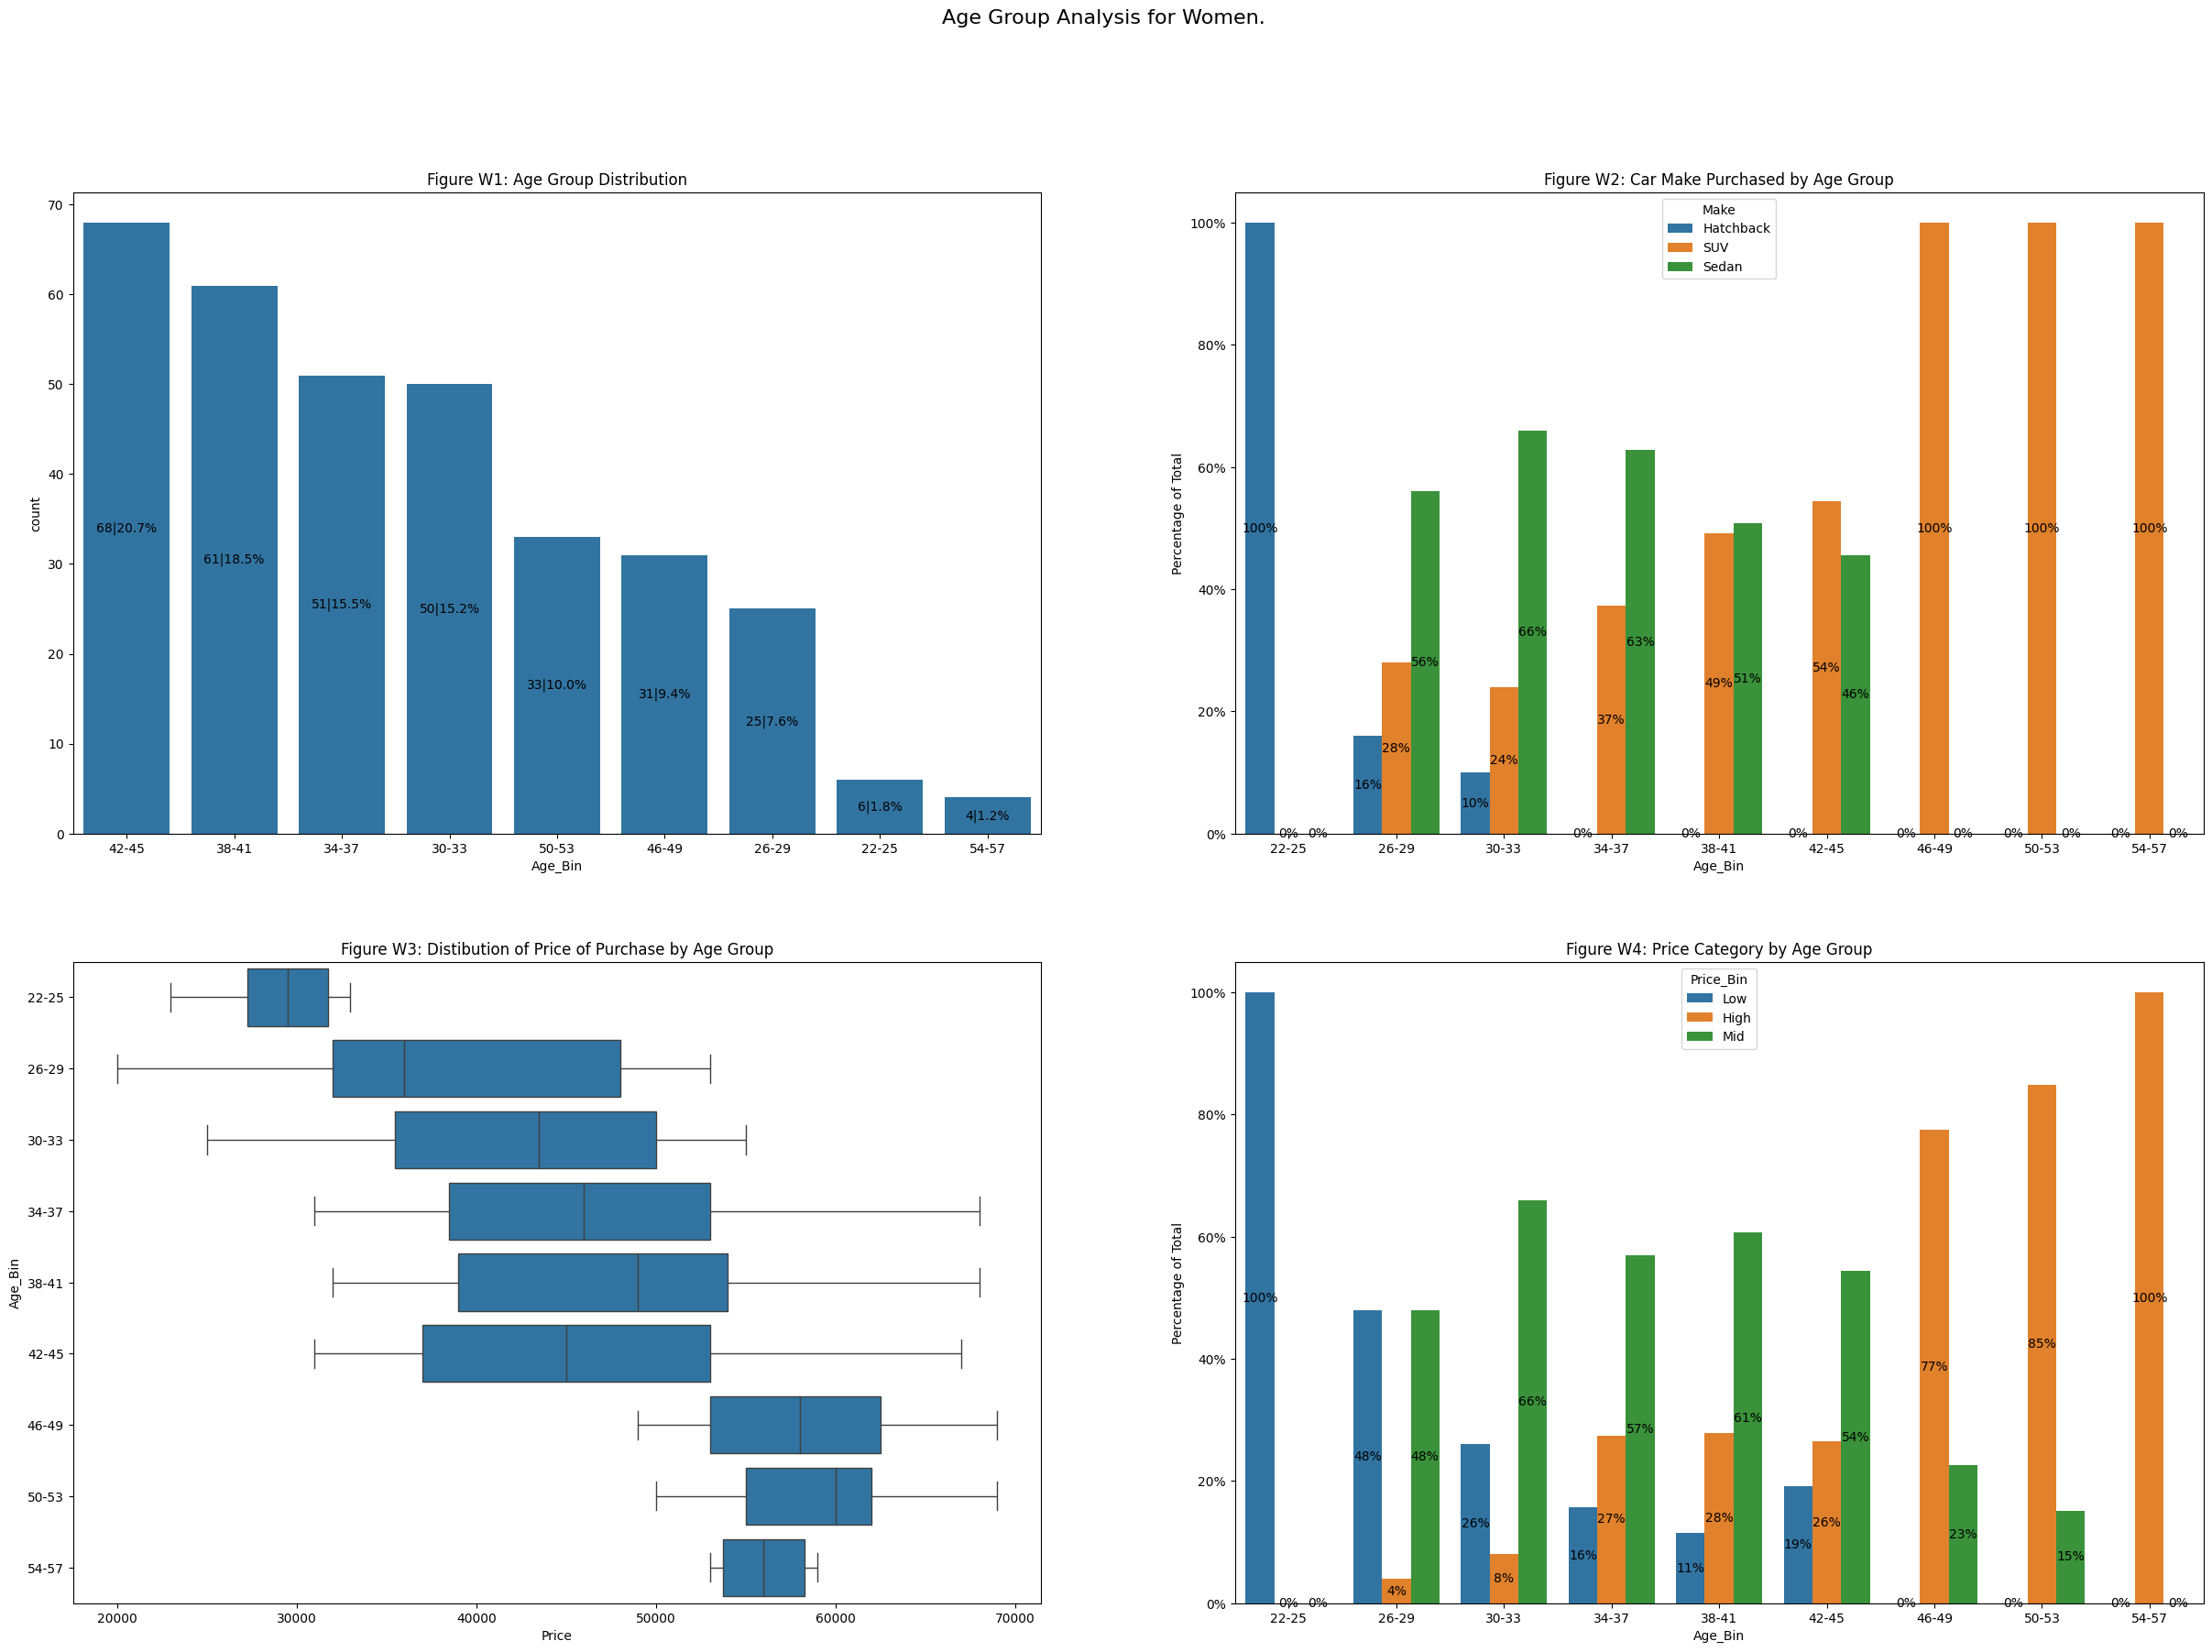

In [47]:
plt.figure(figsize=(30,20))

plt.subplot(2,2,1)
ax1= sns.countplot(data=df[df.Gender == 'Female'], x='Age_Bin', order = df[df.Gender == 'Female']['Age_Bin'].value_counts().index)
abs_values = df[df.Gender == 'Female']['Age_Bin'].value_counts().values
abs_values_per = df[df.Gender == 'Female']['Age_Bin'].value_counts(normalize = True).values
abs_val_final = []
    
for idx, i in enumerate(abs_values):
    abs_fin = str(i) + "|" + str(round(abs_values_per[idx]*100,1))+"%"
    abs_val_final.append(abs_fin)    
ax1.bar_label(container=ax1.containers[0],labels=abs_val_final, label_type ='center')
ax1.set_title('Figure W1: Age Group Distribution')


plt.subplot(2,2,2)
df_temp = df[df.Gender == 'Female'].groupby('Age_Bin')['Make'].value_counts(normalize = True).reset_index()
df_temp.proportion = df_temp.proportion*100
ax2 = sns.barplot(df_temp,y='proportion',x='Age_Bin',hue = 'Make')
ax2.set_title('Figure W2: Car Make Purchased by Age Group')
ax2.set_ylabel('Percentage of Total')
fmt = '%.0f%%'
xticks = mtick.FormatStrFormatter(fmt)
ax2.yaxis.set_major_formatter(xticks)
ax2.bar_label(container=ax2.containers[0],fmt=fmt,label_type ='center')
ax2.bar_label(container=ax2.containers[1],fmt=fmt,label_type ='center')
ax2.bar_label(container=ax2.containers[2],fmt=fmt,label_type ='center')


plt.subplot(2,2,3)
df_gender_price = df[df.Gender == 'Female'].loc[:,['Age_Bin','Price']]
ax3 = sns.boxplot(data=df_gender_price,x='Price',y='Age_Bin')
ax3.set_title('Figure W3: Distibution of Price of Purchase by Age Group')


plt.subplot(2,2,4)
df_temp = df[df.Gender == 'Female'][['Age_Bin','Price_Bin']].groupby('Age_Bin')['Price_Bin'].value_counts(normalize=True).reset_index()
df_temp.proportion = df_temp.proportion*100
ax = sns.barplot(df_temp,y='proportion',x='Age_Bin',hue = 'Price_Bin')
ax.set_title('Figure W4: Price Category by Age Group')
ax.set_ylabel('Percentage of Total')
fmt = '%.0f%%'
xticks = mtick.FormatStrFormatter(fmt)
ax.yaxis.set_major_formatter(xticks)
ax.bar_label(container=ax.containers[0],fmt=fmt,label_type ='center')
ax.bar_label(container=ax.containers[1],fmt=fmt,label_type ='center')
ax.bar_label(container=ax.containers[2],fmt=fmt,label_type ='center')

plt.suptitle('Age Group Analysis for Women.',fontsize=16)
plt.show()

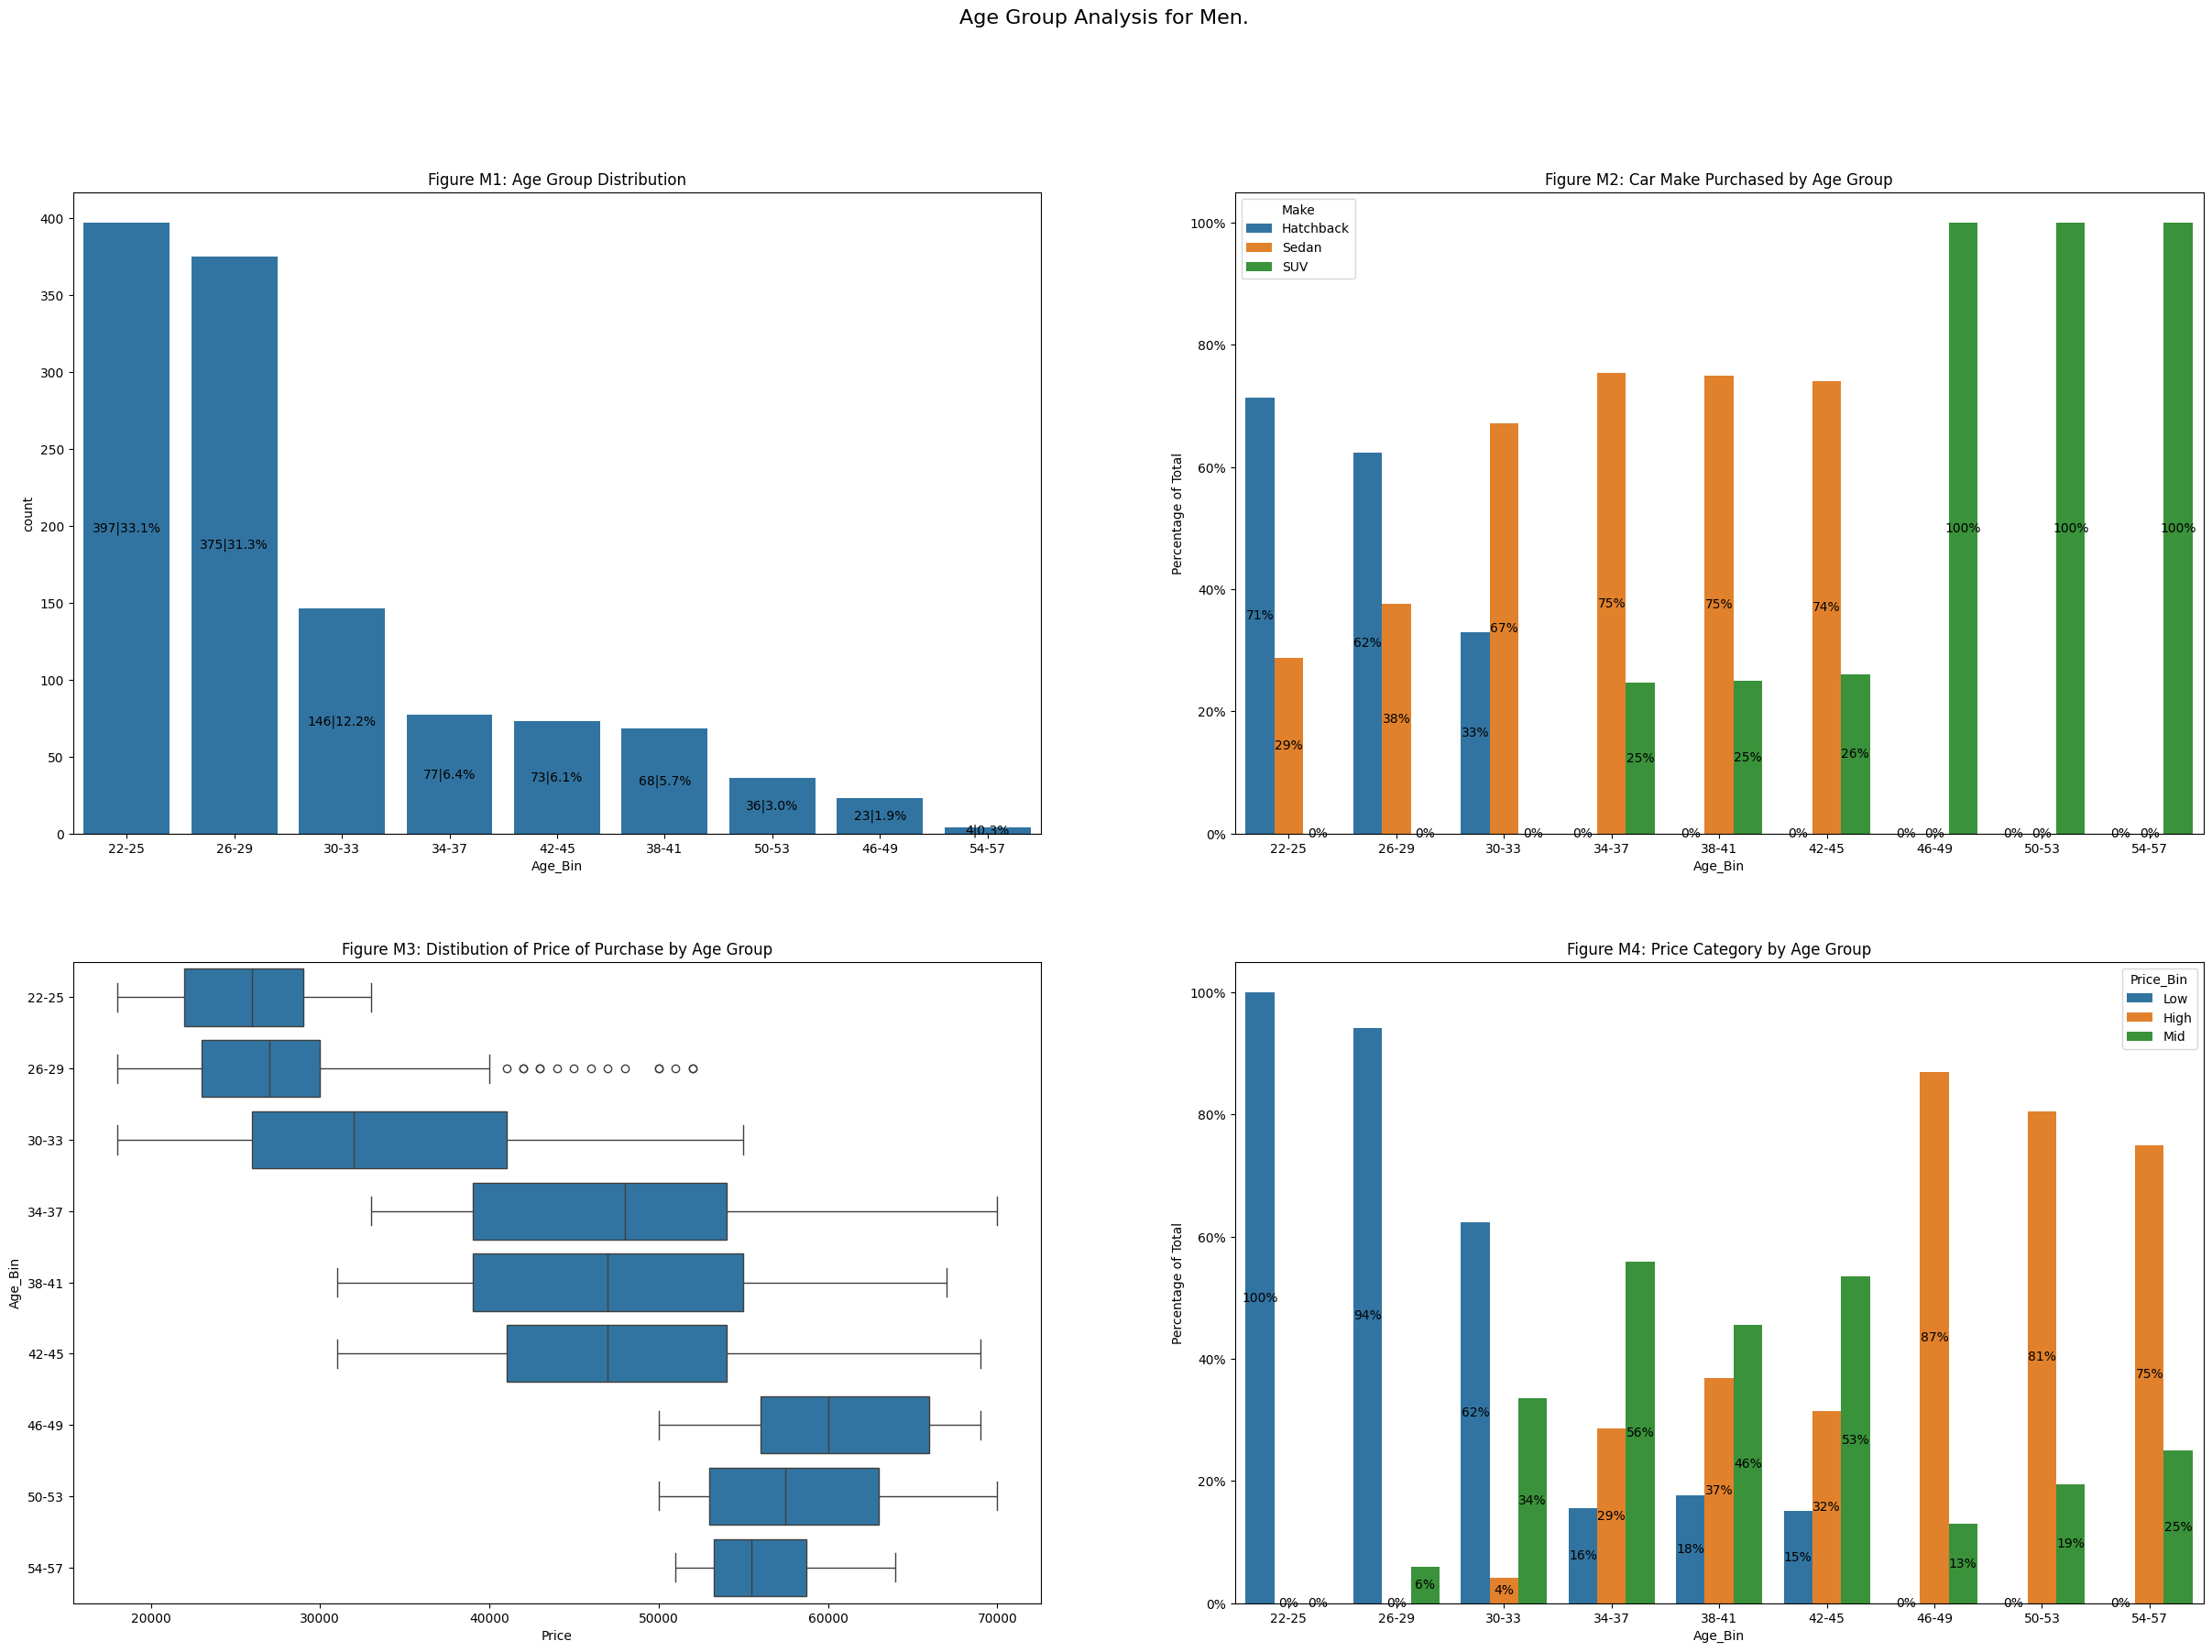

In [48]:
plt.figure(figsize=(30,20))

plt.subplot(2,2,1)
ax1= sns.countplot(data=df[df.Gender == 'Male'], x='Age_Bin', order = df[df.Gender == 'Male']['Age_Bin'].value_counts().index)
abs_values = df[df.Gender == 'Male']['Age_Bin'].value_counts().values
abs_values_per = df[df.Gender == 'Male']['Age_Bin'].value_counts(normalize = True).values
abs_val_final = []
    
for idx, i in enumerate(abs_values):
    abs_fin = str(i) + "|" + str(round(abs_values_per[idx]*100,1))+"%"
    abs_val_final.append(abs_fin)    
ax1.bar_label(container=ax1.containers[0],labels=abs_val_final, label_type ='center')
ax1.set_title('Figure M1: Age Group Distribution')


plt.subplot(2,2,2)
df_temp = df[df.Gender == 'Male'].groupby('Age_Bin')['Make'].value_counts(normalize = True).reset_index()
df_temp.proportion = df_temp.proportion*100
ax2 = sns.barplot(df_temp,y='proportion',x='Age_Bin',hue = 'Make')
ax2.set_title('Figure M2: Car Make Purchased by Age Group')
ax2.set_ylabel('Percentage of Total')
fmt = '%.0f%%'
xticks = mtick.FormatStrFormatter(fmt)
ax2.yaxis.set_major_formatter(xticks)
ax2.bar_label(container=ax2.containers[0],fmt=fmt,label_type ='center')
ax2.bar_label(container=ax2.containers[1],fmt=fmt,label_type ='center')
ax2.bar_label(container=ax2.containers[2],fmt=fmt,label_type ='center')


plt.subplot(2,2,3)
df_gender_price = df[df.Gender == 'Male'].loc[:,['Age_Bin','Price']]
ax3 = sns.boxplot(data=df_gender_price,x='Price',y='Age_Bin')
ax3.set_title('Figure M3: Distibution of Price of Purchase by Age Group')


plt.subplot(2,2,4)
df_temp = df[df.Gender == 'Male'][['Age_Bin','Price_Bin']].groupby('Age_Bin')['Price_Bin'].value_counts(normalize=True).reset_index()
df_temp.proportion = df_temp.proportion*100
ax = sns.barplot(df_temp,y='proportion',x='Age_Bin',hue = 'Price_Bin')
ax.set_title('Figure M4: Price Category by Age Group')
ax.set_ylabel('Percentage of Total')
fmt = '%.0f%%'
xticks = mtick.FormatStrFormatter(fmt)
ax.yaxis.set_major_formatter(xticks)
ax.bar_label(container=ax.containers[0],fmt=fmt,label_type ='center')
ax.bar_label(container=ax.containers[1],fmt=fmt,label_type ='center')
ax.bar_label(container=ax.containers[2],fmt=fmt,label_type ='center')

plt.suptitle('Age Group Analysis for Men.',fontsize=16)
plt.show()

# Problem 2
## Context
A bank generates revenue through interest, transaction fees, and financial advice, with interest charged on customer loans being a significant source of profits. 
GODIGT Bank, a mid-sized private bank, offers various banking products and cross-sells asset products to existing customers through different communication methods. 
However, the bank is facing high credit card attrition, leading them to reevaluate their credit card policy to ensure customers receive the right card for higher spending and intent,resulting in profitable relationships.

## Data Description
**userid** - Unique bank customer-id<br>
**card_no** - Masked credit card number<br>
**card_bin_no** - Credit card IIN number<br>
**Issuer** - Card network issuer<br>
**card_type** - Credit card type<br>
**card_source_data** - Credit card sourcing date<br>
**high_networth** - Customer category based on their net-worth value (A: High to E: Low)<br>
**active_30** - Savings/Current/Salary etc. account activity in last 30 days<br>
**active_60** - Savings/Current/Salary etc. account activity in last 60 days<br>
**active_90** - Savings/Current/Salary etc. account activity in last 90 days<br>
**cc_active30** - Credit Card activity in the last 30 days<br>
**cc_active60** - Credit Card activity in the last 60 days<br>
**cc_active90** - Credit Card activity in the last 90 days<br>
**hotlist_flag** - Whether card is hot-listed(Any problem noted on the card)<br>
**widget_products** - Number of convenience products customer holds (dc, cc, net-banking active, mobile banking active, wallet active, etc.)<br>
**engagement_products** - Number of investment/loan products the customer holds (FD, RD, Personal loan, auto loan)<br>
**annual_income_at_source** - Annual income recorded in the credit card application<br>
**other_bank_cc_holding** - Whether the customer holds another bank credit card<br>
**bank_vintage** - Vintage with the bank (in months) as on Tthmonth<br>
**T+1_month_activity** - Whether customer uses credit card in T+1 month (future)<br>
**T+2_month_activity** - Whether customer uses credit card in T+2 month (future)<br>
**T+3_month_activity** - Whether customer uses credit card in T+3 month (future)<br>
**T+6_month_activity** - Whether customer uses credit card in T+6 month (future)<br>
**T+12_month_activity** - Whether customer uses credit card in T+12 month (future)<br>
**Transactor_revolver** - Revolver: Customer who carries balances over from one month to the next. Transactor: Customer who pays off their balances in full every month.<br>
**avg_spends_l3m** - Average credit card spends in last 3 months<br>
**Occupation_at_source** - Occupation recorded at the time of credit card application<br>
**cc_limit** - Current credit card limit<br>

#### Problem 2 - Actionable Insights & Recommendations
- Analyse the dataset and list down the top 5 important variables, along with the business justifications. - 10
##### Top 5 important variables are **high_networth**,**avg_spends_l3m**, **cc_limit**,**card_type** and **cc_active** fields.
***Business Justifications***
**high_networth**,**avg_spends_l3m**, **cc_limit** , **card_type** and **overall_future_month_activity** are the top 5 important variables as the distributions of **avg_spends_l3m** and  **cc_limit* vary in most cases for ***high_networth**,**card_type** and **overall_future_month_activity**.(Refer to Figure **P2.1 through to P2.6 below**).

In [49]:
df_cc_data = pd.read_excel("./data/godigt_cc_data.xlsx")

In [50]:
#Exploring the data
df_cc_data.shape

(8448, 28)

In [51]:
#Exploring the data
df_cc_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8448 entries, 0 to 8447
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   userid                   8448 non-null   int64         
 1   card_no                  8448 non-null   object        
 2   card_bin_no              8448 non-null   int64         
 3   Issuer                   8448 non-null   object        
 4   card_type                8448 non-null   object        
 5   card_source_date         8448 non-null   datetime64[ns]
 6   high_networth            8448 non-null   object        
 7   active_30                8448 non-null   int64         
 8   active_60                8448 non-null   int64         
 9   active_90                8448 non-null   int64         
 10  cc_active30              8448 non-null   int64         
 11  cc_active60              8448 non-null   int64         
 12  cc_active90              8448 non-

In [52]:
#Checking for nulls
df_cc_data.isnull().sum()

userid                      0
card_no                     0
card_bin_no                 0
Issuer                      0
card_type                   0
card_source_date            0
high_networth               0
active_30                   0
active_60                   0
active_90                   0
cc_active30                 0
cc_active60                 0
cc_active90                 0
hotlist_flag                0
widget_products             0
engagement_products         0
annual_income_at_source     0
other_bank_cc_holding       0
bank_vintage                0
T+1_month_activity          0
T+2_month_activity          0
T+3_month_activity          0
T+6_month_activity          0
T+12_month_activity         0
Transactor_revolver        38
avg_spends_l3m              0
Occupation_at_source        0
cc_limit                    0
dtype: int64

In [53]:
#Removing nulls and 0 rows
df_cc_data_not_null = df_cc_data[(df_cc_data['Transactor_revolver'].isnull() == False) & (df_cc_data['Occupation_at_source']!=0)].copy()

In [54]:
cols = list(df_cc_data_not_null.columns)
ignore_id_cols = ['userid','card_no','card_bin_no']
non_id_cols = [col for col in cols if col not in ignore_id_cols]

In [55]:
#Creating new features as a grouping of similar features

df_cc_data_not_null['overall_active'] = df_cc_data_not_null['active_30'] + df_cc_data_not_null['active_60'] + df_cc_data_not_null['active_90']
df_cc_data_not_null['overall_cc_active'] = df_cc_data_not_null['cc_active30'] + df_cc_data_not_null['cc_active60'] + df_cc_data_not_null['cc_active90']
df_cc_data_not_null['overall_future_month_activity'] = df_cc_data_not_null['T+1_month_activity']+df_cc_data_not_null['T+2_month_activity']+df_cc_data_not_null['T+3_month_activity']+df_cc_data_not_null['T+6_month_activity']+df_cc_data_not_null['T+12_month_activity']

#Converting Categorical values to numerical 
map_high_networth = {'A': 4,'B': 3,'C': 2, 'D': 1, 'E': 0}
df_cc_data_not_null.replace({'high_networth': map_high_networth}, inplace=True)

#Converting Categorical values to numerical 
map_issuer = {'Visa': 0,'Mastercard': 1,'Amex': 2}
df_cc_data_not_null.replace({'Issuer': map_issuer}, inplace=True)

#Converting Categorical values to numerical 
map_card_type = {'rewards': 0, 'prosperity': 1, 'edge': 2, 'chartered': 3, 'smartearn': 4,
                  'shoprite': 5, 'indianoil': 6, 'cashback': 7, 'aura': 8, 'gold': 9, 'prime': 10,
                  'pulse': 11, 'elite': 12, 'centurion': 13, 'platinum': 14}
df_cc_data_not_null.replace({'card_type': map_card_type}, inplace=True)

#Converting Categorical values to numerical 
map_hotlist_flag = {'N': 0, 'Y': 1}
df_cc_data_not_null.replace({'hotlist_flag': map_hotlist_flag}, inplace=True)

#Converting Categorical values to numerical 
map_other_bank_cc_holding = {'N': 0, 'Y': 1}
df_cc_data_not_null.replace({'other_bank_cc_holding': map_other_bank_cc_holding}, inplace=True)

#Converting Categorical values to numerical 
map_transactor_revolver = {'T': 0, 'R': 1}
df_cc_data_not_null.replace({'Transactor_revolver': map_transactor_revolver}, inplace=True)

#Converting Categorical values to numerical 
map_Occupation_at_source = {'Salaried':0, 'Self Employed':1, 'Retired':2, 'Student':3, 'Housewife':4}
df_cc_data_not_null.replace({'Occupation_at_source': map_Occupation_at_source}, inplace=True)



#Converting Categorical columns to Integer type. 
df_cc_data_not_null['Issuer'] =  df_cc_data_not_null['Issuer'].astype('int')
df_cc_data_not_null['card_type'] =  df_cc_data_not_null['card_type'].astype('int')
df_cc_data_not_null['high_networth'] =  df_cc_data_not_null['high_networth'].astype('int')
df_cc_data_not_null['hotlist_flag'] =  df_cc_data_not_null['hotlist_flag'].astype('int')
df_cc_data_not_null['other_bank_cc_holding'] =  df_cc_data_not_null['other_bank_cc_holding'].astype('int')
df_cc_data_not_null['Transactor_revolver'] =  df_cc_data_not_null['Transactor_revolver'].astype('int')
df_cc_data_not_null['map_Occupation_at_source'] =  df_cc_data_not_null['Transactor_revolver'].astype('int')

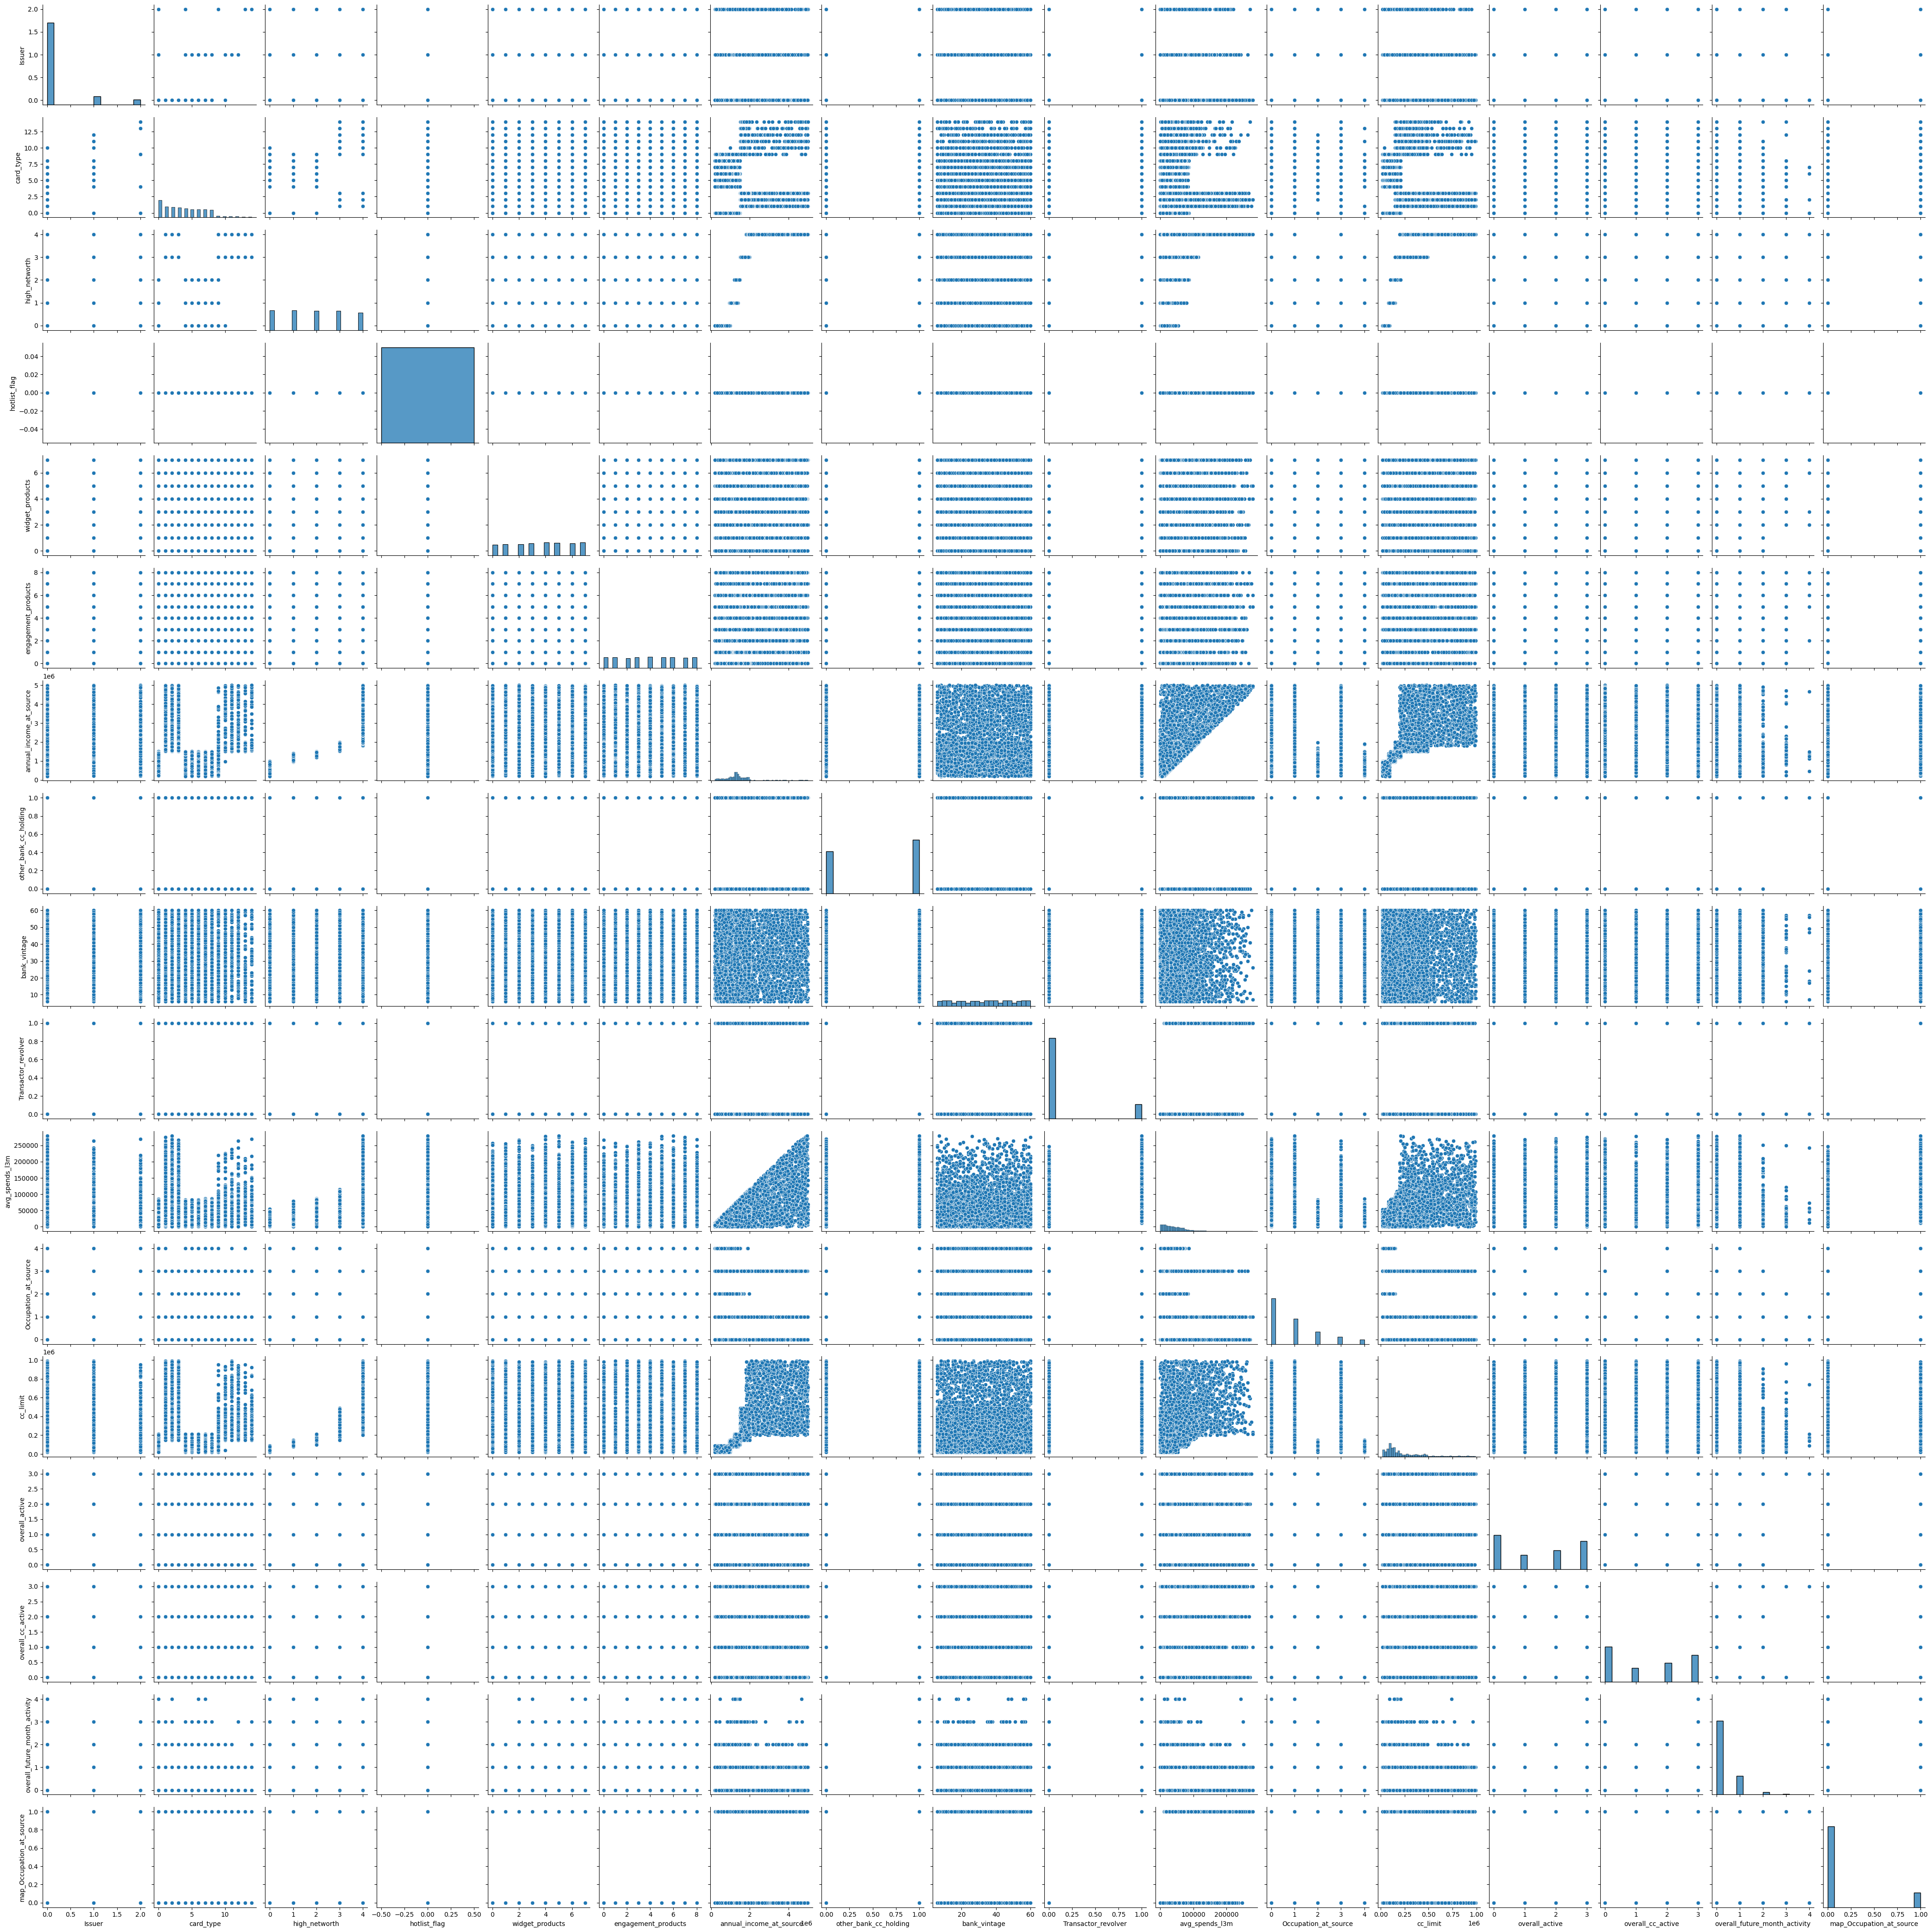

In [56]:
#plotting a pair plot to check for relationships
#did not find anything significant.

cols = list(df_cc_data_not_null.columns)
ignore_cols = ['userid','card_no','card_bin_no','active_30','active_60','active_90','cc_active30','cc_active60','cc_active90'
                  ,'T+1_month_activity','T+2_month_activity','T+3_month_activity','T+6_month_activity','T+12_month_activity','card_source_date']
cols = [col for col in cols if col not in ignore_cols]
sns.pairplot(df_cc_data_not_null.loc[:,cols])
plt.show()

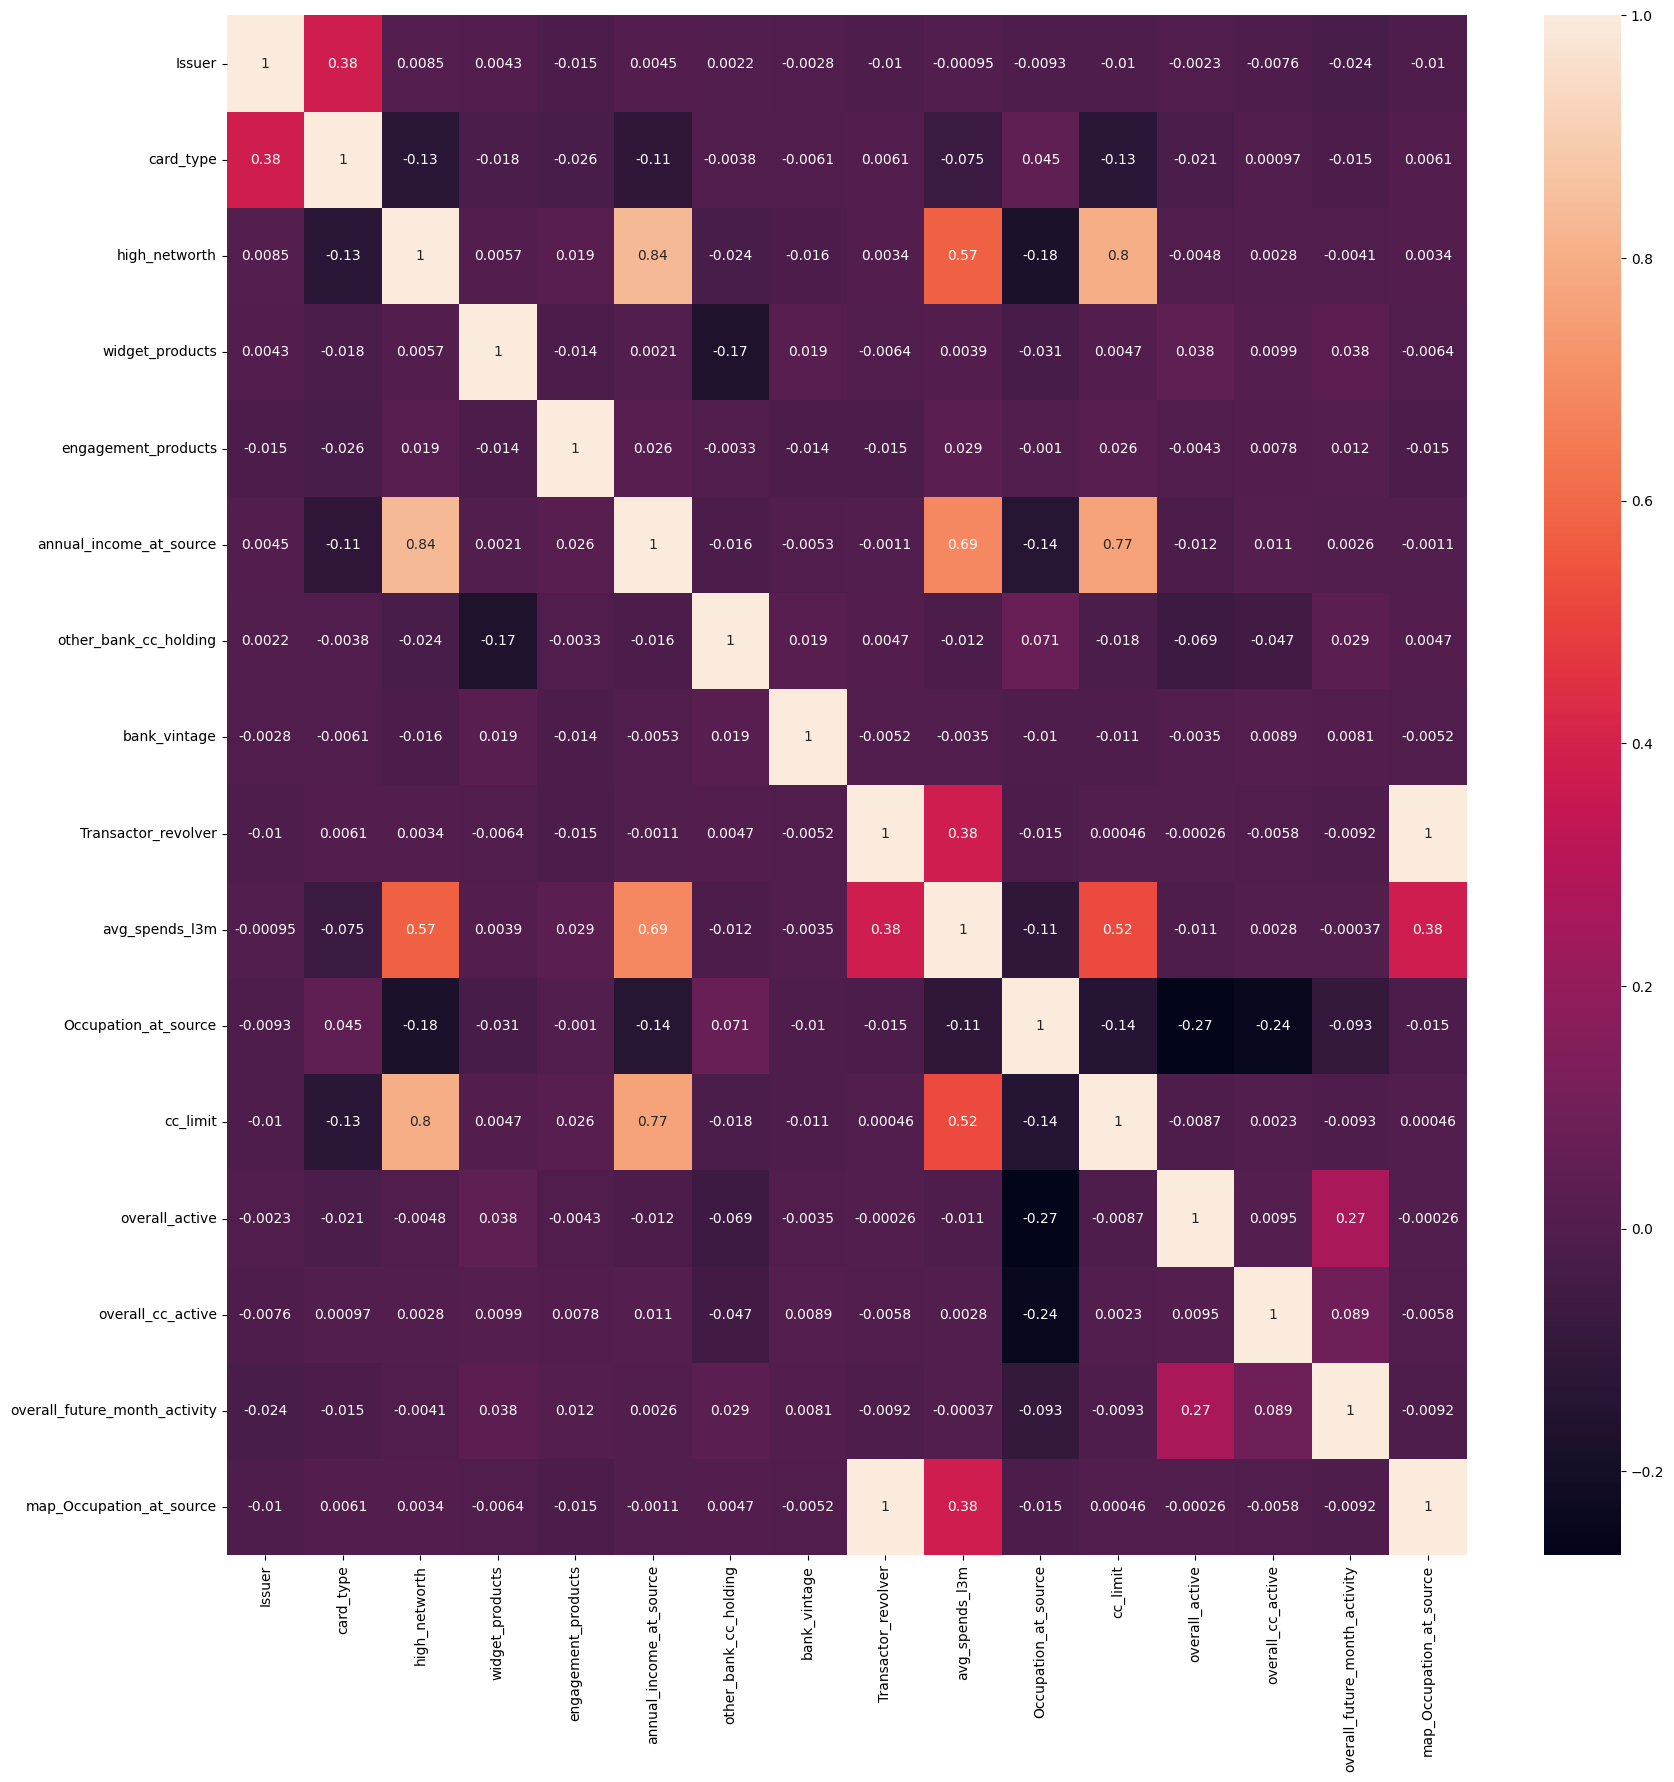

In [57]:
#plotting a heatmap to check for relationships
#seen high correlation between high_networth, avg_spend and cc_limit
cols = list(df_cc_data_not_null.columns)
ignore_cols = ['userid','card_no','card_bin_no','active_30','active_60','active_90','cc_active30','cc_active60','cc_active90'
                  ,'T+1_month_activity','T+2_month_activity','T+3_month_activity','T+6_month_activity','T+12_month_activity','card_source_date','hotlist_flag']
cols = [col for col in cols if col not in ignore_cols]
plt.figure(figsize=(20,20))
sns.heatmap(df_cc_data_not_null.loc[:,cols].corr(),annot=True)
plt.show()

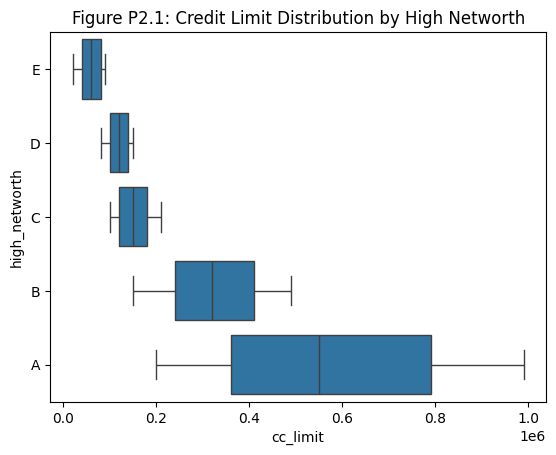

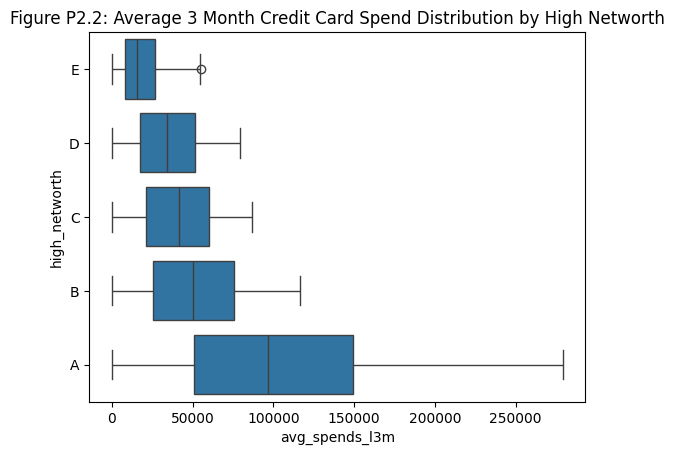

In [58]:
#Plotting high_networth as category against cc_limit and avg_spend

df_cc_data_not_null['high_networth'] =  df_cc_data_not_null['high_networth'].astype('category')
map_high_networth = {4: 'A',3: 'B',2: 'C', 1: 'D', 0: 'E'}
df_cc_data_not_null.replace({'high_networth': map_high_networth}, inplace=True)
sns.boxplot(df_cc_data_not_null, x='cc_limit',y='high_networth')
plt.title('Figure P2.1: Credit Limit Distribution by High Networth')
plt.show()
sns.boxplot(df_cc_data_not_null, x='avg_spends_l3m',y='high_networth')
plt.title('Figure P2.2: Average 3 Month Credit Card Spend Distribution by High Networth')
plt.show()

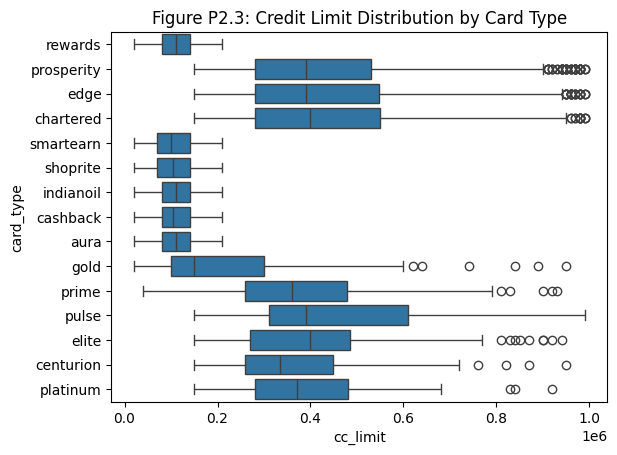

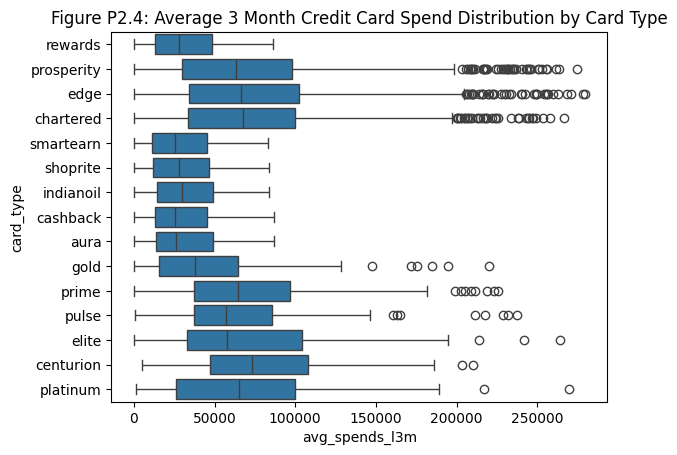

In [59]:
#Plotting Card Type as category against cc_limit and avg_spend
df_cc_data_not_null['card_type'] =  df_cc_data_not_null['card_type'].astype('category')
map_card_type = {0: 'rewards',1: 'prosperity',2: 'edge',3:'chartered',4: 'smartearn',
                  5: 'shoprite', 6: 'indianoil', 7: 'cashback', 8: 'aura',9: 'gold',10: 'prime',
                  11: 'pulse',12: 'elite',13: 'centurion',14: 'platinum'}
df_cc_data_not_null.replace({'card_type': map_card_type}, inplace=True)
sns.boxplot(df_cc_data_not_null, x='cc_limit',y='card_type')
plt.title('Figure P2.3: Credit Limit Distribution by Card Type')
plt.show()
sns.boxplot(df_cc_data_not_null, x='avg_spends_l3m',y='card_type')
plt.title('Figure P2.4: Average 3 Month Credit Card Spend Distribution by Card Type')
plt.show()

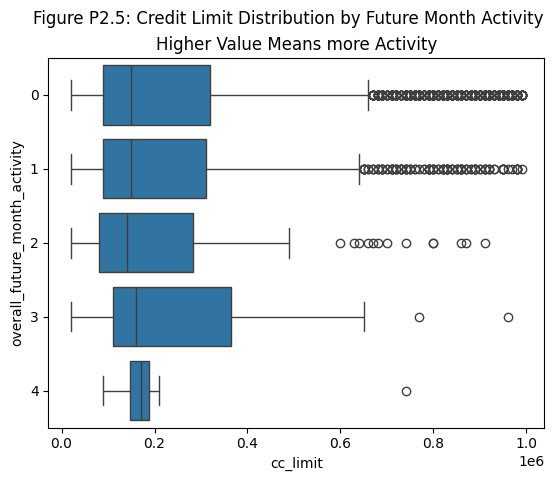

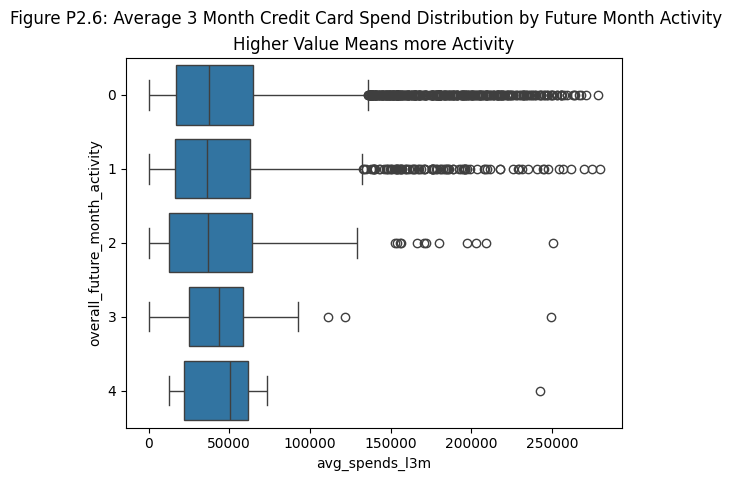

In [60]:
#Plotting Overall_furture_month_activity as category against cc_limit and avg_spend
df_cc_data_not_null['overall_future_month_activity'] =  df_cc_data_not_null['overall_future_month_activity'].astype('category')
sns.boxplot(df_cc_data_not_null, x='cc_limit',y='overall_future_month_activity')
plt.suptitle('Figure P2.5: Credit Limit Distribution by Future Month Activity')
plt.title('Higher Value Means more Activity')
plt.show()
plt.suptitle('Figure P2.6: Average 3 Month Credit Card Spend Distribution by Future Month Activity')
plt.title('Higher Value Means more Activity')
sns.boxplot(df_cc_data_not_null, x='avg_spends_l3m',y='overall_future_month_activity')
plt.show()